# SABRA Shell Model Equations



## Governing Equation


$$ r=2   
A=1  
B=A/r -A  
C=-A/r $$


$$ \frac{du_n}{dt} = \underbrace{i(k_{n+1} A u_{n+1}^* u_{n+2} + k_n B u_{n-1}^* u_{n+1} - k_{n-1} C u_{n-2} u_{n-1})}_{\text{nonlinear}} - \underbrace{\nu k_n^2 u_n}_{\text{dissipation}} + \underbrace{f_n}_{\text{forcing}} $$

For the first shell (n=1):
$$ N(u_1) = i k_2 A u_2^* u_3 $$

For the second shell (n=2):
$$ N(u_2) = i(k_3 A u_3^* u_4 + k_2 B u_1^* u_3) $$

For the penultimate shell (n=nn-1):
$$ N(u_{nn-1}) = i(k_{nn-1} B u_{nn-2}^* u_{nn} - k_{nn-2} C u_{nn-3} u_{nn-2}) $$

For the last shell (n=nn):
$$ N(u_{nn}) = -i k_{nn-1} C u_{nn-2} u_{nn-1} $$




## Forcing Mechanism

The forcing term $f_n$ is applied to maintain energy input in a specific range of shells. It involves two steps:
### 1. Energy Scaling
First, we calculate the total energy in the forcing range and determine a scaling factor:

$$ E_f = \sum_{n=1}^{nn} |u_n|^2 \cdot \Theta(n - n_{dwn}) \cdot \Theta(n_{upp} - n) = \sum_{n=dwn}^{upp} |u_n|^2 $$

$$ \alpha = \frac{\epsilon}{E_f} $$

### 2. Force Application
For each shell, the forcing term is:

$$ f_n = u_n(\alpha + i\phi_n) \cdot \Theta(n - n_{dwn}) \cdot \Theta(n_{upp} - n) $$

Outside the forcing range:
$$ f_n = 0 $$

where:
- $\Theta(x)$ is the Heaviside step function
- $\phi_n$ is a random phase (different for each shell)


## Runge-Kutta 4th Order Integration

### Step 1: First RK Stage
$$ k_1 = \Delta t \left[N(u_n) - \nu k_n^2 u_n + f_n\right] $$

### Step 2: Second RK Stage
$$ k_2 = \Delta t \left[N(u_n + \frac{k_1}{2}) - \nu k_n^2(u_n + \frac{k_1}{2}) + f_n\right] $$

### Step 3: Third RK Stage
$$ k_3 = \Delta t \left[N(u_n + \frac{k_2}{2}) - \nu k_n^2(u_n + \frac{k_2}{2}) + f_n\right] $$

### Step 4: Fourth RK Stage
$$ k_4 = \Delta t \left[N(u_n + k_3) - \nu k_n^2(u_n + k_3) + f_n\right] $$

### Final Update
$$ u_n(t + \Delta t) = u_n(t) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$

### Timestep Selection
The timestep is chosen based on:
$$ \Delta t = \beta \sqrt{\frac{\nu}{\epsilon}} $$

where:
- $\beta$ is a safety factor
jection rate

# Learning

##  Lasso Regression for linear case


$$
\min_{W \in \mathbb{R}^p} \left\{ \frac{1}{N} \left\| y - W^TX \right\|_2^2 + \lambda \|W\|_1 \right\}
$$

$$
\hat{W}_j = \operatorname{S}_{N,\lambda}\left(\hat{W}_j^{\text{OLS}}\right) = \hat{W}_j^{\text{OLS}} \cdot \max\left(0, 1 - \frac{N \lambda}{|\hat{W}_j^{\text{OLS}}|}\right)
$$

$$
\hat{W}_j^{\text{OLS}} = (X^\top X)^{-1} X^\top y = X^\top y.
$$

and $\operatorname{S}_{N,\lambda}$ is the $\emph{soft thresholding operator}$


## Nonlinear Regression

### Theoretical framework for SABRA model



We represent the system state as a vector $U(t) \in \mathbb{C}^{n_n}$ where each component is a shell velocity:
$$ U(t) = [u_1(t), u_2(t), ..., u_{nn}(t)]^T $$

The SABRA model can be written in matrix form:
$$ \frac{dU}{dt} = F(U) = N(U) - DU + f $$

where:
- $N(U)$: Nonlinear term
- $D$: Diagonal dissipation matrix with $D_{nn} = \nu k_n^2$
- $f$: Forcing vector

We can approximate the nonlinear term using a dictionary of functions $\Phi(U)$:
$$ N(U) \approx \sum_{j} W_j \Phi_j(U) $$

The optimization problem becomes:
$$ \min_{W} \left\{ \frac{1}{N_t} \left\| \frac{dU}{dt} + DU - f - W^T\Phi(U) \right\|_2^2 + \lambda \|W\|_1 \right\} $$

Remember that we are not learning A, B and C but they are still multiplied by $ k_n, k_{n+1}, k_{n-1} $ or so

## Fit Spectra

### Functions table

| Function                    | Purpose                                                                                              | Inputs                                                                                                           | Outputs                                                                                     |
|-----------------------------|------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| `load_spectra_sequence`     | Loads `u_n(t)` values from data files                                                               | `t_start` (int), `t_end` (int), `dir_path` (str)                                                                 | `U` (numpy array of shape `[n_timesteps, nn]`)                                              |
| `load_forcing_sequence`     | Loads forcing magnitudes `f_n(t)` from data files                                                  | `t_start` (int), `t_end` (int), `dir_path` (str)                                                                 | `F` (numpy array of shape `[n_timesteps, nn]`)                                              |
| `build_complete_dictionary` | Constructs $\Phi(U)$, includes all 4 conjugate interaction types—even though `U` is now real-valued | `U` (numpy array), `use_all_interactions` (bool), `include_i` (bool), `include_dissipation` (bool), `k` (array), `nu` (float) | `Phi` (numpy array of shape `[n_timesteps, n_features]`)                                    |
| `compute_derivatives`       | Computes $\frac{dU}{dt}$ with finite difference                                                    | `U` (numpy array), `dt` (float)                                                                                  | `dUdt` (numpy array of shape `[n_timesteps-1, nn]`)                                         |
| `build_regression_system`   | Constructs regression matrix $X = \Phi(U)$ and target $y = \frac{dU}{dt} + DU - f$                 | `U` (numpy array), `dt` (float), `nu` (float), `k` (array), `forcing` (numpy array), `use_all_interactions` (bool), `shell_idx` (int), `include_i` (bool), `subtract_dissipation` (bool) | `X` (numpy array of shape `[n_equations, n_features]`), `y` (numpy array of shape `[n_equations]`) |
| `fit_sabra_model`           | Solves Lasso regression for each shell $u_n$                                                       | `U` (numpy array), `dt` (float), `nu` (float), `k` (array), `forcing` (numpy array), `lambda_reg` (float), `use_all_interactions` (bool), `shell_idx` (int), `include_i` (bool), `subtract_dissipation` (bool) | `W` (numpy array of shape `[n_shells, n_features]` or `[1, n_features]`)                     |
| `fit_sabra_model_with_lassoCV` | Solves Lasso regression with cross-validation to select the best regularization parameter         | Same as `fit_sabra_model`                                                                                       | `W` (numpy array of shape `[n_shells, n_features]` or `[1, n_features]`), `best_lambda_reg` (float) |
| `analyze_interactions`      | Extracts large-magnitude coefficients $W_{n, ij}$ indicating significant nonlinear terms            | `W` (numpy array), `nn` (int), `use_all_interactions` (bool), `threshold` (float), `expected_interactions` (dict), `shell_idx` (int), `include_dissipation` (bool) | `significant` (list of dictionaries with interaction details)                               |
| `get_expected_interactions` | Identifies expected interaction terms based on the SABRA model equations                           | `nn` (int)                                                                                                      | `expected` (dict mapping shell indices to sets of expected interactions)                    |
| `run_multiple_models_by_lambda` | Runs SABRA model fitting for multiple regularization parameters $\lambda$                       | `dir_path` (str), `t_start` (int), `t_end` (int), `lambdas` (list), `nu` (float), `dt` (float), `forcing_dir` (str), `use_all_interactions` (bool), `shell_idx` (int), `include_i` (bool), `use_lassoCV` (bool), `top_n` (int), `subtract_dissipation` (bool) | `W_list` (list of numpy arrays with learned coefficients)                                    |
| `run_multiple_models_by_samples` | Runs SABRA model fitting for varying numbers of samples                                        | `dir_path` (str), `t_start_list` (list), `t_end` (int), `nu` (float), `dt` (float), `forcing_dir` (str), `use_all_interactions` (bool), `shell_idx` (int), `include_i` (bool), `use_lassoCV` (bool), `top_n` (int), `subtract_dissipation` (bool) | `W_list` (list of numpy arrays with learned coefficients)                                    |
| `plot_interaction_heatmap`  | Visualizes significant interactions across different models as a heatmap                           | `W_list` (list of numpy arrays), `label_list` (list), `nn` (int), `use_all_interactions` (bool), `expected_interactions` (dict), `shell_idx` (int), `xlabel` (str), `top_n` (int), `top_n_start` (int), `top_n_end` (int), `include_dissipation` (bool) | None (displays a heatmap plot)                                                              |


### Matrices


The nonlinear dictionary $\Phi(U)$ and the coefficient matrix $W$ can be represented as follows:

$$
\Phi(U) =
\begin{bmatrix}
u_1 u_1 & u_1 \overline{u}_1 & \overline{u}_1 u_1 & \overline{u}_1 \overline{u}_1 & u_1 u_2 & u_1 \overline{u}_2 & \cdots & u_{nn} u_{nn} & u_{nn} \overline{u}_{nn} & \cdots & -\nu k_1^2 u_1 & \cdots & -\nu k_{nn}^2 u_{nn} \\
u_2 u_1 & u_2 \overline{u}_1 & \overline{u}_2 u_1 & \overline{u}_2 \overline{u}_1 & u_2 u_2 & u_2 \overline{u}_2 & \cdots & u_{nn} u_{nn} & u_{nn} \overline{u}_{nn} & \cdots & -\nu k_1^2 u_2 & \cdots & -\nu k_{nn}^2 u_{nn} \\
\vdots  & \vdots            & \vdots              & \vdots                        & \vdots & \vdots            & \ddots & \vdots         & \vdots                  &        & \vdots         &        & \vdots         \\
\end{bmatrix}
$$
Each row corresponds to a time sample, and each column to a specific interaction $(i, j, \text{type})$.

$$
W =
\begin{bmatrix}
W_{1,(1,1)}^{\text{reg}} & W_{1,(1,1)}^{j^*} & W_{1,(1,1)}^{i^*} & W_{1,(1,1)}^{(ij)^*} & \cdots & W_{1,(nn,nn)}^{\text{reg}} & W_{1,(nn,nn)}^{j^*} & W_{1,(nn,nn)}^{i^*} & W_{1,(nn,nn)}^{(ij)^*} & W_{1,D_1} & \cdots & W_{1,D_{nn}} \\
W_{2,(1,1)}^{\text{reg}} & W_{2,(1,1)}^{j^*} & W_{2,(1,1)}^{i^*} & W_{2,(1,1)}^{(ij)^*} & \cdots & W_{2,(nn,nn)}^{\text{reg}} & W_{2,(nn,nn)}^{j^*} & W_{2,(nn,nn)}^{i^*} & W_{2,(nn,nn)}^{(ij)^*} & W_{2,D_1} & \cdots & W_{2,D_{nn}} \\
\vdots                   & \vdots            & \vdots            & \vdots               & \ddots & \vdots                     & \vdots              & \vdots              & \vdots                  & \vdots    &        & \vdots         \\
W_{nn,(1,1)}^{\text{reg}} & W_{nn,(1,1)}^{j^*} & W_{nn,(1,1)}^{i^*} & W_{nn,(1,1)}^{(ij)^*} & \cdots & W_{nn,(nn,nn)}^{\text{reg}} & W_{nn,(nn,nn)}^{j^*} & W_{nn,(nn,nn)}^{i^*} & W_{nn,(nn,nn)}^{(ij)^*} & W_{nn,D_1} & \cdots & W_{nn,D_{nn}} \\
\end{bmatrix}
$$
- Each row: coefficients for the differential equation of the target shell $n$.
- Each column: interaction $(i, j)$ and type:
    - $\text{reg}$: $u_i u_j$
    - $j^*$: $u_i \overline{u}_j$
    - $i^*$: $\overline{u}_i u_j$
    - $(ij)^*$: $\overline{u}_i \overline{u}_j$
    - $D_i$: dissipation term $-\nu k_i^2 u_i$

### advanced functions definition

####

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLassoCV
import os
from matplotlib.lines import Line2D
from itertools import product
import gc
from xml.etree.ElementInclude import include
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV


def load_spectra_sequence(t_start, t_end, dir_path):
    """Load complex spectra using fixed-width field parsing."""
    U = []
    for t in range(t_start, t_end):
        filename = f'{dir_path}/spectr_complex.{t:010d}.txt'
        with open(filename, 'r') as f:
            data = []
            for line in f:
                try:
                    # Extract fixed-width columns
                    real = float(line[13:39])    # From char 14 to 39
                    imag = float(line[39:])      # From char 40 to end
                    data.append(real + 1j * imag)
                except ValueError as e:
                    print(f"Failed to parse line in {filename}: {line.strip()}")
                    raise e
            U.append(np.array(data))
    return np.array(U)


def load_forcing_sequence(t_start, t_end, dir_path):
    """Load complex forcing data using fixed-width parsing."""
    F = []
    for t in range(t_start, t_end):
        filename = f'{dir_path}/forcing_complex.{t:010d}.txt'
        with open(filename, 'r') as f:
            data = []
            for line in f:
                try:
                    real = float(line[13:39])    # From char 14 to 39
                    imag = float(line[39:])      # From char 40 to end
                    data.append(real + 1j * imag)
                except ValueError as e:
                    print(f"Failed to parse line in {filename}: {line.strip()}")
                    raise e
            F.append(np.array(data))
    return np.array(F)


# Keep the other functions unchanged
def compute_derivatives(U, dt):
    """Compute time derivatives using finite differences.
    
    Dimensions:
        Input:
            U: array[n_timesteps, nn]
            dt: scalar
        Output:
            dUdt: array[n_timesteps-1, nn]
    """
    return (U[1:] - U[:-1]) / dt


def build_complete_dictionary(U, use_all_interactions=False, include_i=False, include_dissipation=False, 
                            k=None, nu=None, normalize_by_k=False, target_shells=None):
    """Build dictionary of nonlinear interaction terms with optional imaginary unit multiplication and dissipation terms.

    Args:
        U: array[n_timesteps, nn] -- input complex time series
        use_all_interactions: bool -- whether to include conjugate variants
        include_i: bool -- whether to multiply all features by the imaginary unit i
        include_dissipation: bool -- whether to include dissipation terms in the dictionary
        k: array[nn] -- wavenumbers (required if include_dissipation=True or normalize_by_k=True)
        nu: float -- viscosity (required if include_dissipation=True)
        normalize_by_k: bool -- whether to normalize each equation by its corresponding k_n
        target_shells: list or None -- shells being learned (for normalization)

    Returns:
        Phi: array[n_timesteps, n_features] -- dictionary matrix
    """
    n_timesteps, nn = U.shape
    n_base = nn * nn
    n_types = 4 if use_all_interactions else 1
    n_features = n_base * n_types
    
    # Add dissipation features if requested
    if include_dissipation:
        if k is None or nu is None:
            raise ValueError("k and nu must be provided when include_dissipation=True")
        n_features += nn  # Add nn dissipation terms
    
    if normalize_by_k and k is None:
        raise ValueError("k must be provided when normalize_by_k=True")
    
    Phi = np.zeros((n_timesteps, n_features), dtype=complex)
    idx = 0
    factor = 1j if include_i else 1.0

    # Nonlinear interaction terms
    for i in range(nn):
        for j in range(nn):
            Phi[:, idx] = factor * U[:, i] * U[:, j]
            idx += 1
            if use_all_interactions:
                Phi[:, idx] = factor * U[:, i] * np.conj(U[:, j])
                idx += 1
                Phi[:, idx] = factor * np.conj(U[:, i]) * U[:, j]
                idx += 1
                Phi[:, idx] = factor * np.conj(U[:, i]) * np.conj(U[:, j])
                idx += 1
    
    # Dissipation terms
    if include_dissipation:
        for i in range(nn):
            #Phi[:, idx] = -nu * k[i]**2 * U[:, i]  # Negative because we move it to RHS
            Phi[:, idx] =  U[:, i]  # Negative because we move it to RHS
            idx += 1

    return Phi


def build_regression_system(U, dt, nu, k, forcing=None, use_all_interactions=False, 
                          shell_idx=None, include_i=True, subtract_dissipation=True,
                          normalize_by_k=False):
    """Build regression system for real and imaginary parts with optional equation normalization.
    
    Args:
        U: array[n_timesteps, nn] (complex)
        dt, nu: scalars
        k: array[nn]
        forcing: array[n_timesteps, nn] (complex) or None
        use_all_interactions: bool
        shell_idx: int or None -- if None, learn all shells; if int, learn only that shell
        include_i: bool
        subtract_dissipation: bool -- if True, subtract dissipation from target; if False, include in dictionary
        normalize_by_k: bool -- if True, normalize each equation by its corresponding k_n
        
    Returns:
        X: array[n_equations, n_features]  # Stacked real/imag for selected shells
        y: array[n_equations]              # Stacked real/imag for selected shells
    """
    n_timesteps, nn = U.shape
    
    # Compute derivatives
    dUdt = compute_derivatives(U, dt)  # Shape: [n_timesteps-1, nn]
    
    # Determine which shells to learn
    if shell_idx is None:
        # Learn all shells
        target_shells = list(range(nn))
        n_equations_per_shell = n_timesteps - 1
        total_equations = n_equations_per_shell * nn * 2  # *2 for real/imag
    else:
        # Learn single shell
        target_shells = [shell_idx]
        n_equations_per_shell = n_timesteps - 1
        total_equations = n_equations_per_shell * 2  # *2 for real/imag
    
    # Build dictionary (always use all U data for interactions)
    include_dissipation = not subtract_dissipation
    Phi = build_complete_dictionary(U[:-1], use_all_interactions=use_all_interactions, 
                                  include_i=include_i, include_dissipation=include_dissipation,
                                  k=k, nu=nu, normalize_by_k=normalize_by_k, 
                                  target_shells=target_shells)
    
    # Prepare target variables and apply normalization
    y_list = []
    Phi_list = []
    
    for shell in target_shells:
        y_shell = dUdt[:, shell]
        
        # Optionally subtract dissipation
        if subtract_dissipation:
            y_shell = y_shell + nu * k[shell]**2 * U[:-1, shell]
        
        # Subtract forcing if provided
        if forcing is not None:
            y_shell = y_shell - forcing[:-1, shell]
        
        # Apply normalization by k_n if requested
        if normalize_by_k:
            y_shell = y_shell / (k[shell])
            # Also normalize the corresponding dictionary entries
            Phi_normalized = Phi / (k[shell])
            Phi_list.append(Phi_normalized)
        else:
            Phi_list.append(Phi)
        
        y_list.append(y_shell)
    
    # Stack real and imaginary parts
    if shell_idx is None:
        # Multi-shell case: create block structure
        X = np.zeros((total_equations, Phi.shape[1]), dtype=float)
        y = np.zeros(total_equations, dtype=float)
        
        for i, shell in enumerate(target_shells):
            # Get the appropriate Phi for this shell
            Phi_shell = Phi_list[i]
            
            # Real part
            start_idx = i * n_equations_per_shell * 2
            end_idx = start_idx + n_equations_per_shell
            X[start_idx:end_idx, :] = Phi_shell.real
            y[start_idx:end_idx] = y_list[i].real
            
            # Imaginary part
            start_idx = end_idx
            end_idx = start_idx + n_equations_per_shell
            X[start_idx:end_idx, :] = Phi_shell.imag
            y[start_idx:end_idx] = y_list[i].imag
    else:
        # Single shell case
        Phi_shell = Phi_list[0]
        X = np.vstack([Phi_shell.real, Phi_shell.imag])
        y = np.concatenate([y_list[0].real, y_list[0].imag])
    
    return X, y


def fit_sabra_model_with_lassoCV(U, dt, nu, k, forcing=None, use_all_interactions=False, 
                               shell_idx=None, include_i=True, subtract_dissipation=True,
                               normalize_by_k=False):
    """Fit SABRA model using LassoCV to automatically select lambda_reg.
    
    Args:
        shell_idx: int or None -- if None, learn all shells; if int, learn only that shell
        subtract_dissipation: bool -- if True, subtract dissipation from target; if False, include in dictionary
        normalize_by_k: bool -- if True, normalize each equation by its corresponding k_n
    """
    # Build the regression system
    X, y = build_regression_system(U, dt, nu, k, forcing=forcing, 
                                 use_all_interactions=use_all_interactions, 
                                 shell_idx=shell_idx, include_i=include_i,
                                 subtract_dissipation=subtract_dissipation,
                                 normalize_by_k=normalize_by_k)
    
    # Choose appropriate model based on whether we're learning multiple shells
    if shell_idx is None:
        # Multi-shell learning - use MultiTaskLassoCV
        # Reshape y to be (n_samples, n_tasks) where n_tasks = n_shells
        n_timesteps = U.shape[0]
        nn = U.shape[1]
        n_samples = (n_timesteps - 1) * 2  # *2 for real/imag
        
        # Reshape for multi-task learning
        y_reshaped = y.reshape((n_samples, nn), order='F')  # Fortran order to interleave real/imag correctly
        
        # Use MultiTaskLassoCV
        from sklearn.linear_model import MultiTaskLassoCV
        lasso_cv = MultiTaskLassoCV(cv=5, max_iter=100000)
        lasso_cv.fit(X[:n_samples, :], y_reshaped)  # Only use first n_samples rows
        
        best_lambda_reg = lasso_cv.alpha_
        coef = lasso_cv.coef_  # Shape: (n_tasks, n_features)
        
    else:
        # Single shell learning - use LassoCV
        from sklearn.linear_model import LassoCV
        lasso_cv = LassoCV(cv=5, max_iter=100000)
        lasso_cv.fit(X, y)
        
        best_lambda_reg = lasso_cv.alpha_
        coef = lasso_cv.coef_.reshape(1, -1)  # Shape: (1, n_features)
    
    print(f"Best lambda_reg (alpha) found: {best_lambda_reg}")
    
    return coef, best_lambda_reg


def fit_sabra_model(U, dt, nu, k, forcing=None, lambda_reg=1e-5, use_all_interactions=False, 
                   shell_idx=None, include_i=True, subtract_dissipation=True,
                   normalize_by_k=False):
    """Fit SABRA model using Lasso regression on combined real/imaginary system.
    
    Args:
        shell_idx: int or None -- if None, learn all shells; if int, learn only that shell
        subtract_dissipation: bool -- if True, subtract dissipation from target; if False, include in dictionary
        normalize_by_k: bool -- if True, normalize each equation by its corresponding k_n
        
    Returns:
        W: array[n_shells, n_features] or array[1, n_features]
    """
    X, y = build_regression_system(U, dt, nu, k, forcing=forcing, 
                                 use_all_interactions=use_all_interactions,
                                 shell_idx=shell_idx, include_i=include_i,
                                 subtract_dissipation=subtract_dissipation,
                                 normalize_by_k=normalize_by_k)
    
    if shell_idx is None:
        # Multi-shell learning
        n_timesteps = U.shape[0]
        nn = U.shape[1]
        n_samples = (n_timesteps - 1) * 2
        
        # Reshape for multi-task learning
        y_reshaped = y.reshape((n_samples, nn), order='F')
        
        from sklearn.linear_model import Lasso
        from sklearn.multioutput import MultiOutputRegressor
        lasso = MultiOutputRegressor(Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=100000))
        lasso.fit(X[:n_samples, :], y_reshaped)
        
        # Extract coefficients from each estimator
        coef = np.array([est.coef_ for est in lasso.estimators_])
        
    else:
        # Single shell learning
        reg = LinearRegression(fit_intercept=False)
        reg.fit(X, y)
        #r2_score = reg.score(X, y)
        #lasso = Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=100000)
        #lasso.fit(X, y)
        #coef = lasso.coef_.reshape(1, -1)
        coef=reg.coef_.reshape(1,-1)
    
    return coef



def get_expected_interactions(nn):
    """
    Build a dict of expected (i, j, type) tuples for each shell index n (0-based).
    Only the three model terms:
      1) i k_{n+1} A u_{n+1}^* u_{n+2}    → type 'i_conj'
      2) i k_n     B u_{n-1}^* u_{n+1}    → type 'i_conj'
      3) -i k_{n-1} C u_{n-2}   u_{n-1}   → type 'regular'
    Also includes symmetry: (i, j, 'i_conj') is equivalent to (j, i, 'j_conj').
    Also (i, j, 'regular') is equivalent to (j, i, 'regular').
    """
    expected = {}
    for n in range(nn):
        terms = set()
        # term 1 (forward-forward)
        if n <= nn-3:
            # (n+1, n+2, 'i_conj') and its symmetric (n+2, n+1, 'j_conj')
            terms.add((n+1, n+2, 'i_conj'))
            terms.add((n+2, n+1, 'j_conj'))
        # term 2 (backward-forward)
        if 1 <= n <= nn-2:
            # (n-1, n+1, 'i_conj') and its symmetric (n+1, n-1, 'j_conj')
            terms.add((n-1, n+1, 'i_conj'))
            terms.add((n+1, n-1, 'j_conj'))
        # term 3 (backward-backward)
        if n >= 2:
            # (n-2, n-1, 'regular') and its symmetric (n-1, n-2, 'regular')
            terms.add((n-2, n-1, 'regular'))
            terms.add((n-1, n-2, 'regular'))
        expected[n] = terms
    return expected

def analyze_interactions(W, nn, use_all_interactions=False, threshold=1e-5, expected_interactions=None, 
                        shell_idx=None, include_dissipation=False):
    """Analyze significant interactions in the learned model.
    
    Args:
        W: array[n_shells, n_features] or array[1, n_features] - Learned coefficients
        nn: int - Number of shells
        use_all_interactions: bool
        threshold: float
        expected_interactions: dict
        shell_idx: int or None - The shell being analyzed (0-based) or None for all shells
        include_dissipation: bool - Whether dissipation terms are included in the dictionary
    """
    significant = []
    types = ['regular', 'j_conj', 'i_conj', 'both_conj'] if use_all_interactions else ['regular']
    
    # Convert to 2D array if needed
    Wmat = W if W.ndim == 2 else W.reshape(1, -1)
    n_shells_learned = Wmat.shape[0]
    
    # Determine which shells to analyze
    if shell_idx is not None:
        target_shells = [shell_idx]
        shell_indices = [0]  # Index in Wmat
    else:
        target_shells = list(range(min(n_shells_learned, nn)))
        shell_indices = list(range(n_shells_learned))
    
    for shell_w_idx, target_shell in zip(shell_indices, target_shells):
        # Analyze interaction terms
        for i in range(nn):
            for j in range(nn):
                for t, type_name in enumerate(types):
                    idx = (i * nn + j) * (4 if use_all_interactions else 1) + t
                    if idx >= Wmat.shape[1]:
                        continue
                        
                    weight = Wmat[shell_w_idx, idx]
                    if abs(weight) <= threshold:
                        continue
                    
                    # Check if interaction is expected
                    key = (i, j, type_name)
                    expected_set = expected_interactions.get(target_shell, set()) if expected_interactions else set()
                    status = 'expected' if key in expected_set else 'unexpected'
                    
                    significant.append({
                        'target': target_shell + 1,  # Convert to 1-based indexing
                        'i': i + 1,
                        'j': j + 1,
                        'type': type_name,
                        'weight': weight,
                        'highlight': status == 'expected',
                        'status': status,
                        'term_type': 'interaction'
                    })
        
        # Analyze dissipation terms if included
        if include_dissipation:
            dissipation_start_idx = nn * nn * (4 if use_all_interactions else 1)
            for i in range(nn):
                idx = dissipation_start_idx + i
                if idx >= Wmat.shape[1]:
                    continue
                    
                weight = Wmat[shell_w_idx, idx]
                if abs(weight) <= threshold:
                    continue
                
                significant.append({
                    'target': target_shell + 1,
                    'i': i + 1,
                    'j': i + 1,  # Self-interaction
                    'type': 'dissipation',
                    'weight': weight,
                    'highlight': (i == target_shell),  # Highlight if dissipation comes from the target shell
                    'status': 'expected' if (i == target_shell) else 'unexpected',
                    'term_type': 'dissipation'
                })
    
    return significant

def analyze_sabra_data(dir_path, t_start, t_end, nu, dt, forcing_dir=None, use_all_interactions=False,
                      plot_results=True, lambda_reg=1e2, expected_coeffs=None,
                      shell_idx=None, include_i=True, use_lassoCV=True, top_n=20, 
                      subtract_dissipation=True, normalize_by_k=False):   
    """
    Analyze SABRA model data, learn the interaction coefficients, and highlight expected coefficients.
    
    Args:
        shell_idx: int or None -- if None, learn all shells; if int, learn only that shell
        subtract_dissipation: bool -- if True, subtract dissipation from target; if False, include in dictionary
        normalize_by_k: bool -- if True, normalize each equation by its corresponding k_n
        ... (other args same as before)
    """
    # 1. Load spectra data
    print("Loading spectra sequence...")
    U = load_spectra_sequence(t_start, t_end, dir_path)
    n_timesteps, nn = U.shape
    print(f"Loaded spectra with {n_timesteps} timesteps and {nn} shells")
    
    # 2. Optionally load forcing data
    forcing = None
    if forcing_dir:
        print("Loading forcing sequence...")
        forcing = load_forcing_sequence(t_start, t_end, forcing_dir)
        print(f"Loaded forcing with shape {forcing.shape}")
    
    # 3. Define wavenumbers (assuming geometric progression)
    k = 2.0 ** np.arange(nn)
    
    # 4. Fit the model
    if shell_idx is None:
        print(f"Fitting SABRA model for all {nn} shells...")
    else:
        print(f"Fitting SABRA model for shell {shell_idx+1}...")
    
    if normalize_by_k:
        print("Using equation normalization by k_n...")
        
    if use_lassoCV:
        W, best_lambda_reg = fit_sabra_model_with_lassoCV(U, dt, nu, k, forcing=forcing, 
                                                        use_all_interactions=use_all_interactions,
                                                        shell_idx=shell_idx, include_i=include_i,
                                                        subtract_dissipation=subtract_dissipation,
                                                        normalize_by_k=normalize_by_k)
        print(f"Best lambda_reg (alpha) selected by LassoCV: {best_lambda_reg}")
    else:
        W = fit_sabra_model(U, dt, nu, k, forcing=forcing, 
                          lambda_reg=lambda_reg, 
                          use_all_interactions=use_all_interactions,
                          shell_idx=shell_idx, include_i=include_i,
                          subtract_dissipation=subtract_dissipation,
                          normalize_by_k=normalize_by_k)
        best_lambda_reg = lambda_reg  # Use input lambda_reg if not using LassoCV
        print("fitted model with OLS")
    
    # 5. Analyze significant interactions
    print("Analyzing interactions...")
    expected = get_expected_interactions(nn)
    include_dissipation = not subtract_dissipation
    significant = analyze_interactions(W, nn, threshold=1e-5, 
                                     use_all_interactions=use_all_interactions,
                                     expected_interactions=expected,
                                     shell_idx=shell_idx,
                                     include_dissipation=include_dissipation)
    
    if plot_results:
        # Sort interactions by magnitude before plotting
        sorted_interactions = sorted(significant, key=lambda x: abs(x['weight']), reverse=True)
        top_n = min(top_n, len(sorted_interactions))
        top_interactions = sorted_interactions[:top_n]

        labels = []
        for s in top_interactions:
            if s['term_type'] == 'dissipation':
                labels.append(f"D{s['i']}")
            else:
                labels.append(f"{s['i']}-{s['j']}:{s['type']}")
                
        magnitudes = [abs(s['weight']) for s in top_interactions]
        colors = ['red' if s['term_type'] == 'dissipation' else 'green' if s['highlight'] else  'gray' 
                 for s in top_interactions]

        import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 5))
        plt.bar(range(top_n), magnitudes, color=colors)
        plt.xticks(range(top_n), labels, rotation=45, ha='right')
        plt.ylabel('Magnitude of coefficient')
        
        if shell_idx is None:
            title = f'Top {top_n} Significant Interactions for All Shells'
        else:
            title = f'Top {top_n} Significant Interactions for Shell {shell_idx + 1}'
        
        if normalize_by_k:
            title += ' (Normalized by k_n)'
        
        plt.title(title)
            
        # Add legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor='green', label='Expected'),
                          Patch(facecolor='gray', label='Unexpected'),
                          Patch(facecolor='red', label='Dissipation')]
        plt.legend(handles=legend_elements)
        
        plt.tight_layout()
        plt.show()

    if best_lambda_reg:
        return W, significant, best_lambda_reg
    else:
        return W, significant



def run_multiple_models_by_lambda(dir_path, t_start, t_end, lambdas,
                                nu, dt, forcing_dir=None, use_all_interactions=False,
                                plot_results=True, lambda_reg=1e2, expected_coeffs=None,
                                shell_idx=None, include_i=True, use_lassoCV=False,
                                top_n=20, subtract_dissipation=True, normalize_by_k=False):
    """
    Run multiple models with different lambda values.
    
    Args:
        normalize_by_k: bool -- if True, normalize each equation by its corresponding k_n
        ... (other args same as before)
    
    Returns:
        W_list: list of coefficient arrays
        lambda_list: list of lambda values used (either input lambdas or LassoCV-selected values)
    """
    W_list = []
    lambda_list = []
    
    for lam in lambdas:
        if use_lassoCV:
            W, selected_lambda = analyze_sabra_data(dir_path, t_start, t_end,
                                   nu, dt, forcing_dir=forcing_dir, use_all_interactions=use_all_interactions,
                                   plot_results=plot_results, lambda_reg=lam, expected_coeffs=expected_coeffs,
                                   shell_idx=shell_idx, include_i=include_i, use_lassoCV=use_lassoCV,
                                   top_n=top_n, subtract_dissipation=subtract_dissipation,
                                   normalize_by_k=normalize_by_k)
            lambda_list.append(selected_lambda)
        else:
            W, _ = analyze_sabra_data(dir_path, t_start, t_end,
                                   nu, dt, forcing_dir=forcing_dir, use_all_interactions=use_all_interactions,
                                   plot_results=plot_results, lambda_reg=lam, expected_coeffs=expected_coeffs,
                                   shell_idx=shell_idx, include_i=include_i, use_lassoCV=use_lassoCV,
                                   top_n=top_n, subtract_dissipation=subtract_dissipation,
                                   normalize_by_k=normalize_by_k)
            lambda_list.append(lam)
                               
        W_list.append(W)
    
    # Plot lambda values if LassoCV was used
    if use_lassoCV:
        plot_lambda_evolution(lambda_list, lambdas, "Input Lambda", 
                            shell_idx=shell_idx, normalize_by_k=normalize_by_k,
                            subtract_dissipation=subtract_dissipation)
    
    return W_list, lambda_list


def run_multiple_models_by_samples(
    dir_path, t_start_list, t_end,
    nu, dt, forcing_dir=None, use_all_interactions=False,
    plot_results=True, lambda_reg=1e2, expected_coeffs=None,
    shell_idx=None, include_i=True, use_lassoCV=False,
    top_n=20, subtract_dissipation=True, normalize_by_k=False):
    """
    Efficiently run models for increasing t_start, reusing already loaded data.
    Assumes t_start_list is sorted in decreasing order (largest to smallest).
    
    Args:
        normalize_by_k: bool -- if True, normalize each equation by its corresponding k_n
        ... (other args same as before)
    
    Returns:
        W_list: list of coefficient arrays
        lambda_list: list of lambda values used (either input lambda_reg or LassoCV-selected values)
    """
    W_list = []
    lambda_list = []
    U_full = None
    forcing_full = None
    last_t_start = None

    for idx, t_start in enumerate(t_start_list):
        # On first iteration, load the full range
        if idx == 0:
            U_full = load_spectra_sequence(t_start, t_end, dir_path)
            if forcing_dir:
                forcing_full = load_forcing_sequence(t_start, t_end, forcing_dir)
            current_offset = 0
        else:
            # Only prepend new data at the beginning
            n_new = last_t_start - t_start
            if n_new > 0:
                U_new = load_spectra_sequence(t_start, last_t_start, dir_path)
                U_full = np.concatenate([U_new, U_full], axis=0)
                if forcing_dir:
                    F_new = load_forcing_sequence(t_start, last_t_start, forcing_dir)
                    forcing_full = np.concatenate([F_new, forcing_full], axis=0)
            current_offset = 0  # always start from 0 in U_full

        # Analyze using the current U_full (from t_start to t_end)
        if use_lassoCV:
            W, _, selected_lambda = analyze_sabra_data(
                dir_path, t_start, t_end,
                nu, dt, forcing_dir=None, use_all_interactions=use_all_interactions,
                plot_results=plot_results, lambda_reg=lambda_reg, expected_coeffs=expected_coeffs,
                shell_idx=shell_idx, include_i=include_i, use_lassoCV=use_lassoCV,
                top_n=top_n, subtract_dissipation=subtract_dissipation,
                normalize_by_k=normalize_by_k
            )
            lambda_list.append(selected_lambda)
        else:
            W, _, _= analyze_sabra_data(
                dir_path, t_start, t_end,
                nu, dt, forcing_dir=None, use_all_interactions=use_all_interactions,
                plot_results=plot_results, lambda_reg=lambda_reg, expected_coeffs=expected_coeffs,
                shell_idx=shell_idx, include_i=include_i, use_lassoCV=use_lassoCV,
                top_n=top_n, subtract_dissipation=subtract_dissipation,
                normalize_by_k=normalize_by_k
            )
            lambda_list.append(lambda_reg)
            best_lambda_reg = lambda_reg  # Use input lambda_reg if not using LassoCV
            
        W_list.append(W)
        last_t_start = t_start

    # Plot lambda values if LassoCV was used
    #if use_lassoCV:
        #plot_lambda_evolution(lambda_list, t_start_list, "Training Data Size", 
                           # shell_idx=shell_idx, normalize_by_k=normalize_by_k,
                            #subtract_dissipation=subtract_dissipation)

    return W_list, lambda_list, best_lambda_reg


def plot_interaction_heatmap( 
    W_list, label_list, nn, use_all_interactions, expected_interactions, shell_idx,
    xlabel="Lambda", top_n=20, top_n_start=None, top_n_end=None,
    cmap='viridis', use_lassoCV=False, lambda_reg=5e2,
    subtract_dissipation=True, normalize_by_k=False,
    threshold=1e-5
    ):
    """
    Plot heatmap of top interactions, using top_n_start from first W and top_n_end from last W.
    Also plot number of significant interactions for each step.
    Highlight y-labels in green if they are expected interactions.
    Visually separate top_n_start and top_n_end in the heatmap.
    
    Args:
        normalize_by_k: bool -- whether the models were trained with k-normalization
        ... (other args same as before)
    """
    # Analyze all interactions for each W
    sig_list = [
        analyze_interactions(W, nn, use_all_interactions=use_all_interactions,
                           expected_interactions=expected_interactions, shell_idx=shell_idx,
                           include_dissipation=not subtract_dissipation, threshold=threshold)
        for W in W_list
    ]

    # Get top_n_start from first, top_n_end from last
    if top_n_start is None:
        top_n_start = top_n
    if top_n_end is None:
        top_n_end = top_n

    def get_top_keys(sig, n):
        sorted_sig = sorted(sig, key=lambda s: abs(s['weight']), reverse=True)
        keys = []
        for s in sorted_sig[:n]:
            if s['term_type'] == 'dissipation':
                # Use consistent key format: ('D', shell_index, 'dissipation')
                keys.append(('D', s['i']-1, 'dissipation'))  # Convert back to 0-based
            else:
                keys.append((s['i']-1, s['j']-1, s['type']))  # Convert back to 0-based
        return keys

    keys_start = get_top_keys(sig_list[0], top_n_start)
    keys_end = get_top_keys(sig_list[-1], top_n_end)
    
    # Combine keys while preserving order and avoiding duplicates
    sorted_keys = []
    seen = set()
    for k in keys_start + keys_end:
        if k not in seen:
            sorted_keys.append(k)
            seen.add(k)
        if len(sorted_keys) >= top_n:
            sorted_keys = sorted_keys[:top_n]
            break
    
    print(f"Debug: Found {len(sorted_keys)} unique interactions")
    print(f"First few keys: {sorted_keys[:5]}")
    
    # Create interaction names for plotting
    interaction_names = []
    for key in sorted_keys:
        if key[0] == 'D' and key[2] == 'dissipation':
            interaction_names.append(f"D{key[1]+1}")  # Convert back to 1-based for display
        else:
            interaction_names.append(f"{key[0]+1}-{key[1]+1}:{key[2]}")  # Convert back to 1-based
    
    interaction_index = {k: idx for idx, k in enumerate(sorted_keys)}

    # Build heatmap
    heat = np.zeros((len(sorted_keys), len(W_list)))
    for col, sig in enumerate(sig_list):
        for s in sig:
            if s['term_type'] == 'dissipation':
                key = ('D', s['i']-1, 'dissipation')  # Consistent key format
            else:
                key = (s['i']-1, s['j']-1, s['type'])
                
            if key in interaction_index:
                row = interaction_index[key]
                heat[row, col] = abs(s['weight'])

    # Debug: Check if dissipation terms are being found
    dissipation_rows = [i for i, key in enumerate(sorted_keys) if key[0] == 'D']
    print(f"Debug: Dissipation rows in heatmap: {dissipation_rows}")
    if dissipation_rows:
        print(f"Debug: Dissipation values in first column: {heat[dissipation_rows, 0]}")

    # Row-wise normalization for better visualization
    row_max = np.max(heat, axis=1, keepdims=True)
    # Avoid division by zero
    row_max[row_max == 0] = 1
    heat_norm = heat / row_max

    # Determine which y-labels are expected
    expected_set = expected_interactions.get(shell_idx, set()) if expected_interactions and shell_idx is not None else set()
    is_expected = []
    for key in sorted_keys:
        if key[0] == 'D' and key[2] == 'dissipation':
            # For dissipation terms, check if it's the target shell's own dissipation
            is_expected.append(key[1] == shell_idx if shell_idx is not None else False)
        else:
            i, j, t = key
            # Check both (i, j, t) and (j, i, t) for symmetry
            expected_here = ((i, j, t) in expected_set) or ((j, i, t) in expected_set)
            is_expected.append(expected_here)

    # Plot normalized heatmap
    
    plt.figure(figsize=(12, max(6, len(interaction_names)*0.25)))
    im = plt.imshow(heat_norm, aspect='auto', cmap=cmap, origin='lower', vmin=0, vmax=1)
    plt.colorbar(im, label='|Coefficient| (row-normalized)')
    plt.xlabel(xlabel)
    plt.ylabel("Interaction (i-j:type or D#)")
    
    title_suffix = " (k-normalized)" if normalize_by_k else ""
    if shell_idx is not None:
        plt.title(f"Top Interactions Heatmap — Shell {shell_idx+1}{title_suffix}")
    else:
        plt.title(f"Top Interactions Heatmap — All Shells{title_suffix}")

    # Custom y-tick labels with color
    ax = plt.gca()
    yticks = np.arange(len(interaction_names))
    ax.set_yticks(yticks)
    ax.set_yticklabels(interaction_names)
    
    # Color the y-tick labels
    for idx, (label, expected) in enumerate(zip(interaction_names, is_expected)):
        color = 'green' if expected else 'red' if label.startswith('D') else 'black'
        ax.get_yticklabels()[idx].set_color(color)

    # Mark separation between top_n_start and top_n_end
    sep = len([k for k in keys_start if k in sorted_keys])
    if sep < len(sorted_keys) and sep > 0:
        ax.axhline(sep-0.5, color='cyan', linestyle='--', linewidth=2, label='Top_n_start/top_n_end boundary')
        ax.legend(loc='upper right')

    plt.xticks(range(len(label_list)), label_list, rotation=45)
    plt.tight_layout()
    
    # Create save directory if it doesn't exist
    import os
    save_path = "/home/vale/SABRA/params_bin/Nonlinear_reg_figures"
    os.makedirs(save_path, exist_ok=True)
    filename = f"interaction_heatmap_top_n_start{top_n_start}_top_n_end{top_n_end}_cmap{cmap}_nn{nn}_shell{shell_idx}_xaxis{len(label_list)}_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.png"
    plt.savefig(os.path.join(save_path, filename))
    plt.close()

    # Plot number of significant interactions for each step
    sig_counts = [sum(abs(s['weight']) > 1e-5 for s in sig) for sig in sig_list]
    plt.figure(figsize=(8, 4))
    plt.plot(label_list, sig_counts, marker='o')
    plt.axhline(y=3, color='red', linestyle='--', linewidth=1.5, label='y=3')
    plt.xlabel(xlabel)
    plt.ylabel("Number of significant interactions")
    title_suffix = " (k-normalized)" if normalize_by_k else ""
    plt.title(f"Number of significant interactions per step{title_suffix}")
    plt.legend()
    plt.xticks(range(len(label_list)), label_list, rotation=45)
    plt.tight_layout()
    
    
    filename = f"sig_interactions_count_nn{nn}_shell{shell_idx}_xaxis{len(label_list)}_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.png"
    plt.savefig(os.path.join(save_path, filename))
    plt.close()

    return heat, interaction_names, sorted_keys



def plot_lambda_evolution(lambda_list, x_values, xlabel, shell_idx=None, 
                          
                         normalize_by_k=False, subtract_dissipation=True):
    """
    Plot the evolution of lambda values selected by LassoCV.
    
    Args:
        lambda_list: list of lambda values selected by LassoCV
        x_values: list of x-axis values (input lambdas or t_start values)
        xlabel: string for x-axis label
        shell_idx: int or None - shell index for filename
        normalize_by_k: bool - whether k-normalization was used
        subtract_dissipation: bool - whether dissipation was subtracted
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(lambda_list)), lambda_list, marker='o', linewidth=2, markersize=8)
    plt.xlabel(f"{xlabel} Index")
    plt.ylabel("Lambda Selected by LassoCV")
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    title_suffix = " (k-normalized)" if normalize_by_k else ""
    if shell_idx is not None:
        plt.title(f"Lambda Evolution via LassoCV — Shell {shell_idx+1}{title_suffix}")
    else:
        plt.title(f"Lambda Evolution via LassoCV — All Shells{title_suffix}")
    
    # Add secondary x-axis with actual values if they're different from indices
    if len(set(x_values)) == len(x_values):  # All unique values
        ax2 = plt.gca().secondary_xaxis('top')
        ax2.set_xlabel(xlabel)
        # Set ticks to show actual x_values
        tick_positions = range(len(x_values))
        ax2.set_xticks(tick_positions)
        ax2.set_xticklabels([f"{x:.2e}" if isinstance(x, float) and x < 1e-2 else str(x) 
                            for x in x_values], rotation=45)
    
    plt.tight_layout()
    
    # Save the plot
    save_path = "Lambda_evol"
    os.makedirs(save_path, exist_ok=True)
    filename = f"lambda_evolution_shell{shell_idx}_xaxis{len(x_values)}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.png"
    plt.savefig(os.path.join(save_path, filename))
    plt.close()
    
    # Also create a table showing the values
    plt.figure(figsize=(12, max(4, len(lambda_list) * 0.3)))
    
    # Create table data
    table_data = []
    for i, (x_val, lambda_val) in enumerate(zip(x_values, lambda_list)):
        table_data.append([i, f"{x_val:.2e}" if isinstance(x_val, float) and x_val < 1e-2 else str(x_val), 
                          f"{lambda_val:.2e}"])
    
    # Create the table
    table = plt.table(cellText=table_data,
                     colLabels=['Index', xlabel, 'Selected Lambda'],
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.2, 0.4, 0.4])
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Style the table
    for i in range(len(table_data) + 1):  # +1 for header
        for j in range(3):
            if i == 0:  # Header
                table[(i, j)].set_facecolor('#40466e')
                table[(i, j)].set_text_props(weight='bold', color='white')
            else:
                table[(i, j)].set_facecolor('#f1f1f2' if i % 2 == 0 else 'white')
    
    plt.axis('off')
    title_suffix = " (k-normalized)" if normalize_by_k else ""
    if shell_idx is not None:
        plt.title(f"Lambda Values Selected by LassoCV — Shell {shell_idx+1}{title_suffix}", 
                 pad=20, fontsize=14, weight='bold')
    else:
        plt.title(f"Lambda Values Selected by LassoCV — All Shells{title_suffix}", 
                 pad=20, fontsize=14, weight='bold')
    
    plt.tight_layout()
    
    # Save the table
    filename_table = f"lambda_table_shell{shell_idx}_xaxis{len(x_values)}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.png"
    plt.savefig(os.path.join(save_path, filename_table), bbox_inches='tight', dpi=150)
    plt.close()



def load_all_data_once(t_start_min, t_end, spectra_path, forcing_path=None, t_start_list=None, 
                      batch_mode=False, n_batches=None, random_batches=False):
    """
    Load all data once and return structured dictionary. Can operate in three modes:
    1. Traditional mode (batch_mode=False): Slice data according to t_start_list
    2. Sequential batch mode (batch_mode=True, random_batches=False): Divide data into n_batches equal sized chunks
    3. Random batch mode (batch_mode=True, random_batches=True): Divide data into n_batches random chunks

    Args:
        t_start_min: minimum start time
        t_end: end time
        spectra_path: path to spectra data
        forcing_path: path to forcing data (optional)
        t_start_list: list of start times (required if batch_mode=False)
        batch_mode: bool, whether to use batch mode
        n_batches: int, number of batches (required if batch_mode=True)
        random_batches: bool, whether to create random batches instead of sequential ones

    Returns:
        dict: Dictionary mapping start indices to (U_slice, forcing_slice) tuples
    """
    print("Loading all data once...")

    # Load full spectra data
    U_full = load_spectra_sequence(t_start_min, t_end, spectra_path)
    print(f"Loaded spectra with shape {U_full.shape}")

    # Load forcing data if provided
    forcing_full = None
    if forcing_path:
        forcing_full = load_forcing_sequence(t_start_min, t_end, forcing_path)
        print(f"Loaded forcing with shape {forcing_full.shape}")

    data_slices = {}

    if batch_mode:
        if n_batches is None:
            raise ValueError("n_batches must be provided when batch_mode=True")

        total_timesteps = U_full.shape[0]
        
        if random_batches:
            # Create random indices for batches
            all_indices = np.arange(total_timesteps)
            np.random.shuffle(all_indices)
            batch_indices = np.array_split(all_indices, n_batches)
            
            # Create slices for each random batch
            for i, indices in enumerate(batch_indices):
                # Sort indices within each batch to maintain temporal coherence
                indices.sort()
                
                U_slice = U_full[indices]
                forcing_slice = forcing_full[indices] if forcing_full is not None else None
                
                # Use first index of batch as key
                start_time = indices[0] + t_start_min
                data_slices[start_time] = (U_slice, forcing_slice)
                
        else:
            # Sequential batches
            batch_size = total_timesteps // n_batches
            
            # Create sequential slices for each batch
            for i in range(n_batches):
                start_idx = i * batch_size
                # For last batch, include any remaining timesteps
                end_idx = total_timesteps if i == n_batches-1 else (i + 1) * batch_size
                
                U_slice = U_full[start_idx:end_idx]
                forcing_slice = forcing_full[start_idx:end_idx] if forcing_full is not None else None
                
                # Use start index as key
                data_slices[start_idx + t_start_min] = (U_slice, forcing_slice)

    else:
        if t_start_list is None:
            raise ValueError("t_start_list must be provided when batch_mode=False")

        # Traditional mode: Pre-slice data for each t_start
        for t_start_curr in t_start_list:
            start_idx = t_start_curr - t_start_min
            U_slice = U_full[start_idx:]
            forcing_slice = forcing_full[start_idx:] if forcing_full is not None else None
            data_slices[t_start_curr] = (U_slice, forcing_slice)

    return data_slices


def fit_models_for_shell_config(data_slices, shell_idx, subtract_dissipation, normalize_by_k, t_start_list, dt, nu, k, forcing_path, use_all_interactions, include_i, use_lassoCV, lambda_reg):
    """Fit models for a specific shell and configuration using pre-loaded data."""
    W_list = []
    lambda_list = []

    for t_start_curr in t_start_list:
        U_slice, forcing_slice = data_slices[t_start_curr]

        # Build regression system directly without reloading data
        X, y = build_regression_system(
            U_slice, dt, nu, k=k, forcing=forcing_slice,
            use_all_interactions=use_all_interactions, shell_idx=shell_idx, include_i=include_i,
            subtract_dissipation=subtract_dissipation, normalize_by_k=normalize_by_k
        )

        # Fit model
        if use_lassoCV:
            from sklearn.linear_model import LassoCV
            lasso_cv = LassoCV(cv=5, max_iter=100000)
            lasso_cv.fit(X, y)
            W = lasso_cv.coef_.reshape(1, -1)
            selected_lambda = lasso_cv.alpha_
            lambda_list.append(selected_lambda)
        else:
            from sklearn.linear_model import Lasso
            lasso = Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=100000)
            lasso.fit(X, y)
            W = lasso.coef_.reshape(1, -1)
            lambda_list.append(lambda_reg)

        W_list.append(W)

    return W_list, lambda_list


def save_results(W_list, lambda_list, shell_idx, subtract_dissipation, normalize_by_k, t_start,refined, save_path_W,save_path_lambda, label_list, use_lassoCV, lambda_reg):
    """Save results with consistent naming."""
    # Generate filenames
    base_params = f"{refined}_tstart{t_start}_shell{shell_idx + 1}_nn20_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}"

    filename_W = f"W_list_{base_params}.npy"
    filename_labels = f"label_list_{base_params}.npy"
    filename_lambda = f"lambda_list_{base_params}.npy"

    # Save arrays
    np.save(os.path.join(save_path_W, filename_W), np.array(W_list, dtype=object))
    np.save(os.path.join(save_path_W, filename_labels), label_list)
    np.save(os.path.join(save_path_lambda, filename_lambda), np.array(lambda_list, dtype=object))


# ADDITIONAL OPTIMIZATIONS FOR MEMORY MANAGEMENT
def process_in_batches(batch_size=40):
    """Process parameter combinations in batches to manage memory."""
    
    # Load data once
    data_slices = load_all_data_once(t_start_list[-1], t_end, spectra_path, forcing_path)
    
    param_combinations = list(product(subtract_dissipation_options, normalize_by_k_options, shell_idx_options))
    total_combinations = len(param_combinations)
    
    for batch_start in range(0, total_combinations, batch_size):
        batch_end = min(batch_start + batch_size, total_combinations)
        batch_combinations = param_combinations[batch_start:batch_end]
        
        print(f"Processing batch {batch_start//batch_size + 1}/{(total_combinations + batch_size - 1)//batch_size}")
        
        for i, (subtract_dissipation, normalize_by_k, shell_idx) in enumerate(batch_combinations):
            global_idx = batch_start + i
            print(f"Progress: {global_idx+1}/{total_combinations} - Shell {shell_idx+1}")
            
            try:
                W_list, lambda_list = fit_models_for_shell_config(
                    data_slices, shell_idx, subtract_dissipation, normalize_by_k
                )
                save_results(W_list, lambda_list, shell_idx, subtract_dissipation, normalize_by_k)
                del W_list, lambda_list
                
            except Exception as e:
                print(f"Error processing shell {shell_idx+1}: {e}")
                continue
        
        # Force garbage collection after each batch
        gc.collect()
    
    del data_slices
    gc.collect()



### single shell complex stacking learning, fixed samples, fixed lambda

Loading spectra sequence...
Loaded spectra with 20000 timesteps and 30 shells
Loading forcing sequence...
Loaded forcing with shape (20000, 30)
Fitting SABRA model for shell 11...
Best lambda_reg (alpha) found: 0.00038316984537402674
Best lambda_reg (alpha) selected by LassoCV: 0.00038316984537402674
Analyzing interactions...


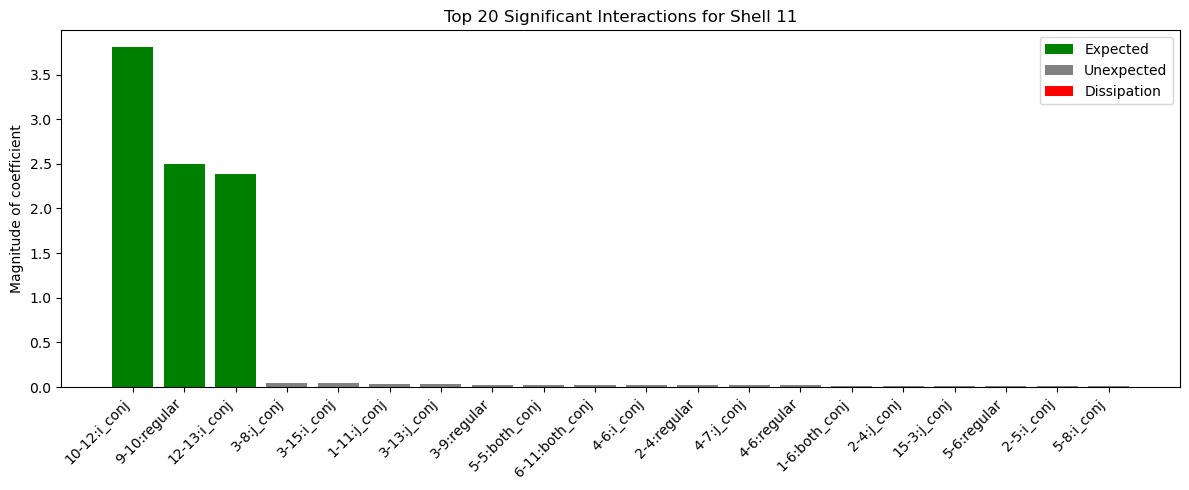


Expected interactions for shell :11
Shells (10,12) Type: i_conj | Expected coefficient: (-0-782.2663910402155j)
Shells (10,9) Type: regular | Expected coefficient: 632.8668044798923j
Shells (12,13) Type: i_conj | Expected coefficient: 4096j
Shells (9,10) Type: regular | Expected coefficient: 632.8668044798923j
Shells (12,10) Type: j_conj | Expected coefficient: (-0-782.2663910402155j)
Shells (13,12) Type: j_conj | Expected coefficient: 4096j

Most significant interactions:
Shell 11 <- Shells (10,12) Type: i_conj Weight: 3.81e+00 Status: EXPECTED
Shell 11 <- Shells (9,10) Type: regular Weight: 2.50e+00 Status: EXPECTED
Shell 11 <- Shells (12,13) Type: i_conj Weight: 2.38e+00 Status: EXPECTED
Shell 11 <- Shells (3,8) Type: j_conj Weight: 4.11e-02 Status: unexpected
Shell 11 <- Shells (3,15) Type: i_conj Weight: 3.96e-02 Status: unexpected
Shell 11 <- Shells (1,11) Type: j_conj Weight: 3.66e-02 Status: unexpected
Shell 11 <- Shells (3,13) Type: j_conj Weight: 3.50e-02 Status: unexpected


In [6]:

from math import sqrt
#spectra_path = '/home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Spectra_complex'
#forcing_path = '/home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Forcing_complex'
#spectra_path="/home/vale/SABRA/params_bin/sim_nn10_LAM_2_nu1e8/Spectra_complex"
#forcing_path="/home/vale/SABRA/params_bin/sim_nn10_LAM_2_nu1e8/Forcing_complex"
#spectra_path="/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e8/Spectra_complex"
#forcing_path="/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e8/Forcing_complex"
spectra_path = "/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e7/Spectra_complex"
forcing_path = "/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e7/Forcing_complex"
#spectra_path = "/home/vale/SABRA/simulations_concluded/sim_nn20_LAM2_nu1e7/Spectra_complex"
#forcing_path = "/home/vale/SABRA/simulations_concluded/sim_nn20_LAM2_nu1e7/Forcing_complex"


# Parameters
phi= (1+sqrt(5))/2
LAM=phi # Golden ratio
AA=1
BB=AA/LAM-AA
CC=-AA/LAM
beta = 0.01
eps = 1
t_start = 30000
t_end = 50000
nu = 1e-7
dt_sim = beta*np.sqrt(nu/eps)
dt= dt_sim*100000
shell_idx = 10 # 0-based index for shell 4
subtract_dissipation= True
normalize_by_k = False  # Normalize by k_n
lambda_reg = 5e6  # Regularization parameter
use_lassoCV = True  # Use LassoCV for automatic lambda selection

# Run analysis with correct shell index
W, significant, lambda_list = analyze_sabra_data(spectra_path, t_start, t_end, nu, dt, 
                                  forcing_dir=forcing_path, 
                                  use_all_interactions=True,
                                  lambda_reg=lambda_reg, 
                                  shell_idx=shell_idx,
                                  include_i=True,
                                  use_lassoCV=use_lassoCV,
                                  plot_results=True,
                                  subtract_dissipation=subtract_dissipation,
                                  normalize_by_k=normalize_by_k)

# Print expected interactions for shell_idx, including expected coefficient values
expected= get_expected_interactions(30)
print(f"\nExpected interactions for shell :{shell_idx+1}")
for i, j, type_name in expected[shell_idx]:
    # Compute expected value based on SABRA model coefficients
    # i, j are 0-based indices
    if type_name == 'i_conj':
        # Forward-forward or backward-forward
        if (i == shell_idx + 1 and j == shell_idx + 2):  # i = n+1, j = n+2
            coeff = 1j * (2.0 ** (shell_idx + 2)) * AA
        elif (i == shell_idx - 1 and j == shell_idx + 1):  # i = n-1, j = n+1
            coeff = 1j * (2.0 ** (shell_idx + 1)) * BB
        else:
            coeff = None
    elif type_name == 'j_conj':
        # Symmetric to i_conj
        if (i == shell_idx + 2 and j == shell_idx + 1):  # i = n+2, j = n+1
            coeff = 1j * (2.0 ** (shell_idx + 2)) * AA
        elif (i == shell_idx + 1 and j == shell_idx - 1):  # i = n+1, j = n-1
            coeff = 1j * (2.0 ** (shell_idx + 1)) * BB
        else:
            coeff = None
    elif type_name == 'regular':
        # Backward-backward
        if (i == shell_idx - 2 and j == shell_idx - 1) or (i == shell_idx - 1 and j == shell_idx - 2):
            coeff = -1j * (2.0 ** (shell_idx)) * CC
        else:
            coeff = None
    else:
        coeff = None

    if coeff is not None:
        print(f"Shells ({i+1},{j+1}) Type: {type_name} | Expected coefficient: {coeff}")
    else:
        print(f"Shells ({i+1},{j+1}) Type: {type_name} | Expected coefficient: N/A")

# Print most significant interactions with status
print("\nMost significant interactions:")
for s in sorted(significant, key=lambda x: abs(x['weight']), reverse=True)[:1000]:
    label = "EXPECTED" if s.get('status', 'unknown') == 'expected' else ""
    # Add color for expected interactions (ANSI escape codes for terminal)
    if label:
        print(f"\033[1;32mShell {s['target']} <- Shells ({s['i']},{s['j']}) "
              f"Type: {s['type']} Weight: {abs(s['weight']):.2e} Status: {label}\033[0m")
    else:
        print(f"Shell {s['target']} <- Shells ({s['i']},{s['j']}) "
              f"Type: {s['type']} Weight: {abs(s['weight']):.2e} Status: {s.get('status', 'unknown')}")

### single shell complex stacking learning, samples sweep and learning treshold

In [ ]:
spectra_path = '/home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Spectra_complex'
forcing_path = '/home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Forcing_complex'
#spectra_path="/home/vale/SABRA/params_bin/sim_nn10_LAM_2_nu1e8/Spectra_complex"
#forcing_path="/home/vale/SABRA/params_bin/sim_nn10_LAM_2_nu1e8/Forcing_complex"
#spectra_path="/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e8/Spectra_complex"
#forcing_path="/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e8/Forcing_complex"
#spectra_path = "/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e7/Spectra_complex"
#forcing_path = "/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e7/Forcing_complex"
#spectra_path = "/home/vale/SABRA/simulations_concluded/sim_nn20_LAM2_nu1e7/Spectra_complex"
#forcing_path = "/home/vale/SABRA/simulations_concluded/sim_nn20_LAM2_nu1e7/Forcing_complex"

# Parameters
beta = 0.01
eps = 1
t_end = 50000
nu = 1e-8
dt_sim = beta * np.sqrt(nu / eps)
dt = dt_sim * 100000
shell_idx = 0  # 0-based index for shell 9
use_lassoCV = True  # Use LassoCV for automatic regularization selection
lambda_reg = 5e2  # Regularization parameter for Lasso regression
subtract_dissipation = False  # Whether to subtract dissipation from target
normalize_by_k = False  # Normalize each equation by its corresponding k_n

# Create a list of different sample sizes
t_start_list = np.arange(1, 50000, 1000)[::-1]  # Start from 49k to 10k with step of 1k, reversed order
label_list = [f"N={t_end-t}" for t in t_start_list]  # Labels showing number of samples

# Run multiple models with different sample sizes
W_list_full, lambda_list, best_lambda_reg = run_multiple_models_by_samples(dir_path=spectra_path,
    t_start_list=t_start_list,
    t_end=t_end,
    nu=nu,
    dt=dt,
    forcing_dir=forcing_path,
    use_all_interactions=True,
    plot_results=False,
    lambda_reg= lambda_reg,
    shell_idx=shell_idx,
    include_i=True,
    use_lassoCV=use_lassoCV,
    subtract_dissipation=subtract_dissipation,
    normalize_by_k=normalize_by_k)

W_list = [w[0] if isinstance(w, tuple) else w for w in W_list_full]
nn = 20  # Assuming the number of shells is 20
save_path = "Ws"
os.makedirs(save_path, exist_ok=True)  # Create the directory if it doesn't exist
filename_W = f"W_list_tstart2_shell{shell_idx+1}_nn{nn}_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.npy"
filename_labels = f"label_list_tstart2_shell{shell_idx+1}_nn{nn}_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.npy"
np.save(os.path.join(save_path, filename_W), W_list)
np.save(os.path.join(save_path, filename_labels), label_list)

Loading spectra sequence...
Loaded spectra with 999 timesteps and 20 shells
Fitting SABRA model for shell 1...
Best lambda_reg (alpha) found: 466.8222927898546
Best lambda_reg (alpha) selected by LassoCV: 466.8222927898546
Analyzing interactions...
Loading spectra sequence...
Loaded spectra with 1999 timesteps and 20 shells
Fitting SABRA model for shell 1...
Best lambda_reg (alpha) found: 271.9738022087998
Best lambda_reg (alpha) selected by LassoCV: 271.9738022087998
Analyzing interactions...
Loading spectra sequence...
Loaded spectra with 2999 timesteps and 20 shells
Fitting SABRA model for shell 1...
Best lambda_reg (alpha) found: 237.78025568753438
Best lambda_reg (alpha) selected by LassoCV: 237.78025568753438
Analyzing interactions...
Loading spectra sequence...
Loaded spectra with 3999 timesteps and 20 shells
Fitting SABRA model for shell 1...
Best lambda_reg (alpha) found: 215.6184104682747
Best lambda_reg (alpha) selected by LassoCV: 215.6184104682747
Analyzing interactions...

KeyboardInterrupt: 

In [3]:

beta = 0.01
eps = 1
t_start = 1
t_end = 50000
nu = 1e-8
dt_sim = beta * np.sqrt(nu / eps)
dt= dt_sim * 100000  # Adjust dt for the simulation
spectra_path = f"/home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Spectra_complex"
forcing_path = f"/home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Forcing_complex"
#spectra_path="/home/vale/SABRA/params_bin/sim_nn10_LAM_2_nu1e8/Spectra_complex"
#forcing_path="/home/vale/SABRA/params_bin/sim_nn10_LAM_2_nu1e8/Forcing_complex"
#spectra_path="/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e8/Spectra_complex"
#forcing_path="/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e8/Forcing_complex"
#spectra_path = "/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e7/Spectra_complex"
#forcing_path = "/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e7/Forcing_complex"
#spectra_path = "/home/vale/SABRA/simulations_concluded/sim_nn20_LAM2_nu1e7/Spectra_complex"
#forcing_path = "/home/vale/SABRA/simulations_concluded/sim_nn20_LAM2_nu1e7/Forcing_complex"
parent_dir= os.path.dirname(spectra_path)
nn = 20
include_i = True  # Include self-interactions
use_lassoCV = True
lambda_reg = 5e2
k = 2.0 ** np.arange(nn)
refined= ''
# Create sample size configurations
t_start_list = np.arange(t_start, 50000, 1000)[::-1]
label_list = [f"N={t_end - t}" for t in t_start_list]

# Parameter combinations
subtract_dissipation_options = [False]  # Whether to subtract dissipation from target
normalize_by_k_options = [False]

shell_idx_options = list(range(12,20))  # Shell indices from 0 to nn-1

# Create output directories
save_path_W = parent_dir+"/Ws"
save_path_lambda = parent_dir+"/Lambdas"
os.makedirs(save_path_W, exist_ok=True)
os.makedirs(save_path_lambda, exist_ok=True)

# MAIN OPTIMIZED LOOP
print("Starting optimized training loop...")

# Step 1: Load all data once
data_slices = load_all_data_once(t_start_list[-1], t_end, spectra_path, forcing_path,t_start_list=t_start_list)

# Step 2: Generate all parameter combinations
param_combinations = list(product(subtract_dissipation_options, normalize_by_k_options, shell_idx_options))
total_combinations = len(param_combinations)

print(f"Processing {total_combinations} parameter combinations...")

# Step 3: Process each combination efficiently
for i, (subtract_dissipation, normalize_by_k, shell_idx) in enumerate(param_combinations):
    print(f"Progress: {i+1}/{total_combinations} - Shell {shell_idx+1}, subtract_D={subtract_dissipation}, k_norm={normalize_by_k}")
    
    try:
        # Fit models for this configuration
        W_list, lambda_list = fit_models_for_shell_config(data_slices, shell_idx, subtract_dissipation,
                                                           normalize_by_k,t_start_list=t_start_list,dt=dt, nu=nu,
                                                           k=k, forcing_path=forcing_path,
                                                           use_all_interactions=True, include_i=include_i,
                                                           use_lassoCV=use_lassoCV, lambda_reg=lambda_reg
        )
        
        # Save results
        save_results(W_list=W_list, lambda_list=lambda_list, shell_idx=shell_idx,
                    subtract_dissipation=subtract_dissipation, normalize_by_k=normalize_by_k,t_start=5e4,refined=refined,
                    label_list=label_list,
                    save_path_W=save_path_W, save_path_lambda=save_path_lambda, use_lassoCV=use_lassoCV, lambda_reg=lambda_reg)
        
        # Clean up to manage memory
        del W_list, lambda_list
        
        if (i + 1) % 10 == 0:  # Periodic garbage collection
            gc.collect()
            
    except Exception as e:
        print(f"Error processing shell {shell_idx+1}: {e}")
        continue

# Clean up
del data_slices
gc.collect()

print("Optimized training loop completed!")



Starting optimized training loop...
Loading all data once...
Loaded spectra with shape (49999, 20)
Loaded forcing with shape (49999, 20)
Processing 8 parameter combinations...
Progress: 1/8 - Shell 13, subtract_D=False, k_norm=False
Progress: 2/8 - Shell 14, subtract_D=False, k_norm=False
Progress: 3/8 - Shell 15, subtract_D=False, k_norm=False
Progress: 4/8 - Shell 16, subtract_D=False, k_norm=False
Progress: 5/8 - Shell 17, subtract_D=False, k_norm=False
Progress: 6/8 - Shell 18, subtract_D=False, k_norm=False
Progress: 7/8 - Shell 19, subtract_D=False, k_norm=False
Progress: 8/8 - Shell 20, subtract_D=False, k_norm=False
Optimized training loop completed!


In [ ]:


# Load the saved W_list file
file_path = "/home/vale/SABRA/params_bin/Ws/W_list_tstart1_shell2_nn20_lambda_lassoCVTrue_subtractDFalse_knormFalse.npy"
W_list_saved = np.load(file_path, allow_pickle=True)

# Get the last element of W_list_saved
last_element = W_list_saved[-1]

# Compare the current W with the last element of W_list_saved
are_equal = np.array_equal(W, last_element)

print(f"Are the current W and the last element of W_list_tstart1_shell2_nn20_lambda_lassoCVTrue_subtractDFalse_knormFalse.npy the same? {are_equal}")



### plot interactions

In [13]:
subtract_dissipation_options = [True]
normalize_by_k_options = [False]
shell_idx_options = list(range(20))  # Assuming 20 shells

t_start=1
t_start_list = np.arange(t_start, 50000, 1000)[::-1]  # Start from 49k to 10k with step of 1k, reversed order

param_combinations = list(product(subtract_dissipation_options, normalize_by_k_options, shell_idx_options))
total_combinations = len(param_combinations)
use_lassoCV= True


for i, (subtract_dissipation, normalize_by_k, shell_idx) in enumerate(param_combinations):
    # Construct the path for the lambda_list file
    lambda_list_path = f"{save_path_lambda}/lambda_list__tstart50000.0_shell{shell_idx+1}_nn{nn}_lambda_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.npy"
    
    # Check if the file exists
    if os.path.exists(lambda_list_path):
        # Load the lambda_list
        lambda_list = np.load(lambda_list_path, allow_pickle=True)
        print(f"Loaded lambda_list for shell {shell_idx+1}, subtract_dissipation={subtract_dissipation}, normalize_by_k={normalize_by_k}")
        # Plot the lambda evolution
        plot_lambda_evolution(
            lambda_list=lambda_list,
            x_values=t_start_list,
            xlabel="Number of samples",
            shell_idx=shell_idx,
            normalize_by_k=normalize_by_k,
            subtract_dissipation=subtract_dissipation
        )
    else:
        print(f"Lambda list file not found for {lambda_list_path}")

Loaded lambda_list for shell 1, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 2, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 3, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 4, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 5, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 6, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 7, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 8, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 9, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 10, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 11, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 12, subtract_dissipation=True, normalize_by_k=False
Loaded lambda_list for shell 13, subt

In [20]:
# Plot heatmap of interactions across different sample sizes

cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples',
         'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu',
         'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'binary', 'gist_yarg', 'gist_gray',
         'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'coolwarm', 'RdBu', 'RdGy', 'RdYlGn',
         'RdYlBu', 'Spectral', 'cool', 'hot', 'copper', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'afmhot', 'gist_heat',
         'gnuplot', 'gnuplot2', 'ocean', 'seismic', 'terrain', 'brg', 'bwr', 'gist_earth', 'gist_rainbow',
         'rainbow', 'jet', 'nipy_spectral', 'gist_stern', 'CMRmap', 'cubehelix', 'turbo']


subtract_dissipation_options = [True]
normalize_by_k_options = [False]
shell_idx_options = list(range(20)) # Assuming 20 shells

param_combinations = list(product(subtract_dissipation_options, normalize_by_k_options, shell_idx_options))
total_combinations = len(param_combinations)

expected = get_expected_interactions(20)
cmap= 'viridis'  # Choose a colormap from the list above
beta = 0.01
eps = 1
t_start = 1
t_end = 50000
nu = 1e-8
dt_sim = beta * np.sqrt(nu / eps)
dt=dt_sim
nn = 20
spectra_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Spectra_complex"
forcing_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Forcing_complex"
#spectra_path="/home/vale/SABRA/params_bin/sim_nn10_LAM_2_nu1e8/Spectra_complex"
#forcing_path="/home/vale/SABRA/params_bin/sim_nn10_LAM_2_nu1e8/Forcing_complex"
#spectra_path="/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e8/Spectra_complex"
#forcing_path="/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e8/Forcing_complex"
#spectra_path = "/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e7/Spectra_complex"
#forcing_path = "/home/vale/SABRA/simulations_concluded/sim_nn30_golden_nu1e7/Forcing_complex"
#spectra_path = "/home/vale/SABRA/simulations_concluded/sim_nn20_LAM2_nu1e7/Spectra_complex"
#forcing_path = "/home/vale/SABRA/simulations_concluded/sim_nn20_LAM2_nu1e7/Forcing_complex"

include_i = True  # Include self-interactions
use_lassoCV = False
lambda_reg = 5e2
k = 2.0 ** np.arange(nn)
top_n_start=20
top_n_end=30
threshold= 1.5e-4  # Threshold for significant interactions
min_necessary_samples = 50  # Define the maximum number of elements to include
use_lassoCV = True  # Use LassoCV for automatic regularization selection
lambda_reg = 5e2  # Regularization parameter for Lasso regression
subtract_dissipation = True  # Whether to subtract dissipation from target
normalize_by_k = False  # Normalize each equation by its corresponding k_n
t_start_list = np.arange(t_start, 50000, 1000)[::-1]

for i, (subtract_dissipation, normalize_by_k, shell_idx) in enumerate(param_combinations):
    # Plot heatmap of interactions across different sample sizes
    # Filter W_list to include only up to a certain number of elements defined by min_necessary_samples
    # Ensure the files are saved correctly before loading
    save_path = "Ws"
    filename_W = f"W_list__tstart50000.0_shell{shell_idx+1}_nn{nn}_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.npy"
    filename_labels = f"label_list__tstart50000.0_shell{shell_idx+1}_nn{nn}_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.npy"
  
    # Check if the files exist
    if not os.path.exists(os.path.join(save_path, filename_W)) or not os.path.exists(os.path.join(save_path, filename_labels)):
        print(f"Skipping shell {shell_idx+1}, files not found")
        continue


    # Load the files
    label_list = np.load(os.path.join(save_path, filename_labels), allow_pickle=True)
    W_list = np.load(os.path.join(save_path, filename_W), allow_pickle=True)
    #label_list = np.load('/home/vale/SABRA/params_bin2/Ws/label_list_refined_tstart2_shell2_nn20_lambda_lassoCVTrue_subtractDFalse_knormTrue.npy', allow_pickle=True)
    #W_list = np.load('/home/vale/SABRA/params_bin2/Ws/W_list_refined_tstart2_shell2_nn20_lambda_lassoCVTrue_subtractDFalse_knormTrue.npy', allow_pickle=True)
    filtered_W_list = W_list[:min_necessary_samples]
    filtered_label_list = label_list[:min_necessary_samples]

    # Plot heatmap of interactions across different sample sizes
    plot_interaction_heatmap(
        W_list=filtered_W_list,  # Use the filtered W_list
        label_list=filtered_label_list,  # Use the filtered label list
        nn=nn,
        use_all_interactions=True,
        expected_interactions=expected,
        shell_idx=shell_idx,
        xlabel="Number of samples",
        top_n=40, top_n_start=top_n_start, top_n_end=top_n_end,
        cmap=cmap,
        use_lassoCV=use_lassoCV,
        lambda_reg=lambda_reg,
        subtract_dissipation=subtract_dissipation,
        normalize_by_k=normalize_by_k,
        threshold=threshold,
    )




Debug: Found 19 unique interactions
First few keys: [(1, 2, 'i_conj'), (0, 0, 'j_conj'), (0, 0, 'both_conj'), (0, 0, 'regular'), (1, 0, 'j_conj')]
Debug: Dissipation rows in heatmap: []
Debug: Found 23 unique interactions
First few keys: [(2, 3, 'i_conj'), (0, 2, 'i_conj'), (4, 4, 'regular'), (2, 2, 'j_conj'), (0, 1, 'j_conj')]
Debug: Dissipation rows in heatmap: []
Debug: Found 32 unique interactions
First few keys: [(3, 4, 'i_conj'), (0, 1, 'regular'), (1, 3, 'i_conj'), (4, 5, 'i_conj'), (2, 3, 'i_conj')]
Debug: Dissipation rows in heatmap: []
Debug: Found 28 unique interactions
First few keys: [(4, 5, 'i_conj'), (1, 2, 'regular'), (4, 4, 'regular'), (4, 4, 'j_conj'), (3, 3, 'regular')]
Debug: Dissipation rows in heatmap: []
Debug: Found 37 unique interactions
First few keys: [(5, 6, 'i_conj'), (3, 5, 'i_conj'), (2, 3, 'regular'), (4, 5, 'both_conj'), (2, 5, 'regular')]
Debug: Dissipation rows in heatmap: []
Debug: Found 40 unique interactions
First few keys: [(4, 6, 'i_conj'), (6, 7

## Mixed stuff

### greedy selection

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
import pickle
import os
from datetime import datetime
from scipy.optimize import curve_fit





def build_coupled_regression_system(U, dt, nu, k, interaction_mask, dissipation_mask=None, forcing=None, 
                                  include_i=True, subtract_dissipation=True, normalize_by_k=False):
    """
    Build coupled regression system for all shells simultaneously with dissipation masking.
    
    Args:
        U: array[n_timesteps, nn] - complex spectra  
        interaction_mask: array[nn, nn, n_types] - binary interaction mask
        dissipation_mask: array[nn] or None - binary dissipation mask
        ... other args as before
    
    Returns:
        X: array[n_equations, n_features] - block diagonal structure
        y: array[n_equations] - stacked targets for all shells
        feature_to_interaction: dict - maps feature index to (i,j,type)
    """
    n_timesteps, nn = U.shape
    
    # Compute derivatives
    dUdt = compute_derivatives(U, dt)
    
    # Build dictionary for active interactions only
    include_dissipation = not subtract_dissipation
    Phi = build_binary_interaction_dictionary(U[:-1], interaction_mask, dissipation_mask,
                                            include_i=include_i,
                                            include_dissipation=include_dissipation,
                                            k=k, nu=nu)
    
    n_active_features = Phi.shape[1]
    n_time_steps = n_timesteps - 1
    
    # Create block diagonal system: each shell has its own copy of the dictionary
    # X will be [2*nn*n_time_steps, n_active_features] (2 for real/imag)
    total_equations = 2 * nn * n_time_steps
    X = np.zeros((total_equations, n_active_features), dtype=float)
    y = np.zeros(total_equations, dtype=float)
    
    # Build feature mapping for interpretability
    feature_to_interaction = {}
    n_types = interaction_mask.shape[2] if len(interaction_mask.shape) == 3 else 1
    feature_idx = 0
    
    for i in range(nn):
        for j in range(nn):
            for t in range(n_types):
                if len(interaction_mask.shape) == 3:
                    if interaction_mask[i, j, t] == 0:
                        continue
                else:
                    if interaction_mask[i, j] == 0:
                        continue
                
                type_names = ['regular', 'j_conj', 'i_conj', 'both_conj']
                type_name = type_names[t] if n_types > 1 else 'regular'
                feature_to_interaction[feature_idx] = (i, j, type_name)
                feature_idx += 1
    
    if include_dissipation:
        for i in range(nn):
            if dissipation_mask is None or dissipation_mask[i] == 1:
                feature_to_interaction[feature_idx] = (i, i, 'dissipation')
                feature_idx += 1
    
    # Fill the system for each shell
    for shell in range(nn):
        # Prepare target for this shell
        y_shell = dUdt[:, shell]
        
        if subtract_dissipation:
            y_shell = y_shell + nu * k[shell]**2 * U[:-1, shell]
        
        if forcing is not None:
            y_shell = y_shell - forcing[:-1, shell]
        
        if normalize_by_k:
            y_shell = y_shell / k[shell]
            Phi_shell = Phi / k[shell]
        else:
            Phi_shell = Phi
        
        # Real part equations
        start_idx = shell * n_time_steps * 2
        end_idx = start_idx + n_time_steps
        X[start_idx:end_idx, :] = Phi_shell.real
        y[start_idx:end_idx] = y_shell.real
        
        # Imaginary part equations  
        start_idx = end_idx
        end_idx = start_idx + n_time_steps
        X[start_idx:end_idx, :] = Phi_shell.imag
        y[start_idx:end_idx] = y_shell.imag
    
    return X, y, feature_to_interaction


def fit_dissipation_analysis(data_slices=None, W_lists_path=None, label_lists_path=None, 
                           subtract_dissipation=False, normalize_by_k=False, t_start_list=None, 
                           dt=None, nu=None, k=None, forcing_path=None, shell_range=None, 
                           use_lassoCV=True, lambda_reg=0.01, from_masked=False, 
                           masked_results_path=None, W_index=0):
    """
    Apply dissipation analysis using either pre-computed W_lists or masked optimization results.
    
    Args:
        data_slices: dict - pre-loaded data slices (for new computation)
        W_lists_path: str - path to saved W_list files (for existing results)
        label_lists_path: str - path to saved label_list files
        from_masked: bool - whether to use results from masked optimization
        masked_results_path: str - path to masked optimization results
        W_index: int - which W from W_list to use for analysis
        ... other args as before
    """
    print("Starting dissipation analysis...")
    
    if from_masked and masked_results_path:
        # Load masked optimization results
        print(f"Loading masked optimization results from {masked_results_path}")
        with open(masked_results_path, 'rb') as f:
            masked_results = pickle.load(f)
        
        dissipation_coeffs = []
        shells_analyzed = []
        
        # Extract dissipation coefficients from masked results
        if 'independent' in masked_results:
            for shell_idx in shell_range:
                if shell_idx in masked_results['independent']:
                    shell_results = masked_results['independent'][shell_idx]
                    # Get the final coefficients
                    if 'coefficient_history' in shell_results and len(shell_results['coefficient_history']) > 0:
                        final_coef = shell_results['coefficient_history'][-1]
                        feature_map = final_coef['feature_map']
                        coefficients = final_coef['coef']
                        
                        # Find dissipation coefficient for this shell
                        dissip_coef = 0.0
                        for feat_idx, (i, j, term_type) in feature_map.items():
                            if term_type == 'dissipation' and i == shell_idx:
                                dissip_coef = coefficients[feat_idx]
                                break
                        
                        dissipation_coeffs.append(dissip_coef)
                        shells_analyzed.append(shell_idx)
                        print(f"Shell {shell_idx}: dissipation coefficient = {dissip_coef:.6f}")
        
        elif 'coupled' in masked_results:
            # For coupled results, need to extract shell-specific dissipation terms
            shell_results = masked_results['coupled']
            if 'coefficient_history' in shell_results and len(shell_results['coefficient_history']) > 0:
                final_coef = shell_results['coefficient_history'][-1]
                feature_map = final_coef['feature_map']
                coefficients = final_coef['coef']
                
                for shell_idx in shell_range:
                    dissip_coef = 0.0
                    for feat_idx, (i, j, term_type) in feature_map.items():
                        if term_type == 'dissipation' and i == shell_idx:
                            dissip_coef = coefficients[feat_idx]
                            break
                    
                    dissipation_coeffs.append(dissip_coef)
                    shells_analyzed.append(shell_idx)
                    print(f"Shell {shell_idx}: dissipation coefficient = {dissip_coef:.6f}")
    
    elif W_lists_path and label_lists_path:
        # Load pre-computed W_lists
        print(f"Loading W_lists from {W_lists_path}")
        dissipation_coeffs = []
        shells_analyzed = []
        
        for shell_idx in shell_range:
            # Construct filenames based on the pattern
            nn = len(k) if k is not None else 20  # fallback to 20 if k not provided
            W_filename = f"W_list_tstart{t_start_list[-1]}_shell{shell_idx + 1}_nn{nn}_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.npy"
            label_filename = f"label_list_tstart{t_start_list[-1]}_shell{shell_idx + 1}_nn{nn}_lambda{(lambda_reg if not use_lassoCV else '')}_lassoCV{use_lassoCV}_subtractD{subtract_dissipation}_knorm{normalize_by_k}.npy"
            
            W_file = os.path.join(W_lists_path, W_filename)
            label_file = os.path.join(label_lists_path, label_filename)
            
            if os.path.exists(W_file) and os.path.exists(label_file):
                W_list = np.load(W_file, allow_pickle=True)
                label_list = np.load(label_file, allow_pickle=True)
                
                # Use specified W_index
                if W_index < len(W_list):
                    W = W_list[W_index]
                    
                    # Find dissipation coefficient using analyze_interactions
                    # Note: when subtract_dissipation=False, dissipation terms are included in the dictionary
                    significant = analyze_interactions(W, nn, use_all_interactions=True, 
                                                    threshold=1e-10, shell_idx=shell_idx, 
                                                    include_dissipation=not subtract_dissipation)
                    
                    # Extract dissipation coefficient for current shell
                    dissip_coef = 0.0
                    for term in significant:
                        if (term['term_type'] == 'dissipation' and 
                            term['i'] - 1 == shell_idx):  # Convert from 1-based to 0-based
                            dissip_coef = term['weight']
                            break
                    
                    # If no dissipation found in analyze_interactions, try direct extraction
                    if dissip_coef == 0.0 and not subtract_dissipation:
                        # Dissipation terms are typically at the end of the coefficient vector
                        # Position: nn*nn*n_types + shell_idx
                        n_types = 4  # assuming all interaction types
                        dissip_start_idx = nn * nn * n_types
                        if dissip_start_idx + shell_idx < len(W.flatten()):
                            dissip_coef = W.flatten()[dissip_start_idx + shell_idx]
                    
                    dissipation_coeffs.append(dissip_coef)
                    shells_analyzed.append(shell_idx)
                    print(f"Shell {shell_idx}: dissipation coefficient = {dissip_coef:.6f}")
                else:
                    print(f"W_index {W_index} out of range for shell {shell_idx}")
            else:
                print(f"Files not found for shell {shell_idx}: {W_file}")
    
    else:
        # Compute new dissipation analysis using data_slices
        print("Computing new dissipation analysis...")
        dissipation_coeffs = []
        shells_analyzed = []
        
        for shell_idx in shell_range:
            print(f"Analyzing dissipation for shell {shell_idx}")
            
            # Fit model for this shell with dissipation focus
            W_list, lambda_list = fit_models_for_shell_config(
                data_slices, shell_idx, subtract_dissipation=False,  # Include dissipation
                normalize_by_k=normalize_by_k, t_start_list=t_start_list,
                dt=dt, nu=nu, k=k, forcing_path=forcing_path,
                use_all_interactions=False, include_i=True,  # Focus on dissipation
                use_lassoCV=use_lassoCV, lambda_reg=lambda_reg
            )
            
            # Extract dissipation coefficient (assuming it's at the end of the coefficient vector)
            # Average across time windows
            if len(W_list) > W_index:
                W = W_list[W_index]
                # Find dissipation coefficient for this shell
                significant = analyze_interactions(W, len(k), use_all_interactions=False, 
                                                threshold=1e-10, shell_idx=shell_idx, 
                                                include_dissipation=True)
                
                dissip_coef = 0.0
                for term in significant:
                    if (term['term_type'] == 'dissipation' and 
                        term['i'] - 1 == shell_idx):  # Convert from 1-based to 0-based
                        dissip_coef = term['weight']
                        break
                
                dissipation_coeffs.append(dissip_coef)
            else:
                dissipation_coeffs.append(0.0)
            
            shells_analyzed.append(shell_idx)
    
    # Convert to numpy arrays
    shells_analyzed = np.array(shells_analyzed)
    dissipation_coeffs = np.array(dissipation_coeffs)
    k_values = k[shells_analyzed] if k is not None else np.arange(len(shells_analyzed))
    
    # Plot dissipation coefficients vs shell
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(shells_analyzed, dissipation_coeffs, 'bo-', label='Learned dissipation')
    plt.xlabel('Shell index')
    plt.ylabel('Dissipation coefficient')
    plt.title('Dissipation coefficients vs Shell')
    plt.grid(True)
    plt.legend()
    
    # Fit k^2 behavior
    def k_squared_model(k_vals, a, b):
        return a * k_vals**2 + b
    
    try:
        # Filter out zero coefficients for fitting
        nonzero_mask = np.abs(dissipation_coeffs) > 1e-10
        if np.sum(nonzero_mask) > 2:  # Need at least 2 points for fitting
            k_fit_vals = k_values[nonzero_mask]
            dissip_fit_vals = dissipation_coeffs[nonzero_mask]
            
            popt, pcov = curve_fit(k_squared_model, k_fit_vals, dissip_fit_vals)
            k_fit = np.linspace(k_values.min(), k_values.max(), 100)
            dissip_fit = k_squared_model(k_fit, *popt)
            
            plt.subplot(1, 2, 2)
            plt.plot(k_values, dissipation_coeffs, 'bo', label='Learned dissipation')
            plt.plot(k_fit, dissip_fit, 'r-', label=f'k² fit: {popt[0]:.3e}k² + {popt[1]:.3e}')
            plt.xlabel('k (wavenumber)')
            plt.ylabel('Dissipation coefficient') 
            plt.title('Dissipation vs k (expecting k² behavior)')
            plt.grid(True)
            plt.legend()
            
            print(f"Fitted k² behavior: coefficient = {popt[0]:.3e}, offset = {popt[1]:.3e}")
            
            # Calculate R-squared
            ss_res = np.sum((dissip_fit_vals - k_squared_model(k_fit_vals, *popt)) ** 2)
            ss_tot = np.sum((dissip_fit_vals - np.mean(dissip_fit_vals)) ** 2)
            r_squared = 1 - (ss_res / ss_tot) if ss_tot > 0 else 0
            print(f"R-squared: {r_squared:.4f}")
            
        else:
            print("Not enough non-zero coefficients for k² fitting")
            popt = None
            plt.subplot(1, 2, 2)
            plt.plot(k_values, dissipation_coeffs, 'bo', label='Learned dissipation')
            plt.xlabel('k (wavenumber)')
            plt.ylabel('Dissipation coefficient') 
            plt.title('Dissipation vs k (insufficient data for fitting)')
            plt.grid(True)
            plt.legend()
        
    except Exception as e:
        print(f"Could not fit k² behavior: {e}")
        popt = None
        plt.subplot(1, 2, 2)
        plt.plot(k_values, dissipation_coeffs, 'bo', label='Learned dissipation')
        plt.xlabel('k (wavenumber)')
        plt.ylabel('Dissipation coefficient') 
        plt.title('Dissipation vs k (fitting failed)')
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return shells_analyzed, dissipation_coeffs, popt


def _optimize_coupled_with_dissipation(U, dt, nu, k, max_interactions, forcing, include_i, subtract_dissipation,
                                     normalize_by_k, use_all_interaction_types, impose_symmetry, output_dir, 
                                     filename_parts, timestamp, use_lassoCV, lambda_reg, include_dissipation_in_search):
    """Helper function for coupled optimization with dissipation masking."""
    from sklearn.linear_model import Lasso, LassoCV
    
    nn = U.shape[1]
    n_types = 4 if use_all_interaction_types else 1
    
    current_interaction_mask = np.zeros((nn, nn, n_types), dtype=int)
    current_dissipation_mask = np.zeros(nn, dtype=int)
    current_score = -np.inf
    interaction_history = []
    score_history = []
    coefficient_history = []
    
    for step in range(max_interactions):
        best_improvement = -np.inf
        best_interaction = None
        best_new_interaction_mask = None
        best_new_dissipation_mask = None
        best_coefficients = None
        
        print(f"Step {step + 1}/{max_interactions}")
        
        candidates_tested = 0
        
        # Test interaction candidates
        for i in range(nn):
            for j in range(nn):
                for t in range(n_types):
                    if current_interaction_mask[i, j, t] == 1:
                        continue
                    
                    test_interaction_mask = current_interaction_mask.copy()
                    test_interaction_mask[i, j, t] = 1
                    
                    if impose_symmetry:
                        test_interaction_mask[j, i, t] = 1
                    
                    try:
                        X, y, feature_map = build_coupled_regression_system(
                            U, dt, nu, k, test_interaction_mask, 
                            dissipation_mask=current_dissipation_mask, forcing=forcing,
                            include_i=include_i, subtract_dissipation=subtract_dissipation,
                            normalize_by_k=normalize_by_k
                        )
                        
                        if X.shape[1] == 0:  # No features
                            continue
                            
                        if use_lassoCV:
                            lasso = LassoCV(fit_intercept=False, max_iter=10000, cv=5)
                        else:
                            lasso = Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=10000)
                        
                        lasso.fit(X, y)
                        score = lasso.score(X, y)
                        
                        if score > best_improvement:
                            best_improvement = score
                            best_interaction = ('interaction', i, j, t)
                            best_new_interaction_mask = test_interaction_mask.copy()
                            best_new_dissipation_mask = current_dissipation_mask.copy()
                            best_coefficients = {
                                'coef': lasso.coef_,
                                'feature_map': feature_map
                            }
                        
                        candidates_tested += 1
                        if candidates_tested % 100 == 0:
                            print(f"  Tested {candidates_tested} candidates...")
                            
                    except Exception as e:
                        print(f"  Skipped interaction candidate ({i},{j},{t}) due to error: {e}")
        
        # Test dissipation candidates if enabled
        if include_dissipation_in_search:
            for i in range(nn):
                if current_dissipation_mask[i] == 1:
                    continue
                    
                test_dissipation_mask = current_dissipation_mask.copy()
                test_dissipation_mask[i] = 1
                
                try:
                    X, y, feature_map = build_coupled_regression_system(
                        U, dt, nu, k, current_interaction_mask, 
                        dissipation_mask=test_dissipation_mask, forcing=forcing,
                        include_i=include_i, subtract_dissipation=subtract_dissipation,
                        normalize_by_k=normalize_by_k
                    )
                    
                    if X.shape[1] == 0:  # No features
                        continue
                        
                    if use_lassoCV:
                        lasso = LassoCV(fit_intercept=False, max_iter=10000, cv=5)
                    else:
                        lasso = Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=10000)
                    
                    lasso.fit(X, y)
                    score = lasso.score(X, y)
                    
                    if score > best_improvement:
                        best_improvement = score
                        best_interaction = ('dissipation', i)
                        best_new_interaction_mask = current_interaction_mask.copy()
                        best_new_dissipation_mask = test_dissipation_mask.copy()
                        best_coefficients = {
                            'coef': lasso.coef_,
                            'feature_map': feature_map
                        }
                    
                    candidates_tested += 1
                    if candidates_tested % 100 == 0:
                        print(f"  Tested {candidates_tested} candidates...")
                    
                except Exception as e:
                    print(f"  Skipped dissipation candidate ({i}) due to error: {e}")
        
        if best_interaction is None:
            print("No further improvement found. Stopping.")
            break
        
        current_interaction_mask = best_new_interaction_mask
        current_dissipation_mask = best_new_dissipation_mask
        interaction_history.append((best_interaction, best_improvement))
        score_history.append(best_improvement)
        coefficient_history.append(best_coefficients)
        current_score = best_improvement
        
        print(f"  Selected {best_interaction} with score {best_improvement:.6f}")
        
        # Save intermediate results if output_dir provided
        if output_dir and filename_parts and timestamp:
            _save_step_results(output_dir, filename_parts, timestamp, 'coupled', None, step, 
                              {'interaction_mask': current_interaction_mask, 'dissipation_mask': current_dissipation_mask}, 
                              current_score, interaction_history, score_history, coefficient_history[-1])
    
    return {
        'interaction_mask': current_interaction_mask,
        'dissipation_mask': current_dissipation_mask,
        'score': current_score,
        'interaction_history': interaction_history,
        'score_history': score_history,
        'coefficient_history': coefficient_history
    }


def progressive_batch_lasso_selection(data_slices, shell_idx, subtract_dissipation, normalize_by_k, 
                                     dt, nu, k, selection_percentage=0.7, max_interactions=None, 
                                     improvement_threshold=0.01, lambda_reg=0.01, use_lasso_cv=False):
    """
    Perform progressive Lasso selection across batches:
    1. Start with all interactions
    2. Train on first batch
    3. Keep top x% of nonzero coefficients
    4. Mask out other interactions
    5. Move to next batch with reduced feature set
    6. Repeat until convergence or limits reached
    """
    print(f"Starting progressive batch Lasso selection for shell {shell_idx}")
    
    # Get sorted batch keys (assuming they represent time order)
    batch_keys = sorted(data_slices.keys())
    n_batches = len(batch_keys)
    print(f"Processing {n_batches} batches")
    
    # Build initial regression system from first batch to get feature dimensions
    first_batch = data_slices[batch_keys[0]]
    U_slice, forcing_slice = first_batch
    X_initial, y_initial = build_regression_system(
        U_slice, dt, nu, k=k, forcing=forcing_slice,
        use_all_interactions=True, shell_idx=shell_idx, include_i=True,
        subtract_dissipation=subtract_dissipation, normalize_by_k=normalize_by_k
    )
    
    n_features = X_initial.shape[1]
    active_mask = np.ones(n_features, dtype=bool)  # Start with all features active
    
    # Storage for results
    losses = []
    n_selected_features = []
    coefficients_history = []
    batch_history = []
    
    batch_idx = 0
    
    for batch_key in batch_keys:
        print(f"Processing batch {batch_idx + 1}/{n_batches} (key: {batch_key})")
        
        # Get current batch data
        U_slice, forcing_slice = data_slices[batch_key]
        X, y = build_regression_system(
            U_slice, dt, nu, k=k, forcing=forcing_slice,
            use_all_interactions=True, shell_idx=shell_idx, include_i=True,
            subtract_dissipation=subtract_dissipation, normalize_by_k=normalize_by_k
        )
        
        # Apply current active mask
        X_masked = X[:, active_mask]
        
        # Fit Lasso or LassoCV
        if use_lasso_cv:
            from sklearn.linear_model import LassoCV
            alphas = np.logspace(-4, 0, 50)
            lasso = LassoCV(alphas=alphas, fit_intercept=False, max_iter=100000, cv=5)
            lasso.fit(X_masked, y)
            print(f"LassoCV selected alpha: {lasso.alpha_:.6f}")
        else:
            lasso = Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=100000)
            lasso.fit(X_masked, y)
        
        # Calculate loss
        y_pred = lasso.predict(X_masked)
        loss = np.mean((y - y_pred)**2)
        losses.append(loss)
        batch_history.append(batch_key)
        
        # Get full coefficient vector (including zeros for inactive features)
        full_coeffs = np.zeros(n_features)
        full_coeffs[active_mask] = lasso.coef_
        coefficients_history.append(full_coeffs.copy())
        
        # Count nonzero coefficients
        nonzero_indices = np.where(active_mask)[0][lasso.coef_ != 0]
        n_nonzero = len(nonzero_indices)
        n_selected_features.append(n_nonzero)
        
        print(f"Batch {batch_idx + 1}: Loss = {loss:.6f}, Nonzero features = {n_nonzero}")
        
        # Check stopping conditions
        if n_nonzero == 0:
            print("No nonzero coefficients found, stopping.")
            break
            
        # Check improvement threshold (after first batch)
        if batch_idx > 0:
            improvement = (losses[-2] - losses[-1]) / losses[-2] if losses[-2] != 0 else 0
            print(f"Improvement: {improvement:.6f}")
            
            if improvement < improvement_threshold:
                print(f"Improvement below threshold ({improvement_threshold}), stopping.")
                break
        
        # Check max interactions limit
        if max_interactions is not None and n_nonzero <= max_interactions:
            print(f"Reached maximum interactions limit ({max_interactions}), stopping.")
            break
        
        # Select top percentage of nonzero coefficients for next iteration
        if batch_idx < n_batches - 1:  # Don't update mask after last batch
            n_to_select = max(1, int(n_nonzero * selection_percentage))
            abs_coeffs = np.abs(lasso.coef_[lasso.coef_ != 0])
            threshold = np.sort(abs_coeffs)[-n_to_select]
            
            # Update active mask for next batch
            new_active_mask = np.zeros(n_features, dtype=bool)
            active_indices = np.where(active_mask)[0]
            selected_local_indices = np.where(np.abs(lasso.coef_) >= threshold)[0]
            new_active_mask[active_indices[selected_local_indices]] = True
            
            active_mask = new_active_mask
            print(f"Selected top {n_to_select} features for next batch")
        
        batch_idx += 1
    
    # Plot results
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(range(1, len(losses) + 1), losses, 'bo-')
    plt.xlabel('Batch Number')
    plt.ylabel('MSE Loss')
    plt.title('Loss Across Batches')
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(range(1, len(n_selected_features) + 1), n_selected_features, 'ro-')
    plt.xlabel('Batch Number')
    plt.ylabel('Number of Selected Features')
    plt.title('Feature Selection Progress')
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    final_coeffs = coefficients_history[-1]
    nonzero_coeffs = final_coeffs[final_coeffs != 0]
    nonzero_indices = np.where(final_coeffs != 0)[0]
    plt.stem(range(len(nonzero_coeffs)), nonzero_coeffs)
    plt.xlabel('Selected Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'Final Selected Coefficients ({len(nonzero_coeffs)} features)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'coefficients_history': coefficients_history,
        'losses': losses,
        'n_selected_features': n_selected_features,
        'final_active_mask': active_mask,
        'batch_history': batch_history,
        'final_coefficients': coefficients_history[-1]
    }



def coupled_lasso_learning(U, dt, nu, k, forcing=None, 
                           include_i=True, subtract_dissipation=True, normalize_by_k=False, 
                           use_all_interaction_types=True, impose_symmetry=False, 
                           lambda_reg=1e-5, use_lassoCV=False, output_dir='coupled_lasso_results', 
                           simulation_name=None):
    """
    Perform coupled Lasso learning with a mask allowing for all interactions.

    Args:
        U: array[n_timesteps, nn] - complex spectra
        dt: float - timestep
        nu: float - viscosity
        k: array[nn] - wavenumbers
        forcing: array[n_timesteps, nn] or None - forcing term
        max_interactions: int - maximum number of interactions to include
        include_i: bool - whether to multiply by imaginary unit
        subtract_dissipation: bool - whether to subtract dissipation from target
        normalize_by_k: bool - whether to normalize each equation by its corresponding k_n
        use_all_interaction_types: bool - whether to include all interaction types
        impose_symmetry: bool - whether to impose symmetry in the interaction mask
        lambda_reg: float - regularization parameter for Lasso
        use_lassoCV: bool - whether to use LassoCV for automatic regularization
        output_dir: str - directory to save results
        simulation_name: str or None - custom name for the simulation

    Returns:
        results: dict containing the interaction mask, scores, and histories
    """
    nn = U.shape[1]
    n_timesteps = U.shape[0]
    n_types = 4 if use_all_interaction_types else 1

    # Initialize the interaction mask
    interaction_mask = np.ones((nn, nn, n_types), dtype=int)  # Allow all interactions

    # Build the regression system
    X, y, feature_to_interaction = build_coupled_regression_system(
        U, dt, nu, k, interaction_mask, forcing=forcing, 
        include_i=include_i, subtract_dissipation=subtract_dissipation, 
        normalize_by_k=normalize_by_k
    )

    # Perform Lasso regression
    if use_lassoCV:
       
        lasso = LassoCV(fit_intercept=False, max_iter=100000, cv=5)
    else:
        
        lasso = Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=100000)

    lasso.fit(X, y)
    score = lasso.score(X, y)
    coef = lasso.coef_

    # Save results
    os.makedirs(output_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M")
    filename_parts = _create_enhanced_filename_descriptor(
        learning_mode='coupled', include_i=include_i, subtract_dissipation=subtract_dissipation, 
        normalize_by_k=normalize_by_k, use_all_interaction_types=use_all_interaction_types, 
        impose_symmetry=impose_symmetry, has_forcing=forcing is not None, 
        use_lassoCV=use_lassoCV, lambda_reg=lambda_reg, threshold=None, 
        nn=nn, n_timesteps=n_timesteps, simulation_name=simulation_name
    )
    results_filename = f"results_{filename_parts}_{timestamp}.pkl"
    results_file = os.path.join(output_dir, results_filename)

    results = {
        'interaction_mask': interaction_mask,
        'score': score,
        'coef': coef,
        'feature_to_interaction': feature_to_interaction,
        'metadata': {
            'nn': nn,
            'n_timesteps': n_timesteps,
            'dt': dt,
            'nu': nu,
            'k': k.tolist() if hasattr(k, 'tolist') else k,
            'include_i': include_i,
            'subtract_dissipation': subtract_dissipation,
            'normalize_by_k': normalize_by_k,
            'use_all_interaction_types': use_all_interaction_types,
            'impose_symmetry': impose_symmetry,
            'use_lassoCV': use_lassoCV,
            'lambda_reg': lambda_reg,
            'simulation_name': simulation_name,
            'timestamp': timestamp
        }
    }

    with open(results_file, 'wb') as f:
        pickle.dump(results, f)

    print(f"Results saved to {results_file}")

    # Plot results
    _plot_coupled_results(results, output_dir, save_plots=True, plot_suffix=filename_parts)

    return results


def _plot_coupled_results(coupled_results, output_dir, save_plots, plot_suffix,max_interactions =10):
    """Plot results for coupled optimization."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Coupled Learning Results', fontsize=16)
    
    # Score progress
    axes[0, 0].plot(coupled_results['score_history'], 'b-o', markersize=4)
    axes[0, 0].set_xlabel('Optimization Step')
    axes[0, 0].set_ylabel('R² Score')
    axes[0, 0].set_title('Score Progress')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Interaction mask visualization
    mask = coupled_results['mask']
    if len(mask.shape) == 3:
        # Sum over interaction types for visualization
        mask_viz = np.sum(mask, axis=2)
    else:
        mask_viz = mask
    
    im1 = axes[0, 1].imshow(mask_viz, cmap='Blues', aspect='auto')
    axes[0, 1].set_xlabel('Shell j')
    axes[0, 1].set_ylabel('Shell i')
    axes[0, 1].set_title('Interaction Mask')
    plt.colorbar(im1, ax=axes[0, 1])
    
    # Selected interactions timeline
    interactions = [hist[0] for hist in coupled_results['interaction_history']]
    scores = [hist[1] for hist in coupled_results['interaction_history']]
    
    axes[1, 0].scatter(range(len(interactions)), [i[0] for i in interactions], 
                      c=scores, cmap='viridis', s=50, alpha=0.7)
    axes[1, 0].set_xlabel('Selection Order')
    axes[1, 0].set_ylabel('Shell i')
    axes[1, 0].set_title('Selected Interactions (i indices)')
    
    axes[1, 1].scatter(range(len(interactions)), [i[1] for i in interactions], 
                      c=scores, cmap='viridis', s=50, alpha=0.7)
    axes[1, 1].set_xlabel('Selection Order')
    axes[1, 1].set_ylabel('Shell j')
    axes[1, 1].set_title('Selected Interactions (j indices)')
    
    plt.tight_layout()
    
    if save_plots:
        plot_filename = f'coupled_optimization_{plot_suffix}.png'
        plt.savefig(os.path.join(output_dir, plot_filename), 
                   dpi=300, bbox_inches='tight')
        plt.close()



def optimize_interaction_greedy_mask(U, dt, nu, k, max_interactions, forcing=None, include_i=True,
                                   subtract_dissipation=True, normalize_by_k=False, 
                                   use_all_interaction_types=False, impose_symmetry=False,
                                   output_dir=None, filename_parts=None, timestamp=None,
                                   optimization_type='independent', shell_indices=None,
                                   use_lassoCV=True, lambda_reg=0.01, include_dissipation_in_search=True, simulation_name='SABRA_LAM2'):
    """
    Optimize interaction selection using greedy masking approach with dissipation terms.
    
    Args:
        include_dissipation_in_search: bool - whether to include dissipation terms in the search
        ... other args as before
    """
    print(f"Starting {optimization_type} optimization with greedy masking...")
    print(f"Include dissipation in search: {include_dissipation_in_search}")

    nn= U.shape[1]
    n_timesteps = U.shape[0]


    filename_parts = _create_enhanced_filename_descriptor(optimization_type,include_i,subtract_dissipation,
                       normalize_by_k,use_all_interaction_types,
                       impose_symmetry, forcing, use_lassoCV,
                       lambda_reg,include_dissipation_in_search,nn,
                       n_timesteps, simulation_name, shell_indices, max_interactions)
    results= {}

    if optimization_type == 'independent':
        results['independent'] = {}
        if shell_indices is None:
            shell_indices = range(U.shape[1])

        
        for shell_idx in shell_indices:
            print(f"\nOptimizing shell {shell_idx}...")
            results['independent'][shell_idx] = _optimize_single_shell_with_dissipation(
                U, dt, nu, k, shell_idx, max_interactions, forcing, include_i,
                subtract_dissipation, normalize_by_k, use_all_interaction_types,
                impose_symmetry, output_dir, filename_parts, timestamp,
                use_lassoCV, lambda_reg, include_dissipation_in_search
            )
        
    
    elif optimization_type == 'coupled':
        results['coupled'] = {}
        
        results['coupled'] = _optimize_coupled_with_dissipation(
            U, dt, nu, k, max_interactions, forcing, include_i, subtract_dissipation,
            normalize_by_k, use_all_interaction_types, impose_symmetry, output_dir, 
            filename_parts, timestamp, use_lassoCV, lambda_reg, include_dissipation_in_search
        )
        
    
     # Save complete results with descriptive filename
    results_filename = f"results_{filename_parts}_{timestamp}.pkl"
    results_file = os.path.join(output_dir, results_filename)
    

    # Add metadata to results
    results['metadata'] = {
        'nn': nn,
        'n_timesteps': n_timesteps,
        'dt': dt,
        'nu': nu,
        'k': k.tolist() if hasattr(k, 'tolist') else k,
        'max_interactions': max_interactions,
        'include_i': include_i,
        'subtract_dissipation': subtract_dissipation,
        'normalize_by_k': normalize_by_k,
        'use_all_interaction_types': use_all_interaction_types,
        'impose_symmetry': impose_symmetry,
        'shell_indices': shell_indices,
        'use_lassoCV': use_lassoCV,
        'lambda_reg': lambda_reg,
        'include_dissipation_in_search': include_dissipation_in_search,
        'simulation_name': simulation_name,
        'timestamp': timestamp
    }
    
    with open(results_file, 'wb') as f:
        pickle.dump(results, f)
    
    print(f"\nResults saved to {results_file}")
    return results


def _optimize_single_shell_with_dissipation(U, dt, nu, k, shell_idx, max_interactions, forcing, include_i,
                                          subtract_dissipation, normalize_by_k, use_all_interaction_types,
                                          impose_symmetry, output_dir, filename_parts, timestamp,
                                          use_lassoCV, lambda_reg, include_dissipation_in_search):
    """Helper function for single shell optimization with dissipation masking."""
    from sklearn.linear_model import Lasso, LassoCV
    
    nn = U.shape[1]
    n_types = 4 if use_all_interaction_types else 1
    
    current_interaction_mask = np.zeros((nn, nn, n_types), dtype=int)
    current_dissipation_mask = np.zeros(nn, dtype=int)
    current_score = -np.inf
    interaction_history = []
    score_history = []
    coefficient_history = []
    
    for step in range(max_interactions):
        best_improvement = -np.inf
        best_interaction = None
        best_new_interaction_mask = None
        best_new_dissipation_mask = None
        best_coefficients = None
        
        print(f"  Step {step + 1}/{max_interactions}")
        
        candidates_tested = 0
        
        # Test interaction candidates
        for i in range(nn):
            for j in range(nn):
                for t in range(n_types):
                    if current_interaction_mask[i, j, t] == 1:
                        continue
                    
                    test_interaction_mask = current_interaction_mask.copy()
                    test_interaction_mask[i, j, t] = 1
                    
                    if impose_symmetry:
                        test_interaction_mask[j, i, t] = 1
                    
                    try:
                        X, y, feature_map = build_single_shell_regression_system(
                            U, dt, nu, k, test_interaction_mask, shell_idx, 
                            dissipation_mask=current_dissipation_mask, forcing=forcing,
                            include_i=include_i, subtract_dissipation=subtract_dissipation,
                            normalize_by_k=normalize_by_k
                        )
                        
                        if X.shape[1] == 0:  # No features
                            continue
                            
                        if use_lassoCV:
                            lasso = LassoCV(fit_intercept=False, max_iter=10000, cv=5)
                        else:
                            lasso = Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=10000)
                        
                        lasso.fit(X, y)
                        score = lasso.score(X, y)
                        
                        if score > best_improvement:
                            best_improvement = score
                            best_interaction = ('interaction', i, j, t)
                            best_new_interaction_mask = test_interaction_mask.copy()
                            best_new_dissipation_mask = current_dissipation_mask.copy()
                            best_coefficients = {
                                'coef': lasso.coef_,
                                'feature_map': feature_map
                            }
                        
                        candidates_tested += 1
                        
                    except Exception as e:
                        print(f"    Skipped interaction candidate ({i},{j},{t}) due to error: {e}")
        
        # Test dissipation candidates if enabled
        if include_dissipation_in_search:
            for i in range(nn):
                if current_dissipation_mask[i] == 1:
                    continue
                    
                test_dissipation_mask = current_dissipation_mask.copy()
                test_dissipation_mask[i] = 1
                
                try:
                    X, y, feature_map = build_single_shell_regression_system(
                        U, dt, nu, k, current_interaction_mask, shell_idx, 
                        dissipation_mask=test_dissipation_mask, forcing=forcing,
                        include_i=include_i, subtract_dissipation=subtract_dissipation,
                        normalize_by_k=normalize_by_k
                    )
                    
                    if X.shape[1] == 0:  # No features
                        continue
                        
                    if use_lassoCV:
                        lasso = LassoCV(fit_intercept=False, max_iter=10000, cv=5)
                    else:
                        lasso = Lasso(alpha=lambda_reg, fit_intercept=False, max_iter=10000)
                    
                    lasso.fit(X, y)
                    score = lasso.score(X, y)
                    
                    if score > best_improvement:
                        best_improvement = score
                        best_interaction = ('dissipation', i)
                        best_new_interaction_mask = current_interaction_mask.copy()
                        best_new_dissipation_mask = test_dissipation_mask.copy()
                        best_coefficients = {
                            'coef': lasso.coef_,
                            'feature_map': feature_map
                        }
                    
                    candidates_tested += 1
                    
                except Exception as e:
                    print(f"    Skipped dissipation candidate ({i}) due to error: {e}")
        
        if best_interaction is None:
            print("  No further improvement found. Stopping.")
            break
        
        current_interaction_mask = best_new_interaction_mask
        current_dissipation_mask = best_new_dissipation_mask
        interaction_history.append((best_interaction, best_improvement))
        score_history.append(best_improvement)
        coefficient_history.append(best_coefficients)
        current_score = best_improvement
        
        print(f"    Selected {best_interaction} with score {best_improvement:.6f}")
        
        # Save intermediate results if output_dir provided
        if output_dir and filename_parts and timestamp:
            _save_step_results(output_dir, filename_parts, timestamp, 'independent', shell_idx, step, 
                              {'interaction_mask': current_interaction_mask, 'dissipation_mask': current_dissipation_mask}, 
                              current_score, interaction_history, score_history, coefficient_history[-1])
    
    return {
        'mask': current_interaction_mask,
        'dissipation_mask': current_dissipation_mask,
        'score': current_score,
        'interaction_history': interaction_history,
        'score_history': score_history,
        'coefficient_history': coefficient_history
    }



def _create_enhanced_filename_descriptor(learning_mode, include_i, subtract_dissipation, 
                                       normalize_by_k, use_all_interaction_types, 
                                       impose_symmetry, has_forcing, use_lassoCV, 
                                       lambda_reg, include_dissipation_in_search, nn, n_timesteps, 
                                       simulation_name, target_shells=None, max_interactions=10):
    """Create enhanced descriptive filename component based on simulation parameters."""
    parts = []
    
    # System size and data info
    parts.append(f"nn{nn}")
    parts.append(f"nt{n_timesteps}")

    parts.append(f"maxInt{max_interactions}")
    
    # Learning mode
    parts.append(learning_mode)
    
    # Add shell information for independent learning
    if learning_mode == 'independent' and target_shells is not None:
        if len(target_shells) == nn:
            # All shells - don't add anything
            pass
        elif len(target_shells) == 1:
            parts.append(f"shell{target_shells[0]}")
        else:
            parts.append(f"shells{len(target_shells)}")
    
    # Key physics parameters
    parts.append("dissipSub" if subtract_dissipation else "dissipKeep")
    parts.append("normK" if normalize_by_k else "noNorm")
    parts.append("Searchdiss" if include_dissipation_in_search else "noSearchdiss")
    
    # Symmetry
    parts.append("symm" if impose_symmetry else "noSymm")
    
    # Regularization info
    if use_lassoCV:
        parts.append("lassoCV")
    else:
        # Format lambda_reg in scientific notation for filename
        if lambda_reg >= 1:
            parts.append(f"lam{lambda_reg:.0f}")
        else:
            exp = int(np.floor(np.log10(lambda_reg)))
            coeff = lambda_reg / (10**exp)
            parts.append(f"lam{coeff:.1f}e{exp}")
    
    return "_".join(parts)


def _save_step_results(output_dir, filename_parts, timestamp, mode, shell_idx, step, mask, score, 
                      interaction_history, score_history, coefficient_history):
    """Save intermediate results for each optimization step."""
    if mode == 'coupled':
        step_dir = os.path.join(output_dir, f'steps_{filename_parts}_{timestamp}')
        prefix = f'coupled_{filename_parts}'
    else:
        step_dir = os.path.join(output_dir, f'steps_{filename_parts}_{timestamp}')
        prefix = f'shell{shell_idx:02d}_{filename_parts}'
    
    os.makedirs(step_dir, exist_ok=True)
    
    # Save mask
    mask_file = os.path.join(step_dir, f'{prefix}_mask_step{step:03d}.npy')
    np.save(mask_file, mask)
    
    # Save progress data
    progress_file = os.path.join(step_dir, f'{prefix}_progress_step{step:03d}.pkl')
    progress_data = {
        'step': step,
        'score': score,
        'interaction_history': interaction_history,
        'score_history': score_history,
        'coefficient_history': coefficient_history
    }
    with open(progress_file, 'wb') as f:
        pickle.dump(progress_data, f)


def plot_optimization_progress(results, output_dir='optimization_results', save_plots=True,max_interactions=10):
    """
    Plot optimization progress and interaction masks.
    Enhanced version that extracts parameters from results metadata.
    
    Args:
        results: dict - results from optimize_interaction_mask_greedy (with metadata)
        output_dir: str - directory to save plots
        save_plots: bool - whether to save plots to files
    """
    if save_plots:
        os.makedirs(output_dir, exist_ok=True)
    
    # Extract parameters from metadata if available
    plot_suffix = ""
    if 'metadata' in results:
        meta = results['metadata']
        plot_suffix = _create_enhanced_filename_descriptor(
            meta.get('learning_mode', 'coupled'),
            meta.get('include_i', True),
            meta.get('subtract_dissipation', True),
            meta.get('normalize_by_k', False),
            meta.get('use_all_interaction_types', False),
            meta.get('impose_symmetry', False),
            meta.get('forcing', None) is not None,
            meta.get('use_lassoCV', False),
            meta.get('lambda_reg', 1e-8),
            meta.get('threshold', None),
            meta.get('nn', 20),
            meta.get('n_timesteps', 1000),
            meta.get('simulation_name', None),
            meta.get('target_shells', None),
            meta.get('max_interactions', max_interactions)
        )
        plot_suffix += f"_{meta.get('timestamp', datetime.now().strftime('%Y%m%d_%H%M%S'))}"
    else:
        plot_suffix = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    if 'coupled' in results:
        _plot_coupled_results(results['coupled'], output_dir, save_plots, plot_suffix)
    
    if 'independent' in results:
        _plot_independent_results(results['independent'], output_dir, save_plots, plot_suffix)
    
    if not save_plots:
        plt.show()


def _plot_independent_results(independent_results, output_dir, save_plots, plot_suffix):
    """Plot results for independent optimization with enhanced filename."""
    n_shells = len(independent_results)
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Independent Learning Results', fontsize=16)
    
    # Score progress for all shells
    for shell_idx, shell_results in independent_results.items():
        axes[0, 0].plot(shell_results['score_history'], '-o', markersize=3, 
                       label=f'Shell {shell_idx}', alpha=0.7)
    
    axes[0, 0].set_xlabel('Optimization Step')
    axes[0, 0].set_ylabel('R² Score')
    axes[0, 0].set_title('Score Progress by Shell')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Final scores comparison
    final_scores = [shell_results['score'] for shell_results in independent_results.values()]
    shell_indices = list(independent_results.keys())
    
    axes[0, 1].bar(range(len(shell_indices)), final_scores, alpha=0.7)
    axes[0, 1].set_xlabel('Shell Index')
    axes[0, 1].set_ylabel('Final R² Score')
    axes[0, 1].set_title('Final Scores by Shell')
    axes[0, 1].set_xticks(range(len(shell_indices)))
    axes[0, 1].set_xticklabels(shell_indices)
    
    # Number of interactions selected
    n_interactions = []
    for shell_results in independent_results.values():
        n_interactions.append(len(shell_results['interaction_history']))
    
    axes[1, 0].bar(range(len(shell_indices)), n_interactions, alpha=0.7)
    axes[1, 0].set_xlabel('Shell Index')
    axes[1, 0].set_ylabel('Number of Interactions')
    axes[1, 0].set_title('Interactions Selected by Shell')
    axes[1, 0].set_xticks(range(len(shell_indices)))
    axes[1, 0].set_xticklabels(shell_indices)
    
    # Combined interaction and dissipation mask
    if independent_results:
        first_shell = list(independent_results.keys())[0]
        mask_shape = independent_results[first_shell]['mask'].shape
        combined_mask = np.zeros(mask_shape)
        
        # Collect all dissipation masks
        combined_dissipation = np.zeros(mask_shape[0] if len(mask_shape) <= 2 else mask_shape[0])
        
        for shell_results in independent_results.values():
            combined_mask += shell_results['mask']
            dissipation_mask = shell_results.get('dissipation_mask', None)
            if dissipation_mask is not None:
                combined_dissipation = np.maximum(combined_dissipation, dissipation_mask)
        
        if len(combined_mask.shape) == 3:
            mask_viz = np.sum(combined_mask, axis=2)
        else:
            mask_viz = combined_mask
        
        # Create overlaid plot with both masks
        n_shells = mask_viz.shape[0]
        
        # Plot interaction mask in blues
        im1 = axes[1, 1].imshow(mask_viz, cmap='Blues', aspect='auto', alpha=0.7)
        
        # Create diagonal dissipation mask and overlay in reds
        dissip_matrix = np.zeros((n_shells, n_shells))
        np.fill_diagonal(dissip_matrix, combined_dissipation)
        
        # Mask out zero values for overlay
        dissip_masked = np.ma.masked_where(dissip_matrix == 0, dissip_matrix)
        im2 = axes[1, 1].imshow(dissip_masked, cmap='Reds', aspect='auto', alpha=0.8)
        
        # Add explicit shell numbers on axes
        shell_numbers = range(n_shells)
        
        # Set x-axis ticks and labels centered between grid lines
        axes[1, 1].set_xticks(shell_numbers)
        axes[1, 1].set_xticklabels(shell_numbers)
        axes[1, 1].set_xticks(np.arange(-0.5, n_shells), minor=True)
        
        # Set y-axis ticks and labels centered between grid lines
        axes[1, 1].set_yticks(shell_numbers)  
        axes[1, 1].set_yticklabels(shell_numbers)
        axes[1, 1].set_yticks(np.arange(-0.5, n_shells), minor=True)
        
        axes[1, 1].set_xlabel('Shell j')
        axes[1, 1].set_ylabel('Shell i')
        axes[1, 1].set_title('Combined Interaction (Blue) & Dissipation (Red) Masks')
        
        # Draw grid lines between values using minor ticks
        axes[1, 1].grid(True, which='minor', color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
        axes[1, 1].grid(False, which='major')  # Turn off major grid
        
        # Add dual colorbars
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(axes[1, 1])
        cax1 = divider.append_axes("right", size="3%", pad=0.05)
        cax2 = divider.append_axes("right", size="3%", pad=0.15)
        
        cb1 = plt.colorbar(im1, cax=cax1, label='Interactions')
        cb2 = plt.colorbar(im2, cax=cax2, label='Dissipation')
        
    plt.tight_layout()
    
    if save_plots:
        plot_filename = f'independent_optimization_{plot_suffix}.png'
        plt.savefig(os.path.join(output_dir, plot_filename), 
                   dpi=300, bbox_inches='tight')
        plt.close()
    
    # Individual shell plots
    for shell_idx, shell_results in independent_results.items():
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(f'Shell {shell_idx} Optimization Results', fontsize=14)
        
        # Score progress
        axes[0].plot(shell_results['score_history'], 'b-o', markersize=4)
        axes[0].set_xlabel('Optimization Step')
        axes[0].set_ylabel('R² Score')
        axes[0].set_title('Score Progress')
        axes[0].grid(True, alpha=0.4)
        
        # Interaction and dissipation masks
        mask = shell_results['mask']
        dissipation_mask = shell_results.get('dissipation_mask', None)

        if len(mask.shape) == 3:
            mask_viz = np.sum(mask, axis=2)
        else:
            mask_viz = mask
        
        n_shells = mask_viz.shape[0]
        
        # Plot interaction mask in blues
        im1 = axes[1].imshow(mask_viz, cmap='Blues', aspect='auto', alpha=0.7)
        
        # Add dissipation terms in reds if present
        if dissipation_mask is not None:
            # Create a diagonal mask for dissipation terms
            dissip_viz = np.zeros((n_shells, n_shells))
            np.fill_diagonal(dissip_viz, dissipation_mask)
            
            # Mask out zero values for overlay
            dissip_masked = np.ma.masked_where(dissip_viz == 0, dissip_viz)
            im2 = axes[1].imshow(dissip_masked, cmap='Reds', aspect='auto', alpha=0.8)
        
        # Add explicit shell numbers on axes
        shell_numbers = range(n_shells)
        
        # Set x-axis ticks and labels centered between grid lines
        axes[1].set_xticks(shell_numbers)
        axes[1].set_xticklabels(shell_numbers)
        axes[1].set_xticks(np.arange(-0.5, n_shells), minor=True)
        
        # Set y-axis ticks and labels centered between grid lines
        axes[1].set_yticks(shell_numbers)  
        axes[1].set_yticklabels(shell_numbers)
        axes[1].set_yticks(np.arange(-0.5, n_shells), minor=True)
        
        axes[1].set_xlabel('Shell j')
        axes[1].set_ylabel('Shell i')
        axes[1].set_title('Interaction (Blue) & Dissipation (Red) Masks')
        
        # Draw grid lines between values using minor ticks
        axes[1].grid(True, which='minor', color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
        axes[1].grid(False, which='major')  # Turn off major grid
        
        # Add dual colorbars for individual plots
        from mpl_toolkits.axes_grid1 import make_axes_locatable
        divider = make_axes_locatable(axes[1])
        cax1 = divider.append_axes("right", size="4%", pad=0.05)
        
        cb1 = plt.colorbar(im1, cax=cax1, label='Interactions')
        
        if dissipation_mask is not None:
            cax2 = divider.append_axes("right", size="4%", pad=0.15)
            cb2 = plt.colorbar(im2, cax=cax2, label='Dissipation')
        
        plt.tight_layout()
        
        if save_plots:
            shell_plot_filename = f'shell_{shell_idx}_optimization_{plot_suffix}.png'
            plt.savefig(os.path.join(output_dir, shell_plot_filename), 
                       dpi=300, bbox_inches='tight')
            plt.close()


def compute_derivatives(U, dt):
    """Compute time derivatives using finite differences."""
    dUdt = np.zeros_like(U[:-1])
    dUdt = (U[1:] - U[:-1]) / dt
    return dUdt



def build_binary_interaction_dictionary(U, interaction_mask, dissipation_mask=None, include_i=True, include_dissipation=False, k=None, nu=None):
    """
    Build dictionary using binary interaction mask and dissipation mask.
    
    Args:
        U: array[n_timesteps, nn] - complex spectra
        interaction_mask: array[nn, nn, n_types] - binary mask (0 or 1) for interactions
        dissipation_mask: array[nn] or None - binary mask (0 or 1) for dissipation terms
        include_i: bool - multiply by imaginary unit
        include_dissipation: bool - include dissipation terms
        k, nu: arrays/scalars for dissipation
    
    Returns:
        Phi: array[n_timesteps, n_active_features] - dictionary with only active interactions
    """
    n_timesteps, nn = U.shape
    n_types = interaction_mask.shape[2] if len(interaction_mask.shape) == 3 else 1
    
    # Count active interactions
    n_active_interactions = np.sum(interaction_mask)
    n_features = n_active_interactions
    
    # Count active dissipation terms
    n_active_dissipation = 0
    if include_dissipation and dissipation_mask is not None:
        n_active_dissipation = np.sum(dissipation_mask)
        n_features += n_active_dissipation
    elif include_dissipation:
        n_active_dissipation = nn
        n_features += nn
    
    Phi = np.zeros((n_timesteps, n_features), dtype=complex)
    factor = 1j if include_i else 1.0
    
    feature_idx = 0
    
    # Build only active interactions
    for i in range(nn):
        for j in range(nn):
            for t in range(n_types):
                if len(interaction_mask.shape) == 3:
                    if interaction_mask[i, j, t] == 0:
                        continue
                else:
                    if interaction_mask[i, j] == 0:
                        continue
                
                # Generate the interaction term based on type
                if n_types == 1 or t == 0:  # regular: U_i * U_j
                    Phi[:, feature_idx] = factor * U[:, i] * U[:, j]
                elif t == 1:  # j_conj: U_i * conj(U_j)
                    Phi[:, feature_idx] = factor * U[:, i] * np.conj(U[:, j])
                elif t == 2:  # i_conj: conj(U_i) * U_j
                    Phi[:, feature_idx] = factor * np.conj(U[:, i]) * U[:, j]
                elif t == 3:  # both_conj: conj(U_i) * conj(U_j)
                    Phi[:, feature_idx] = factor * np.conj(U[:, i]) * np.conj(U[:, j])
                
                feature_idx += 1
    
    # Add dissipation terms (only active ones if mask provided)
    if include_dissipation:
        for i in range(nn):
            if dissipation_mask is None or dissipation_mask[i] == 1:
                Phi[:, feature_idx] = U[:, i]
                feature_idx += 1
    
    return Phi


def build_single_shell_regression_system(U, dt, nu, k, interaction_mask, shell_idx, dissipation_mask=None, forcing=None, 
                                        include_i=True, subtract_dissipation=True, normalize_by_k=False):
    """
    Build regression system for a single shell with dissipation masking.
    
    Args:
        U: array[n_timesteps, nn] - complex spectra  
        interaction_mask: array[nn, nn, n_types] - binary interaction mask
        dissipation_mask: array[nn] or None - binary dissipation mask
        shell_idx: int - index of the shell to learn
        ... other args as before
    
    Returns:
        X: array[2*n_timesteps, n_features] - features for single shell (real/imag stacked)
        y: array[2*n_timesteps] - targets for single shell
        feature_to_interaction: dict - maps feature index to (i,j,type)
    """
    n_timesteps, nn = U.shape
    
    # Compute derivatives
    dUdt = compute_derivatives(U, dt)
    
    # Build dictionary for active interactions only
    include_dissipation = not subtract_dissipation
    Phi = build_binary_interaction_dictionary(U[:-1], interaction_mask, dissipation_mask,
                                            include_i=include_i,
                                            include_dissipation=include_dissipation,
                                            k=k, nu=nu)
    
    n_active_features = Phi.shape[1]
    n_time_steps = n_timesteps - 1
    
    # Create system for single shell
    X = np.zeros((2 * n_time_steps, n_active_features), dtype=float)
    y = np.zeros(2 * n_time_steps, dtype=float)
    
    # Build feature mapping
    feature_to_interaction = {}
    n_types = interaction_mask.shape[2] if len(interaction_mask.shape) == 3 else 1
    feature_idx = 0
    
    for i in range(nn):
        for j in range(nn):
            for t in range(n_types):
                if len(interaction_mask.shape) == 3:
                    if interaction_mask[i, j, t] == 0:
                        continue
                else:
                    if interaction_mask[i, j] == 0:
                        continue
                
                type_names = ['regular', 'j_conj', 'i_conj', 'both_conj']
                type_name = type_names[t] if n_types > 1 else 'regular'
                feature_to_interaction[feature_idx] = (i, j, type_name)
                feature_idx += 1
    
    if include_dissipation:
        for i in range(nn):
            if dissipation_mask is None or dissipation_mask[i] == 1:
                feature_to_interaction[feature_idx] = (i, i, 'dissipation')
                feature_idx += 1
    
    # Prepare target for this shell
    y_shell = dUdt[:, shell_idx]
    
    if subtract_dissipation:
        y_shell = y_shell + nu * k[shell_idx]**2 * U[:-1, shell_idx]
    
    if forcing is not None:
        y_shell = y_shell - forcing[:-1, shell_idx]
    
    if normalize_by_k:
        y_shell = y_shell / k[shell_idx]
        Phi_shell = Phi / k[shell_idx]
    else:
        Phi_shell = Phi
    
    # Real part equations
    X[:n_time_steps, :] = Phi_shell.real
    y[:n_time_steps] = y_shell.real
    
    # Imaginary part equations  
    X[n_time_steps:, :] = Phi_shell.imag
    y[n_time_steps:] = y_shell.imag
    
    return X, y, feature_to_interaction



def run_sabra_optimization_example():
    """
    Example code snippet to run the optimization on SABRA simulation data.
    """
    import numpy as np
    from matplotlib.patches import Patch
    
    # Your simulation parameters
    nn = 20
    nu = 1e-8
    k = 2.0 ** np.arange(nn)
    beta= 0.01
    dt_sim = beta*np.sqrt(nu/eps)
    dt= dt_sim*100000

    # Data loading parameters
    spectra_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Spectra_complex"
    forcing_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Forcing_complex"
	#spectra_path=f"/home/vale/SABRA/params_bin/sim_nn{10}_LAM_2_nu1e8/Spectra_complex"
	#forcing_path=f"/home/vale/SABRA/params_bin/sim_nn{10}_LAM_2_nu1e8/Forcing_complex"
	#spectra_path=f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e8/Spectra_complex"
	#forcing_path=f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e8/Forcing_complex"
	#spectra_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e7/Spectra_complex"
	#forcing_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e7/Forcing_complex"
	#spectra_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{20}_LAM2_nu1e7/Spectra_complex"
	#forcing_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{20}_LAM2_nu1e7/Forcing_complex"

    # Time range for data loading
    t_start = 45000
    t_end = 50000  # Adjust based on available data
    
    # Load data (using your existing functions)
    print("Loading spectra data...")
    U = load_spectra_sequence(t_start, t_end, spectra_path)
    print(f"Loaded spectra shape: {U.shape}")
    
    print("Loading forcing data...")
    F = load_forcing_sequence(t_start, t_end, forcing_path)
    print(f"Loaded forcing shape: {F.shape}")
    

    # Optimization parameters
    optimization_params = {
        'max_interactions': 5 ,
        'forcing': F,
        'include_i': True,
        'subtract_dissipation': False,
        'include_dissipation_in_search': True,
        'normalize_by_k': True,
        'use_all_interaction_types': True,
        'impose_symmetry': True,
        'optimization_type': 'independent',  # or 'coupled'
        'shell_indices': list(range(20)),  # Focus on shell 4 as in your example
        'output_dir': 'sabra_optimization_results',
        'use_lassoCV': True,
        'lambda_reg': 5e2,
        'simulation_name': 'LAM2',
        'timestamp': datetime.now().strftime("%Y%m%d_%H%M")
    }

    # Run optimization
    print("Starting optimization...")
    results = optimize_interaction_greedy_mask(U, dt, nu, k, **optimization_params)
    
    # Plot results
    print("Generating plots...")
    plot_optimization_progress(results, 
                             output_dir=optimization_params['output_dir'],
                             save_plots=True,)
    print("Optimization complete!")
    return results

In [15]:
results = run_sabra_optimization_example()

Loading spectra data...
Loaded spectra shape: (5000, 20)
Loading forcing data...
Loaded forcing shape: (5000, 20)
Starting optimization...
Starting independent optimization with greedy masking...
Include dissipation in search: True

Optimizing shell 0...
  Step 1/5
    Selected ('interaction', 1, 2, 1) with score 0.844170
  Step 2/5
    Selected ('dissipation', 0) with score 0.914318
  Step 3/5
    Selected ('interaction', 4, 4, 3) with score 0.914554
  Step 4/5
    Selected ('interaction', 2, 3, 0) with score 0.914650
  Step 5/5
    Selected ('interaction', 2, 3, 2) with score 0.914727

Optimizing shell 1...
  Step 1/5
    Selected ('interaction', 2, 3, 1) with score 0.620975
  Step 2/5
    Selected ('interaction', 0, 2, 2) with score 0.809851
  Step 3/5
    Selected ('dissipation', 1) with score 0.815639
  Step 4/5
    Selected ('interaction', 4, 4, 3) with score 0.816128
  Step 5/5
    Selected ('interaction', 3, 9, 3) with score 0.816441

Optimizing shell 2...
  Step 1/5
    Select

In [ ]:
results=


plot_optimization_progress(results,
                           output_dir='sabra_optimization_results',
                           save_plots=True, max_interactions=3)

NameError: name 'results' is not defined

### progressive selection and $k^2$ fit

In [ ]:
# Example code snippet to run `fit_dissipation_analysis` with files from folder `Ws` having `subtract_dissipation=False`

import os
import numpy as np

# Define paths
W_lists_path = "/home/vale/SABRA/params_bin/Ws"
label_lists_path = "/home/vale/SABRA/params_bin/Ws"

# Parameters
subtract_dissipation = False
normalize_by_k = False
use_lassoCV = True
lambda_reg = 0.01
t_start_list = np.arange(1, 50000, 1000)[::-1]  # Example start time
dt = 0.01
nu = 1e-8
k = 2.0 ** np.arange(20)  # Example wavenumbers
shell_range = range(20)  # Analyze all shells
W_index = 0

# Run dissipation analysis
shells_analyzed, dissipation_coeffs, popt = fit_dissipation_analysis(
    W_lists_path=W_lists_path,
    label_lists_path=label_lists_path,
    subtract_dissipation=subtract_dissipation,
    normalize_by_k=normalize_by_k,
    t_start_list=t_start_list,
    dt=dt,
    nu=nu,
    k=k,
    shell_range=shell_range,
    use_lassoCV=use_lassoCV,
    lambda_reg=lambda_reg,
    W_index=W_index
)

print("Shells analyzed:", shells_analyzed)
print("Dissipation coefficients:", dissipation_coeffs)
print("Fit parameters:", popt)

In [ ]:
beta = 0.01
eps = 1
t_start = 1
t_end = 50000
batch_size=10000
nu = 1e-8
dt = beta * np.sqrt(nu / eps)
nn = 20
spectra_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Spectra_complex"
forcing_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Forcing_complex"
include_i = True  # Include self-interactions
use_lassoCV = True
lambda_reg = 5e2
k = 2.0 ** np.arange(nn)
shell_idx = 4  # Shell index to analyze
subtract_dissipation = True
normalize_by_k = False
selection_percentage = 0.4
max_iterations = 10
improvement_threshold = 0.01
lambda_reg = 1e2

t_start_list = np.arange(t_start, t_end, batch_size)[::-1]
n_batches= (t_end- (t_start-1)) // batch_size
label_list = [f"N={t_end - t}" for t in t_start_list]


def run_progressive_selection_analysis():
    """
    Example usage of the progressive batch selection
    """
    # Parameters
    t_start_min = 1
    t_end = 50000  # Adjust based on your data
    
    nn=20
    spectra_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Spectra_complex"
    forcing_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Forcing_complex"
    
    # Physical parameters (adjust for your SABRA model)
    dt = 0.01  # time step
    nu = 1e-6  # viscosity
    k = np.array([2**i for i in range(20)])  # wavenumbers for 20 shells
    
    # Progressive selection parameters
    n_batches = 50  # Divide your 50000 files into 10 batches
    selection_percentage = 0.9  # Keep top 70% of features each iteration
    max_interactions = None  # Stop if we get down to 10 interactions
    improvement_threshold = 0.001  # Stop if improvement < 0.5%
    
    # Load data in batch mode
    print("Loading data in batch mode...")
    data_slices = load_all_data_once(
        t_start_min=t_start_min,
        t_end=t_end,
        spectra_path=spectra_path,
        forcing_path=forcing_path,
        batch_mode=True,
        n_batches=n_batches,
        random_batches=True  # Use sequential batche
    )
    
    # Run progressive selection for each shell
    all_results = {}
    
    for shell_idx in range(20):  # For all 20 shells
        print(f"\n{'='*50}")
        print(f"Processing Shell {shell_idx}")
        print(f"{'='*50}")
        
        results = progressive_batch_lasso_selection(
            data_slices=data_slices,
            shell_idx=shell_idx,
            subtract_dissipation=True,
            normalize_by_k=False,
            dt=dt,
            nu=nu,
            k=k,
            selection_percentage=selection_percentage,
            max_interactions=max_interactions,
            improvement_threshold=improvement_threshold,
            lambda_reg=0.01,
            use_lasso_cv=True  # Use cross-validation to select regularization
        )
        
        all_results[shell_idx] = results
        
        # Print summary
        final_features = results['n_selected_features'][-1]
        final_loss = results['losses'][-1]
        print(f"Shell {shell_idx} final: {final_features} features, loss = {final_loss:.6f}")
    
    return all_results
all_results = run_progressive_selection_analysis()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sabra_coefficients_ranked(r=2.0, N=20, nu=1e-6):
    """
    Plot SABRA model coefficients for each shell, ordered by magnitude.
    
    Parameters:
    -----------
    r : float
        Scaling ratio between consecutive shells (default: 2.0)
    N : int
        Number of shells (default: 20)
    nu : float
        Viscosity parameter (default: 1e-6)
    """
    
    # Shell indices
    n = np.arange(1, N + 1)
    
    # Wavenumbers for each shell
    k_n = r**(n - 1)
    
    # SABRA model coefficients
    a = 1.0        # Forward interaction
    b = -0.5       # Backward interaction  
    c = -0.5       # Local interaction
    
    # Calculate coefficients for each shell
    coefficients = {}
    labels = {}
    colors = {}
    markers = {}
    
    # For each shell, calculate all applicable coefficients
    for i, shell in enumerate(n):
        coeffs = []
        names = []
        
        # Local interaction: |c| * k_n
        coeffs.append(abs(c) * k_n[i])
        names.append('Local')
        
        # Forward interaction: |a| * k_{n+1} (if n+1 exists)
        if i < len(k_n) - 1:
            coeffs.append(abs(a) * k_n[i + 1])
            names.append('Forward')
        
        # Backward interaction: |b| * k_{n-1} (if n-1 exists)
        if i > 0:
            coeffs.append(abs(b) * k_n[i - 1])
            names.append('Backward')
        
        # Viscous dissipation: nu * k_n^2
        coeffs.append(nu * (k_n[i]**2))
        names.append('Viscous')
        
        # Sort by magnitude (descending)
        sorted_indices = np.argsort(coeffs)[::-1]
        
        coefficients[shell] = [coeffs[idx] for idx in sorted_indices]
        labels[shell] = [names[idx] for idx in sorted_indices]
    
    # Define colors and markers for each coefficient type
    style_map = {
        'Local': {'color': 'blue', 'marker': 'o'},
        'Forward': {'color': 'red', 'marker': 's'},
        'Backward': {'color': 'green', 'marker': '^'},
        'Viscous': {'color': 'purple', 'marker': 'D'},
        'Hyperviscous': {'color': 'orange', 'marker': 'v'}
    }
    
    # Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Plot each coefficient type
    for coeff_type in ['Local', 'Forward', 'Backward', 'Viscous', 'Hyperviscous']:
        x_vals = []
        y_vals = []
        
        for shell in n:
            if coeff_type in labels[shell]:
                idx = labels[shell].index(coeff_type)
                x_vals.append(shell)
                y_vals.append(coefficients[shell][idx])
        
        if x_vals:  # Only plot if there are values
            ax.semilogy(x_vals, y_vals, 
                       color=style_map[coeff_type]['color'],
                       marker=style_map[coeff_type]['marker'],
                       label=coeff_type,
                       markersize=6,
                       linewidth=2,
                       alpha=0.8)
    
    # Add ranking annotations for selected shells
    annotation_shells = [1, N//4, N//2, 3*N//4, N] if N >= 4 else [1, N]
    
    for shell in annotation_shells:
        if shell <= N:
            shell_idx = shell - 1
            y_pos = max(coefficients[shell])
            
            # Create ranking text
            ranking_text = f"Shell {shell}:\n"
            for rank, label in enumerate(labels[shell][:3]):  # Show top 3
                ranking_text += f"{rank+1}. {label}\n"
            
            ax.annotate(ranking_text.strip(), 
                       xy=(shell, y_pos), 
                       xytext=(10, 20), 
                       textcoords='offset points',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='wheat', alpha=0.8),
                       fontsize=8,
                       ha='left')
    
    ax.set_xlabel('Shell index n', fontsize=12)
    ax.set_ylabel('Coefficient magnitude', fontsize=12)
    ax.set_title(f'SABRA Model Coefficients by Shell (r={r}, N={N}, ν={nu})', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10, loc='upper left')
    
    # Set x-axis to show all shells
    ax.set_xticks(n[::max(1, N//10)])  # Show every nth tick to avoid crowding
    
    plt.tight_layout()
    
    # Print ranking for first few shells
    print(f"SABRA Model Coefficient Rankings:")
    print(f"Parameters: r={r}, N={N}, ν={nu}")
    print("-" * 50)
    
    for shell in n:  # Show first 5 shells
        print(f"Shell {shell}:")
        for rank, (coeff, label) in enumerate(zip(coefficients[shell], labels[shell])):
            print(f"  {rank+1}. {label:12s}: {coeff:.2e}")
        print()
    
    return fig, ax

# Example usage
if __name__ == "__main__":
    # Plot with default parameters
    fig1, ax1 = plot_sabra_coefficients_ranked()
    plt.show()
    
    # Plot with different parameters to see how rankings change
    fig2, ax2 = plot_sabra_coefficients_ranked(r=2.0, N=20, nu=1e-8)
    plt.show()

### data visualization


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_sabra_spectra_evolution(U, k, n_snapshots=5, figsize=(12, 8)):
    """Plot evolution of SABRA energy spectra over time.
    
    Args:
        U: array[n_timesteps, nn] (complex) - velocity field
        k: array[nn] - wavenumbers
        n_snapshots: int - number of time snapshots to show
        figsize: tuple - figure size
        
    Returns:
        fig: matplotlib figure object
    """
    n_timesteps, nn = U.shape
    
    # Select time indices
    time_indices = np.linspace(0, n_timesteps-1, n_snapshots, dtype=int)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Color map for time evolution
    colors = plt.cm.rainbow(np.linspace(0, 1, n_snapshots))
    
    # Plot spectra
    for i, t_idx in enumerate(time_indices):
        energy = 0.5 * np.abs(U[t_idx])**2
        ax.loglog(k, energy, color=colors[i], alpha=0.7, 
                 label=f't = {t_idx}', linewidth=1.5)
    
    ax.set_xlabel('Wavenumber k')
    ax.set_ylabel('Energy |u|²/2')
    ax.set_title('SABRA Energy Spectra Evolution')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add theoretical slopes
    k_ref = k[5:15]  # Reference range for slopes
    energy_ref = 0.5 * np.abs(U[-1, 5:15])**2
    
    # k^(-5/3) slope (Kolmogorov)
    if np.any(energy_ref > 0):
        energy_k53 = energy_ref[0] * (k_ref / k_ref[0])**(-5/3)
        ax.loglog(k_ref, energy_k53, 'k--', alpha=0.5, label='k^(-5/3)')
    
    ax.legend()
    plt.tight_layout()
    
    return fig


def compute_expected_coefficients(k, A=1.0, B=-0.5, C=-0.5, nu=None):
    """Fixed version of compute_expected_coefficients with correct signs."""
    nn = len(k)
    expected = {}
    
    for n in range(nn):
        coeffs = []
        labels = []
        
        # Shell 0: only A term
        if n == 0:
            if n + 2 < nn:
                coeffs.append(k[n+1] * A)
                labels.append('A_coeff')
        
        # Shell 1: A and B terms
        elif n == 1:
            if n + 2 < nn:
                coeffs.append(k[n+1] * A)
                labels.append('A_coeff')
            if n-1 >= 0 and n+1 < nn:
                coeffs.append(k[n] * B)
                labels.append('B_coeff')
        
        # Middle shells: A, B, C terms
        elif n >= 2 and n <= nn-3:
            if n + 2 < nn:
                coeffs.append(k[n+1] * A)
                labels.append('A_coeff')
            if n-1 >= 0 and n+1 < nn:
                coeffs.append(k[n] * B)
                labels.append('B_coeff')
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(-k[n-1] * C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Penultimate shell: B and C terms
        elif n == nn-2:
            if n-1 >= 0 and n+1 < nn:
                coeffs.append(k[n] * B)
                labels.append('B_coeff')
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(-k[n-1] * C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Last shell: only C term
        elif n == nn-1:
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(-k[n-1] * C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Add dissipation if requested
        if nu is not None:
            coeffs.append(nu * k[n]**2)
            labels.append('dissipation')
        
        expected[n] = {'coefficients': np.array(coeffs), 'labels': labels}
    
    return expected


def plot_sabra_timeseries(U, dt, k, shell_indices=None, n_timesteps=1000, start_time=0, 
                          figsize=(15, 16), plot_derivatives=True, plot_magnitudes=True,
                          plot_statistics=True, variance_type='shaded', 
                          plot_derivative_averages=True, plot_interaction_averages=True,
                          derivative_magnitudes=True, plot_ratios=True):
    """Plot timeseries of velocities and derivatives for SABRA shells.
    
    Args:
        U: array[n_timesteps, nn] (complex) - velocity field
        dt: float - time step
        k: array[nn] - wavenumbers
        shell_indices: list or None - which shells to plot (default: first 10)
        n_timesteps: int - number of timesteps to plot
        start_time: int - starting timestep index
        figsize: tuple - figure size
        plot_derivatives: bool - whether to plot derivatives
        plot_magnitudes: bool - whether to plot magnitudes vs real/imag parts
        plot_statistics: bool - whether to plot time-averaged statistics
        variance_type: str - 'shaded', 'error_bars', or 'confidence' for variance representation
        plot_derivative_averages: bool - whether to plot average derivatives for each shell
        plot_interaction_averages: bool - whether to plot average interaction terms
        derivative_magnitudes: bool - whether to plot derivative magnitudes (True) or Re/Im parts (False)
        plot_ratios: bool - whether to plot ratio figure
        
    Returns:
        tuple: (timeseries_fig, averages_fig, ratios_fig) - matplotlib figure objects
    """
    n_total, nn = U.shape
    
    # Default to first 10 shells if not specified
    if shell_indices is None:
        shell_indices = list(range(min(10, nn)))
    
    # Limit timesteps
    end_time = min(start_time + n_timesteps, n_total)
    time_slice = slice(start_time, end_time)
    U_plot = U[time_slice]
    
    # Create time array
    t = np.arange(len(U_plot)) * dt
    
    # Compute derivatives if needed
    if plot_derivatives or plot_derivative_averages or plot_ratios:
        dUdt = (U_plot[1:] - U_plot[:-1]) / dt
        t_deriv = t[:-1]
    
    # Color map for shells
    colors = plt.cm.tab10(np.linspace(0, 1, min(len(shell_indices), 10)))
    if len(shell_indices) > 10:
        colors = plt.cm.rainbow(np.linspace(0, 1, len(shell_indices)))
    
    # =============================================================================
    # FIGURE 1: TIMESERIES PLOTS
    # =============================================================================
    n_rows_ts = 1
    if plot_derivatives:
        n_rows_ts += 1
    
    fig_timeseries, axes_ts = plt.subplots(n_rows_ts, 1, figsize=figsize, squeeze=False)
    axes_ts = axes_ts.flatten()
    
    current_subplot_ts = 0
    
    # Plot velocities
    ax_vel = axes_ts[current_subplot_ts]
    current_subplot_ts += 1
    
    for i, shell_idx in enumerate(shell_indices):
        if shell_idx >= nn:
            continue
            
        u_shell = U_plot[:, shell_idx]
        
        if plot_magnitudes:
            # Plot magnitude
            ax_vel.plot(t, np.abs(u_shell), color=colors[i], 
                       label=f'|u[{shell_idx}]| (k={k[shell_idx]:.1e})', linewidth=1)
        else:
            # Plot real and imaginary parts
            ax_vel.plot(t, u_shell.real, color=colors[i], linestyle='-',
                       label=f'Re(u[{shell_idx}]) (k={k[shell_idx]:.1e})', linewidth=1)
            ax_vel.plot(t, u_shell.imag, color=colors[i], linestyle='--',
                       label=f'Im(u[{shell_idx}]) (k={k[shell_idx]:.1e})', linewidth=1)
    
    ax_vel.set_xlabel('Time')
    ax_vel.set_ylabel('Velocity')
    ax_vel.set_title('SABRA Shell Velocities')
    ax_vel.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax_vel.grid(True, alpha=0.3)
    ax_vel.set_yscale('log')
    
    # Plot derivatives
    if plot_derivatives:
        ax_deriv = axes_ts[current_subplot_ts]
        current_subplot_ts += 1
        
        for i, shell_idx in enumerate(shell_indices):
            if shell_idx >= nn:
                continue
                
            dudt_shell = dUdt[:, shell_idx]
            
            if plot_magnitudes:
                # Plot magnitude
                ax_deriv.plot(t_deriv, np.abs(dudt_shell), color=colors[i],
                             label=f'|du[{shell_idx}]/dt|', linewidth=1)
            else:
                # Plot real and imaginary parts
                ax_deriv.plot(t_deriv, dudt_shell.real, color=colors[i], linestyle='-',
                             label=f'Re(du[{shell_idx}]/dt)', linewidth=1)
                ax_deriv.plot(t_deriv, dudt_shell.imag, color=colors[i], linestyle='--',
                             label=f'Im(du[{shell_idx}]/dt)', linewidth=1)
        
        ax_deriv.set_xlabel('Time')
        ax_deriv.set_ylabel('Derivative')
        ax_deriv.set_title('SABRA Shell Derivatives')
        ax_deriv.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax_deriv.grid(True, alpha=0.3)
        ax_deriv.set_yscale('log')
    
    plt.tight_layout()
    
    # =============================================================================
    # FIGURE 2: AVERAGES PLOTS
    # =============================================================================
    n_rows_avg = 0
    if plot_statistics:
        n_rows_avg += 1
    if plot_derivative_averages:
        n_rows_avg += 1
    if plot_interaction_averages:
        n_rows_avg += 1
    
    fig_averages = None
    if n_rows_avg > 0:
        fig_averages, axes_avg = plt.subplots(n_rows_avg, 1, figsize=figsize, squeeze=False)
        axes_avg = axes_avg.flatten()
        
        current_subplot_avg = 0
        
        # Plot velocity statistics
        if plot_statistics:
            ax_stats = axes_avg[current_subplot_avg]
            current_subplot_avg += 1
            
            # Compute time-averaged magnitudes and variances
            shell_means = []
            shell_vars = []
            shell_labels = []
            shell_x_pos = []
            
            for i, shell_idx in enumerate(shell_indices):
                if shell_idx >= nn:
                    continue
                u_shell = U_plot[:, shell_idx]
                mag_series = np.abs(u_shell)
                
                mean_mag = np.mean(mag_series)
                var_mag = np.var(mag_series)
                
                shell_means.append(mean_mag)
                shell_vars.append(var_mag)
                shell_labels.append(f'Shell {shell_idx}')
                shell_x_pos.append(shell_idx)
            
            # Plot with dots and variance
            ax_stats.scatter(shell_x_pos, shell_means, s=100, alpha=0.8, 
                           c=colors[:len(shell_means)], zorder=3)
            
            if variance_type == 'error_bars':
                ax_stats.errorbar(shell_x_pos, shell_means, yerr=np.sqrt(shell_vars),
                                fmt='none', capsize=5, alpha=0.7, color='black')
            elif variance_type == 'confidence':
                # Using 95% confidence intervals (assuming normal distribution)
                ci = 1.96 * np.sqrt(shell_vars) / np.sqrt(len(U_plot))
                ax_stats.errorbar(shell_x_pos, shell_means, yerr=ci,
                                fmt='none', capsize=5, alpha=0.7, color='black')
            else:  # shaded (default)
                for i, (x, mean, var) in enumerate(zip(shell_x_pos, shell_means, shell_vars)):
                    std = np.sqrt(var)
                    ax_stats.fill_between([x-0.2, x+0.2], [mean-std, mean-std], 
                                        [mean+std, mean+std], alpha=0.3, color=colors[i])
            
            ax_stats.set_xlabel('Shell Index')
            ax_stats.set_ylabel('Time-Averaged |u|')
            ax_stats.set_title('Time-Averaged Velocity Magnitudes')
            ax_stats.set_yscale('log')
            ax_stats.grid(True, alpha=0.3)
            
            # Add secondary x-axis with k values
            ax_stats_k = ax_stats.twiny()
            ax_stats_k.set_xlim(ax_stats.get_xlim())
            ax_stats_k.set_xticks(shell_x_pos)
            ax_stats_k.set_xticklabels([f'{k[i]:.1e}' for i in shell_x_pos], rotation=45)
            ax_stats_k.set_xlabel('Wavenumber k')
        
        # Plot derivative averages
        if plot_derivative_averages:
            ax_deriv_avg = axes_avg[current_subplot_avg]
            current_subplot_avg += 1
            
            shell_indices_plot = []
            deriv_means = []
            deriv_vars = []
            deriv_means_real = []
            deriv_vars_real = []
            deriv_means_imag = []
            deriv_vars_imag = []
            k_values = []
            
            for shell_idx in shell_indices:
                if shell_idx >= nn:
                    continue
                
                dudt_shell = dUdt[:, shell_idx]
                
                if derivative_magnitudes:
                    mag_series = np.abs(dudt_shell)
                    mean_deriv = np.mean(mag_series)
                    var_deriv = np.var(mag_series)
                    deriv_means.append(mean_deriv)
                    deriv_vars.append(var_deriv)
                else:
                    real_mag_series = np.abs(dudt_shell.real)
                    imag_mag_series = np.abs(dudt_shell.imag)
                    mean_real = np.mean(real_mag_series)
                    var_real = np.var(real_mag_series)
                    mean_imag = np.mean(imag_mag_series)
                    var_imag = np.var(imag_mag_series)
                    deriv_means_real.append(mean_real)
                    deriv_vars_real.append(var_real)
                    deriv_means_imag.append(mean_imag)
                    deriv_vars_imag.append(var_imag)
                
                shell_indices_plot.append(shell_idx)
                k_values.append(k[shell_idx])
            
            x_pos = np.array(shell_indices_plot)
            
            if derivative_magnitudes:
                ax_deriv_avg.scatter(x_pos, deriv_means, s=100, alpha=0.8, c='blue', 
                                   label='|du/dt|', zorder=3)
                
                if variance_type == 'error_bars':
                    ax_deriv_avg.errorbar(x_pos, deriv_means, yerr=np.sqrt(deriv_vars),
                                        fmt='none', capsize=5, alpha=0.7, color='black')
                elif variance_type == 'confidence':
                    ci = 1.96 * np.sqrt(deriv_vars) / np.sqrt(len(dUdt))
                    ax_deriv_avg.errorbar(x_pos, deriv_means, yerr=ci,
                                        fmt='none', capsize=5, alpha=0.7, color='black')
                else:  # shaded
                    for i, (x, mean, var) in enumerate(zip(x_pos, deriv_means, deriv_vars)):
                        std = np.sqrt(var)
                        ax_deriv_avg.fill_between([x-0.2, x+0.2], [mean-std, mean-std], 
                                                [mean+std, mean+std], alpha=0.3, color='blue')
            else:
                ax_deriv_avg.scatter(x_pos, deriv_means_real, s=100, alpha=0.8, c='red', 
                                   label='|Re(du/dt)|', zorder=3)
                ax_deriv_avg.scatter(x_pos, deriv_means_imag, s=100, alpha=0.8, c='green', 
                                   label='|Im(du/dt)|', zorder=3)
                
                if variance_type == 'error_bars':
                    ax_deriv_avg.errorbar(x_pos, deriv_means_real, yerr=np.sqrt(deriv_vars_real),
                                        fmt='none', capsize=5, alpha=0.7, color='red')
                    ax_deriv_avg.errorbar(x_pos, deriv_means_imag, yerr=np.sqrt(deriv_vars_imag),
                                        fmt='none', capsize=5, alpha=0.7, color='green')
                elif variance_type == 'confidence':
                    ci_real = 1.96 * np.sqrt(deriv_vars_real) / np.sqrt(len(dUdt))
                    ci_imag = 1.96 * np.sqrt(deriv_vars_imag) / np.sqrt(len(dUdt))
                    ax_deriv_avg.errorbar(x_pos, deriv_means_real, yerr=ci_real,
                                        fmt='none', capsize=5, alpha=0.7, color='red')
                    ax_deriv_avg.errorbar(x_pos, deriv_means_imag, yerr=ci_imag,
                                        fmt='none', capsize=5, alpha=0.7, color='green')
                else:  # shaded
                    for i, (x, mean, var) in enumerate(zip(x_pos, deriv_means_real, deriv_vars_real)):
                        std = np.sqrt(var)
                        ax_deriv_avg.fill_between([x-0.2, x+0.2], [mean-std, mean-std], 
                                                [mean+std, mean+std], alpha=0.3, color='red')
                    for i, (x, mean, var) in enumerate(zip(x_pos, deriv_means_imag, deriv_vars_imag)):
                        std = np.sqrt(var)
                        ax_deriv_avg.fill_between([x-0.2, x+0.2], [mean-std, mean-std], 
                                                [mean+std, mean+std], alpha=0.3, color='green')
            
            ax_deriv_avg.set_xlabel('Shell Index')
            ax_deriv_avg.set_ylabel('Time-Averaged |du/dt|')
            ax_deriv_avg.set_title('Average Derivative Magnitudes by Shell')
            ax_deriv_avg.set_yscale('log')
            ax_deriv_avg.grid(True, alpha=0.3)
            ax_deriv_avg.legend()
            
            # Add secondary x-axis with k values
            ax_deriv_k = ax_deriv_avg.twiny()
            ax_deriv_k.set_xlim(ax_deriv_avg.get_xlim())
            ax_deriv_k.set_xticks(x_pos)
            ax_deriv_k.set_xticklabels([f'{k_val:.1e}' for k_val in k_values], rotation=45)
            ax_deriv_k.set_xlabel('Wavenumber k')
        
        # Plot interaction averages
        if plot_interaction_averages:
            ax_interact_avg = axes_avg[current_subplot_avg]
            current_subplot_avg += 1
            
            def get_interaction_terms(n, nn, U_data):
                """Get the interaction terms for shell n"""
                terms = {}
                
                # A term: conj(u[n+1]) * u[n+2]
                if n + 2 < nn:
                    terms['A'] = np.conj(U_data[:, n+1]) * U_data[:, n+2]
                
                # B term: conj(u[n-1]) * u[n+1]
                if n >= 1 and n+1 < nn:
                    terms['B'] = np.conj(U_data[:, n-1]) * U_data[:, n+1]
                
                # C term: u[n-2] * u[n-1]
                if n >= 2:
                    terms['C'] = U_data[:, n-2] * U_data[:, n-1]
                
                return terms
            
            # Collect data for all shells
            shells_A = []
            shells_B = []
            shells_C = []
            means_A = []
            means_B = []
            means_C = []
            vars_A = []
            vars_B = []
            vars_C = []
            
            for shell_idx in shell_indices:
                if shell_idx >= nn:
                    continue
                
                terms = get_interaction_terms(shell_idx, nn, U_plot)
                
                if 'A' in terms:
                    mag_series = np.abs(terms['A'])
                    shells_A.append(shell_idx)
                    means_A.append(np.mean(mag_series))
                    vars_A.append(np.var(mag_series))
                
                if 'B' in terms:
                    mag_series = np.abs(terms['B'])
                    shells_B.append(shell_idx)
                    means_B.append(np.mean(mag_series))
                    vars_B.append(np.var(mag_series))
                
                if 'C' in terms:
                    mag_series = np.abs(terms['C'])
                    shells_C.append(shell_idx)
                    means_C.append(np.mean(mag_series))
                    vars_C.append(np.var(mag_series))
            
            # Plot interaction terms with variance
            if shells_A:
                ax_interact_avg.scatter(shells_A, means_A, s=100, alpha=0.8, c='red', 
                                      marker='o', label='A terms', zorder=3)
                if variance_type == 'error_bars':
                    ax_interact_avg.errorbar(shells_A, means_A, yerr=np.sqrt(vars_A),
                                           fmt='none', capsize=5, alpha=0.7, color='red')
                elif variance_type == 'confidence':
                    ci_A = 1.96 * np.sqrt(vars_A) / np.sqrt(len(U_plot))
                    ax_interact_avg.errorbar(shells_A, means_A, yerr=ci_A,
                                           fmt='none', capsize=5, alpha=0.7, color='red')
                else:  # shaded
                    for i, (x, mean, var) in enumerate(zip(shells_A, means_A, vars_A)):
                        std = np.sqrt(var)
                        ax_interact_avg.fill_between([x-0.2, x+0.2], [mean-std, mean-std], 
                                                   [mean+std, mean+std], alpha=0.3, color='red')
            
            if shells_B:
                ax_interact_avg.scatter(shells_B, means_B, s=100, alpha=0.8, c='blue', 
                                      marker='s', label='B terms', zorder=3)
                if variance_type == 'error_bars':
                    ax_interact_avg.errorbar(shells_B, means_B, yerr=np.sqrt(vars_B),
                                           fmt='none', capsize=5, alpha=0.7, color='blue')
                elif variance_type == 'confidence':
                    ci_B = 1.96 * np.sqrt(vars_B) / np.sqrt(len(U_plot))
                    ax_interact_avg.errorbar(shells_B, means_B, yerr=ci_B,
                                           fmt='none', capsize=5, alpha=0.7, color='blue')
                else:  # shaded
                    for i, (x, mean, var) in enumerate(zip(shells_B, means_B, vars_B)):
                        std = np.sqrt(var)
                        ax_interact_avg.fill_between([x-0.2, x+0.2], [mean-std, mean-std], 
                                                   [mean+std, mean+std], alpha=0.3, color='blue')
            
            if shells_C:
                ax_interact_avg.scatter(shells_C, means_C, s=100, alpha=0.8, c='green', 
                                      marker='^', label='C terms', zorder=3)
                if variance_type == 'error_bars':
                    ax_interact_avg.errorbar(shells_C, means_C, yerr=np.sqrt(vars_C),
                                           fmt='none', capsize=5, alpha=0.7, color='green')
                elif variance_type == 'confidence':
                    ci_C = 1.96 * np.sqrt(vars_C) / np.sqrt(len(U_plot))
                    ax_interact_avg.errorbar(shells_C, means_C, yerr=ci_C,
                                           fmt='none', capsize=5, alpha=0.7, color='green')
                else:  # shaded
                    for i, (x, mean, var) in enumerate(zip(shells_C, means_C, vars_C)):
                        std = np.sqrt(var)
                        ax_interact_avg.fill_between([x-0.2, x+0.2], [mean-std, mean-std], 
                                                   [mean+std, mean+std], alpha=0.3, color='green')
            
            ax_interact_avg.set_xlabel('Shell Index')
            ax_interact_avg.set_ylabel('Time-Averaged Interaction Magnitude')
            ax_interact_avg.set_title('Average Interaction Terms by Shell')
            ax_interact_avg.set_yscale('log')
            ax_interact_avg.grid(True, alpha=0.3)
            ax_interact_avg.legend()
            
            # Set up x-axis with all shell indices
            all_shells = sorted(list(set(shells_A + shells_B + shells_C)))
            if all_shells:
                ax_interact_avg.set_xticks(all_shells)
                ax_interact_avg.set_xticklabels([str(i) for i in all_shells])
                
                # Add secondary x-axis with k values
                ax_interact_k = ax_interact_avg.twiny()
                ax_interact_k.set_xlim(ax_interact_avg.get_xlim())
                ax_interact_k.set_xticks(all_shells)
                ax_interact_k.set_xticklabels([f'{k[i]:.1e}' for i in all_shells], rotation=45)
                ax_interact_k.set_xlabel('Wavenumber k')
        
        plt.tight_layout()
    
    # =============================================================================
    # FIGURE 3: RATIO PLOTS
    # =============================================================================
    fig_ratios = None
    if plot_ratios:
        fig_ratios, ax_ratios = plt.subplots(1, 1, figsize=figsize)
        
        def get_interaction_terms(n, nn, U_data):
            """Get the interaction terms for shell n"""
            terms = {}
            
            # A term: conj(u[n+1]) * u[n+2]
            if n + 2 < nn:
                terms['A'] = np.conj(U_data[:, n+1]) * U_data[:, n+2]
            
            # B term: conj(u[n-1]) * u[n+1]
            if n >= 1 and n+1 < nn:
                terms['B'] = np.conj(U_data[:, n-1]) * U_data[:, n+1]
            
            # C term: u[n-2] * u[n-1]
            if n >= 2:
                terms['C'] = U_data[:, n-2] * U_data[:, n-1]
            
            return terms
        
        # Collect ratio data for all shells
        shells_A_ratio = []
        shells_B_ratio = []
        shells_C_ratio = []
        ratios_A = []
        ratios_B = []
        ratios_C = []
        
        for shell_idx in shell_indices:
            if shell_idx >= nn:
                continue
            
            dudt_shell = dUdt[:, shell_idx]
            dudt_avg = np.mean(np.abs(dudt_shell))
            
            terms = get_interaction_terms(shell_idx, nn, U_plot)
            
            if 'A' in terms:
                interact_avg = np.mean(np.abs(terms['A']))
                if interact_avg > 0:
                    shells_A_ratio.append(shell_idx)
                    ratios_A.append(dudt_avg / interact_avg)
            
            if 'B' in terms:
                interact_avg = np.mean(np.abs(terms['B']))
                if interact_avg > 0:
                    shells_B_ratio.append(shell_idx)
                    ratios_B.append(dudt_avg / interact_avg)
            
            if 'C' in terms:
                interact_avg = np.mean(np.abs(terms['C']))
                if interact_avg > 0:
                    shells_C_ratio.append(shell_idx)
                    ratios_C.append(dudt_avg / interact_avg)
        
        # Plot ratios
        if shells_A_ratio:
            ax_ratios.scatter(shells_A_ratio, ratios_A, s=100, alpha=0.8, c='red', 
                            marker='o', label='|du/dt|/A terms', zorder=3)
        if shells_B_ratio:
            ax_ratios.scatter(shells_B_ratio, ratios_B, s=100, alpha=0.8, c='blue', 
                            marker='s', label='|du/dt|/B terms', zorder=3)
        if shells_C_ratio:
            ax_ratios.scatter(shells_C_ratio, ratios_C, s=100, alpha=0.8, c='green', 
                            marker='^', label='|du/dt|/C terms', zorder=3)
        
        ax_ratios.set_xlabel('Shell Index')
        ax_ratios.set_ylabel('|du/dt| / Interaction Ratio')
        ax_ratios.set_title('Derivative to Interaction Ratios by Shell')
        ax_ratios.set_yscale('log')
        ax_ratios.grid(True, alpha=0.3)
        ax_ratios.legend()
        
        # Set up x-axis with all shell indices
        all_ratio_shells = sorted(list(set(shells_A_ratio + shells_B_ratio + shells_C_ratio)))
        if all_ratio_shells:
            ax_ratios.set_xticks(all_ratio_shells)
            ax_ratios.set_xticklabels([str(i) for i in all_ratio_shells])
            
            # Add secondary x-axis with k values
            ax_ratios_k = ax_ratios.twiny()
            ax_ratios_k.set_xlim(ax_ratios.get_xlim())
            ax_ratios_k.set_xticks(all_ratio_shells)
            ax_ratios_k.set_xticklabels([f'{k[i]:.1e}' for i in all_ratio_shells], rotation=45)
            ax_ratios_k.set_xlabel('Wavenumber k')
        
        plt.tight_layout()
    
    # Print some statistics
    print("SABRA Timeseries Statistics:")
    print(f"Time range: {t[0]:.2f} to {t[-1]:.2f}")
    print(f"Number of shells plotted: {len(shell_indices)}")
    print("\nShell statistics:")
    
    for shell_idx in shell_indices:
        if shell_idx >= nn:
            continue
        u_shell = U_plot[:, shell_idx]
        print(f"Shell {shell_idx} (k={k[shell_idx]:.2e}):")
        print(f"  |u| range: {np.abs(u_shell).min():.2e} to {np.abs(u_shell).max():.2e}")
        print(f"  |u| mean: {np.abs(u_shell).mean():.2e}")
        
        if plot_derivatives or plot_ratios:
            dudt_shell = dUdt[:, shell_idx]
            print(f"  |du/dt| range: {np.abs(dudt_shell).min():.2e} to {np.abs(dudt_shell).max():.2e}")
            print(f"  |du/dt| mean: {np.abs(dudt_shell).mean():.2e}")
    
    return fig_timeseries, fig_averages, fig_ratios


def plot_sabra_shell_comparison(U, dt, k, shell_indices, n_timesteps=1000, 
                               start_time=0, figsize=(15, 10), Re_and_Im=False,
                               plot_dictionary_terms=False):
    """Compare different shells side by side.
    
    Args:
        U: array[n_timesteps, nn] (complex) - velocity field
        dt: float - time step
        k: array[nn] - wavenumbers
        shell_indices: list - shells to compare
        n_timesteps: int - number of timesteps to plot
        start_time: int - starting timestep index
        figsize: tuple - figure size
        Re_and_Im: bool - whether to plot real and imaginary parts separately
        plot_dictionary_terms: bool - whether to plot dictionary interaction terms
        
    Returns:
        fig: matplotlib figure object
    """
    n_shells = len(shell_indices)
    
    # Determine number of columns
    n_cols = 3 if plot_dictionary_terms else 2
    col_titles = ['Velocity', 'Derivative', 'Interactions'] if plot_dictionary_terms else ['Velocity', 'Derivative']
    
    # Create subplots
    fig, axes = plt.subplots(n_shells, n_cols, figsize=figsize, squeeze=False)
    
    # Time arrays
    end_time = min(start_time + n_timesteps, U.shape[0])
    time_slice = slice(start_time, end_time)
    U_plot = U[time_slice]
    t = np.arange(len(U_plot)) * dt
    
    # Compute derivatives
    dUdt = (U_plot[1:] - U_plot[:-1]) / dt
    t_deriv = t[:-1]
    
    def get_interaction_terms(n, nn):
        """Get the correct interaction terms for shell n (0-based indexing)"""
        terms = []
        labels = []
        
        # Shell 0: only A term
        if n == 0:
            if n + 2 < nn:
                term = np.conj(U_plot[:, n+1]) * U_plot[:, n+2]
                terms.append(term)
                labels.append(f'conj(u[{n+1}])*u[{n+2}]')
        
        # Shell 1: A and B terms  
        elif n == 1:
            if n + 2 < nn:
                term = np.conj(U_plot[:, n+1]) * U_plot[:, n+2]
                terms.append(term)
                labels.append(f'conj(u[{n+1}])*u[{n+2}]')
            
            if n-1 >= 0 and n+1 < nn:
                term = np.conj(U_plot[:, n-1]) * U_plot[:, n+1]
                terms.append(term)
                labels.append(f'conj(u[{n-1}])*u[{n+1}]')
        
        # Middle shells: A, B, and C terms
        elif n >= 2 and n <= nn-3:
            if n + 2 < nn:
                term = np.conj(U_plot[:, n+1]) * U_plot[:, n+2]
                terms.append(term)
                labels.append(f'conj(u[{n+1}])*u[{n+2}]')
            
            if n-1 >= 0 and n+1 < nn:
                term = np.conj(U_plot[:, n-1]) * U_plot[:, n+1]
                terms.append(term)
                labels.append(f'conj(u[{n-1}])*u[{n+1}]')
            
            if n-2 >= 0 and n-1 >= 0:
                term = U_plot[:, n-2] * U_plot[:, n-1]
                terms.append(term)
                labels.append(f'u[{n-2}]*u[{n-1}]')
        
        # Penultimate shell: B and C terms
        elif n == nn-2:
            if n-1 >= 0 and n+1 < nn:
                term = np.conj(U_plot[:, n-1]) * U_plot[:, n+1]
                terms.append(term)
                labels.append(f'conj(u[{n-1}])*u[{n+1}]')
            
            if n-2 >= 0 and n-1 >= 0:
                term = U_plot[:, n-2] * U_plot[:, n-1]
                terms.append(term)
                labels.append(f'u[{n-2}]*u[{n-1}]')
        
        # Last shell: only C term
        elif n == nn-1:
            if n-2 >= 0 and n-1 >= 0:
                term = U_plot[:, n-2] * U_plot[:, n-1]
                terms.append(term)
                labels.append(f'u[{n-2}]*u[{n-1}]')
        
        return terms, labels
    
    for i, shell_idx in enumerate(shell_indices):
        if shell_idx >= U.shape[1]:
            continue
            
        # Velocity plot
        ax_vel = axes[i, 0]
        u_shell = U_plot[:, shell_idx]
        ax_vel.plot(t, np.abs(u_shell), 'b-', label=f'|u[{shell_idx}]|', linewidth=1)
        if Re_and_Im:
            ax_vel.plot(t, np.abs(u_shell.real), 'r--', label=f'|Re(u[{shell_idx}])|', linewidth=1)
            ax_vel.plot(t, np.abs(u_shell.imag), 'g--', label=f'|Im(u[{shell_idx}])|', linewidth=1)
        
        ax_vel.set_ylabel('Velocity')
        ax_vel.set_title(f'Shell {shell_idx} (k={k[shell_idx]:.2e}) - Velocity')
        ax_vel.legend()
        ax_vel.grid(True, alpha=0.3)
        ax_vel.set_yscale('log')
        
        # Derivative plot
        ax_deriv = axes[i, 1]
        dudt_shell = dUdt[:, shell_idx]
        ax_deriv.plot(t_deriv, np.abs(dudt_shell), 'b-', label=f'|du[{shell_idx}]/dt|', linewidth=1)
        if Re_and_Im:
            ax_deriv.plot(t_deriv, np.abs(dudt_shell.real), 'r--', label=f'|Re(du[{shell_idx}]/dt)|', linewidth=1)
            ax_deriv.plot(t_deriv, np.abs(dudt_shell.imag), 'g--', label=f'|Im(du[{shell_idx}]/dt)|', linewidth=1)

        ax_deriv.set_ylabel('Derivative')
        ax_deriv.set_title(f'Shell {shell_idx} - Derivative')
        ax_deriv.legend()
        ax_deriv.grid(True, alpha=0.3)
        ax_deriv.set_yscale('log')
        
        # Interaction terms plot
        if plot_dictionary_terms:
            ax_interact = axes[i, 2]
            terms, labels = get_interaction_terms(shell_idx, U.shape[1])
            
            colors_interact = ['b-', 'r-', 'g-', 'm-', 'c-']
            for j, (term, label) in enumerate(zip(terms, labels)):
                color = colors_interact[j % len(colors_interact)]
                ax_interact.plot(t, np.abs(term), color, label=f'|{label}|', linewidth=1)
            
            ax_interact.set_ylabel('Interaction Magnitude')
            ax_interact.set_title(f'Shell {shell_idx} - Interactions')
            ax_interact.legend()
            ax_interact.grid(True, alpha=0.3)
            ax_interact.set_yscale('log')
        
        if i == len(shell_indices) - 1:
            ax_vel.set_xlabel('Time')
            ax_deriv.set_xlabel('Time')
            if plot_dictionary_terms:
                ax_interact.set_xlabel('Time')
    
    plt.tight_layout()
    
    return fig



Loading spectra data...
Loaded spectra shape: (999, 8)
SABRA Timeseries Statistics:
Time range: 0.00 to 9.98
Number of shells plotted: 20

Shell statistics:
Shell 0 (k=1.00e+00):
  |u| range: 7.49e-02 to 2.82e+00
  |u| mean: 1.22e+00
  |du/dt| range: 1.71e+00 to 4.78e+02
  |du/dt| mean: 1.61e+02
Shell 1 (k=2.00e+00):
  |u| range: 2.06e-02 to 2.71e+00
  |u| mean: 1.06e+00
  |du/dt| range: 3.04e+00 to 3.68e+02
  |du/dt| mean: 1.48e+02
Shell 2 (k=4.00e+00):
  |u| range: 3.48e-03 to 2.05e+00
  |u| mean: 7.61e-01
  |du/dt| range: 3.49e+00 to 3.14e+02
  |du/dt| mean: 1.08e+02
Shell 3 (k=8.00e+00):
  |u| range: 0.00e+00 to 1.84e+00
  |u| mean: 6.51e-01
  |du/dt| range: 1.87e+00 to 2.42e+02
  |du/dt| mean: 9.18e+01
Shell 4 (k=1.60e+01):
  |u| range: 0.00e+00 to 2.24e+00
  |u| mean: 6.60e-01
  |du/dt| range: 1.30e+00 to 2.66e+02
  |du/dt| mean: 9.33e+01
Shell 5 (k=3.20e+01):
  |u| range: 0.00e+00 to 1.09e+00
  |u| mean: 1.27e-01
  |du/dt| range: 2.65e-01 to 1.33e+02
  |du/dt| mean: 2.01e+01
She

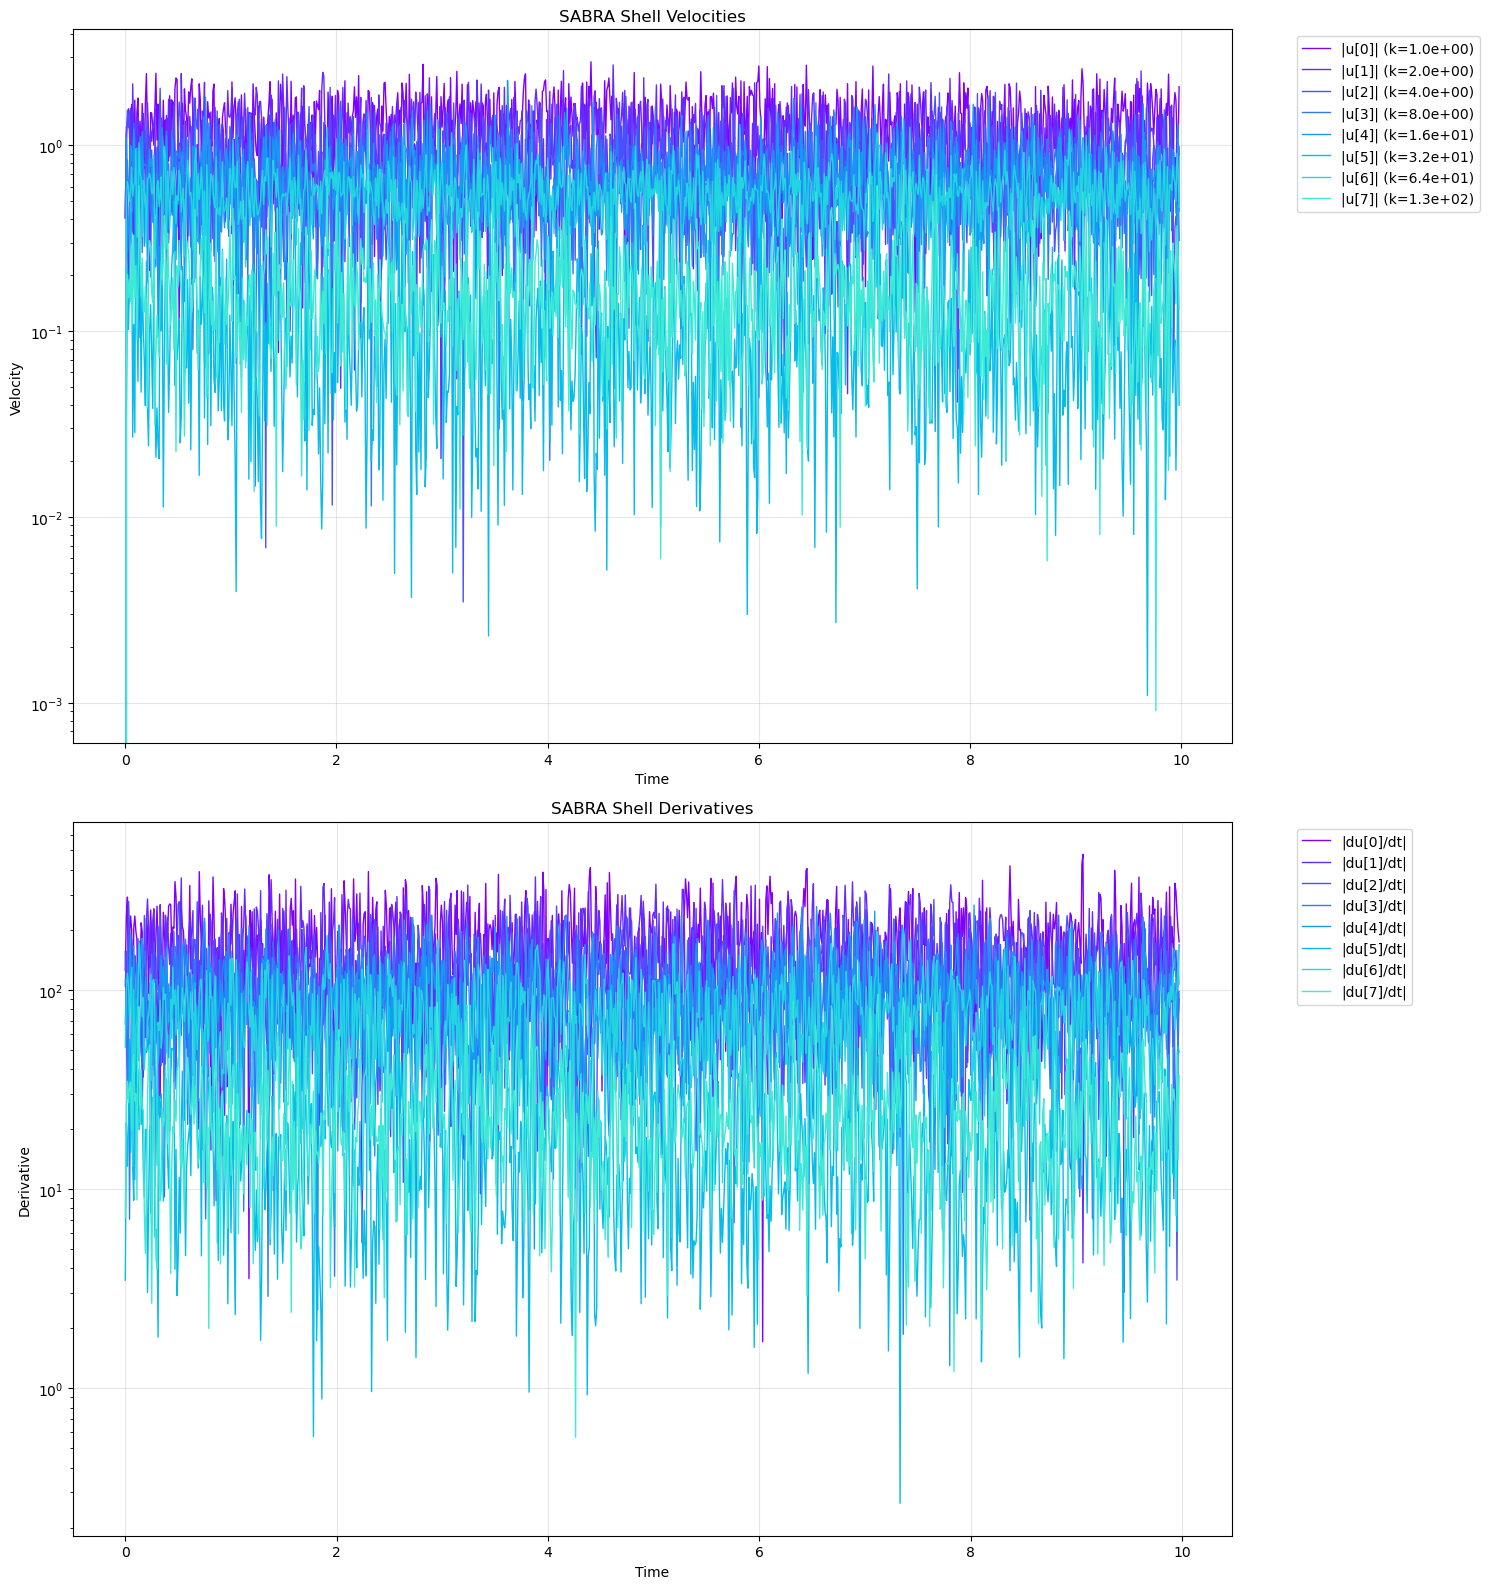

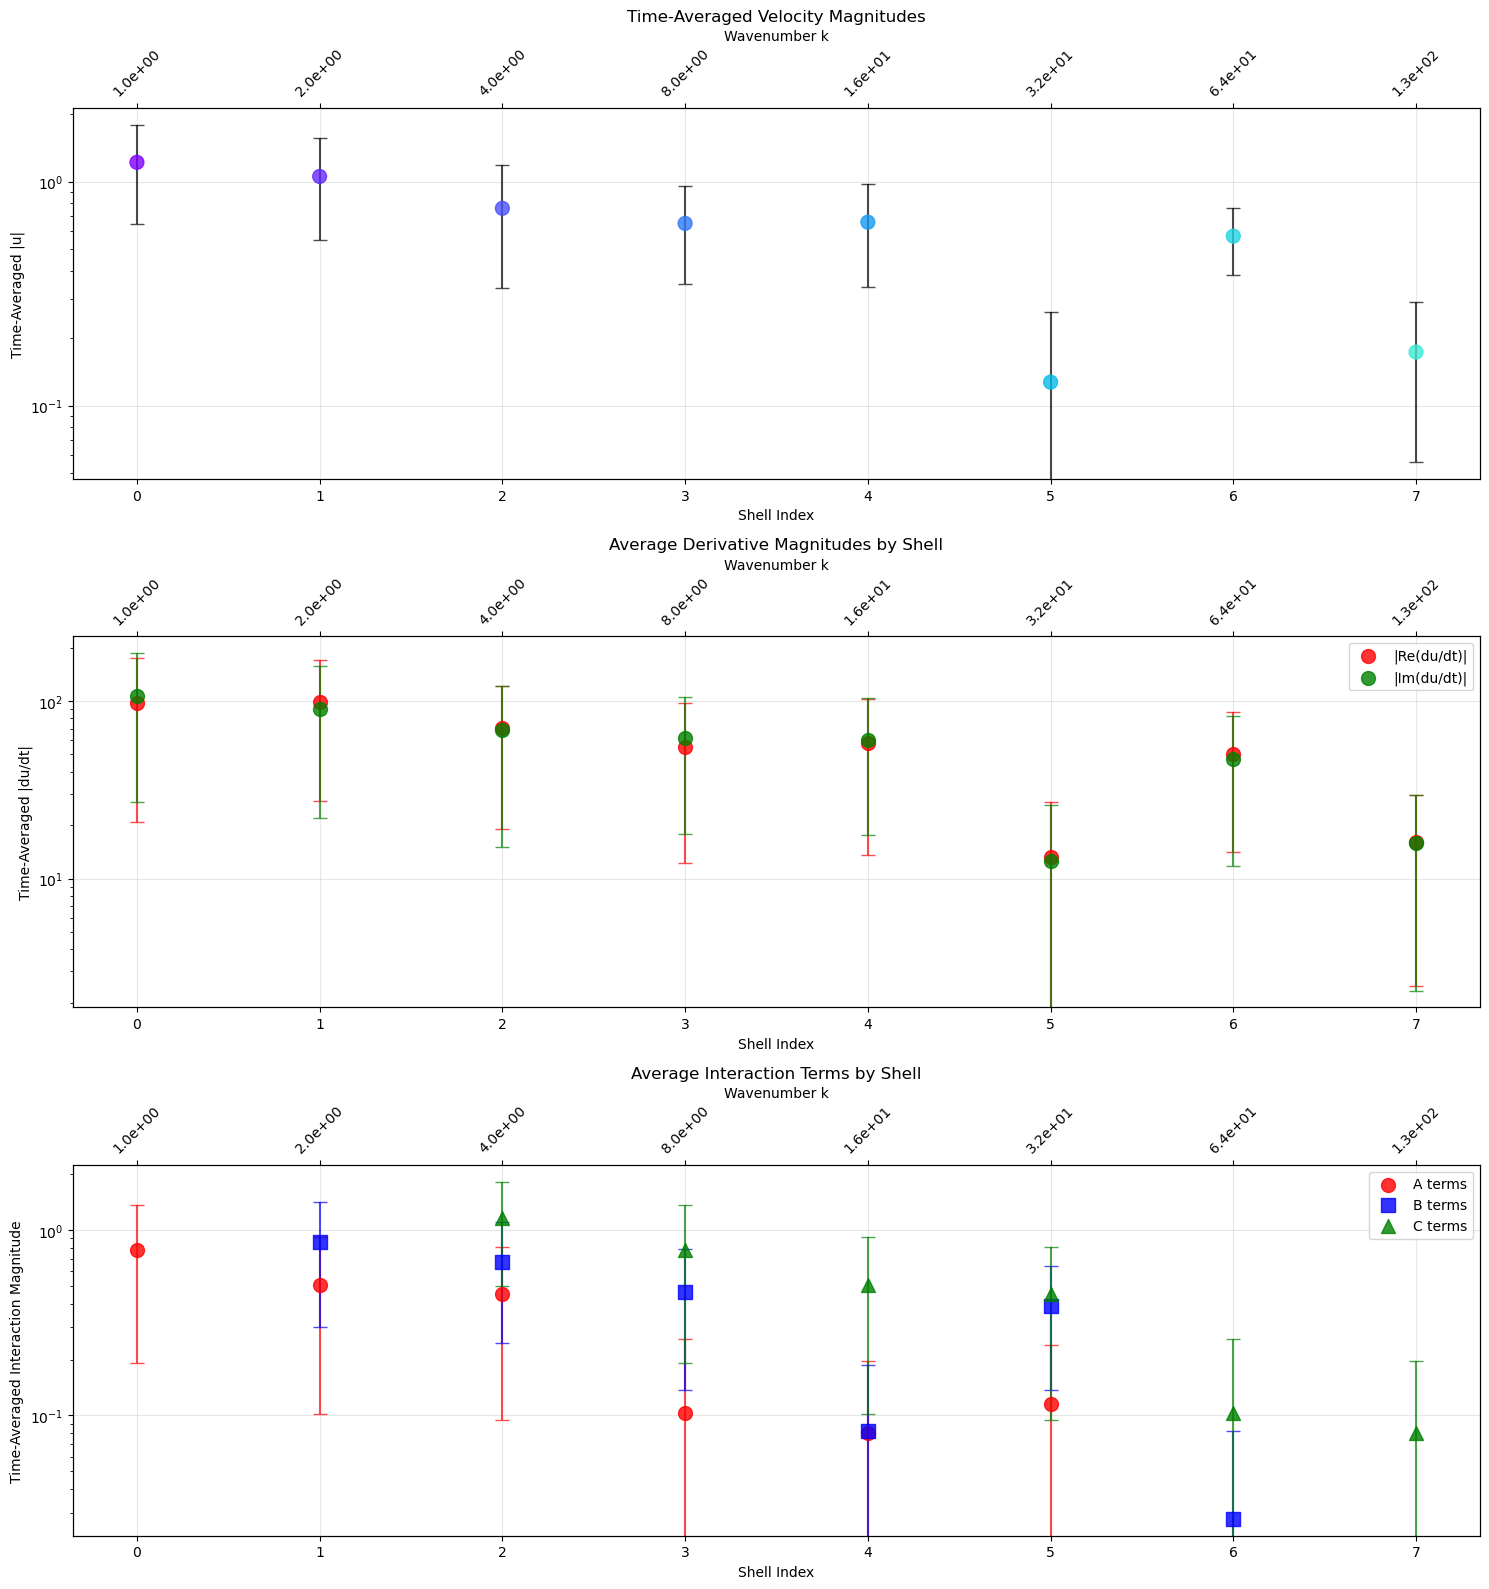

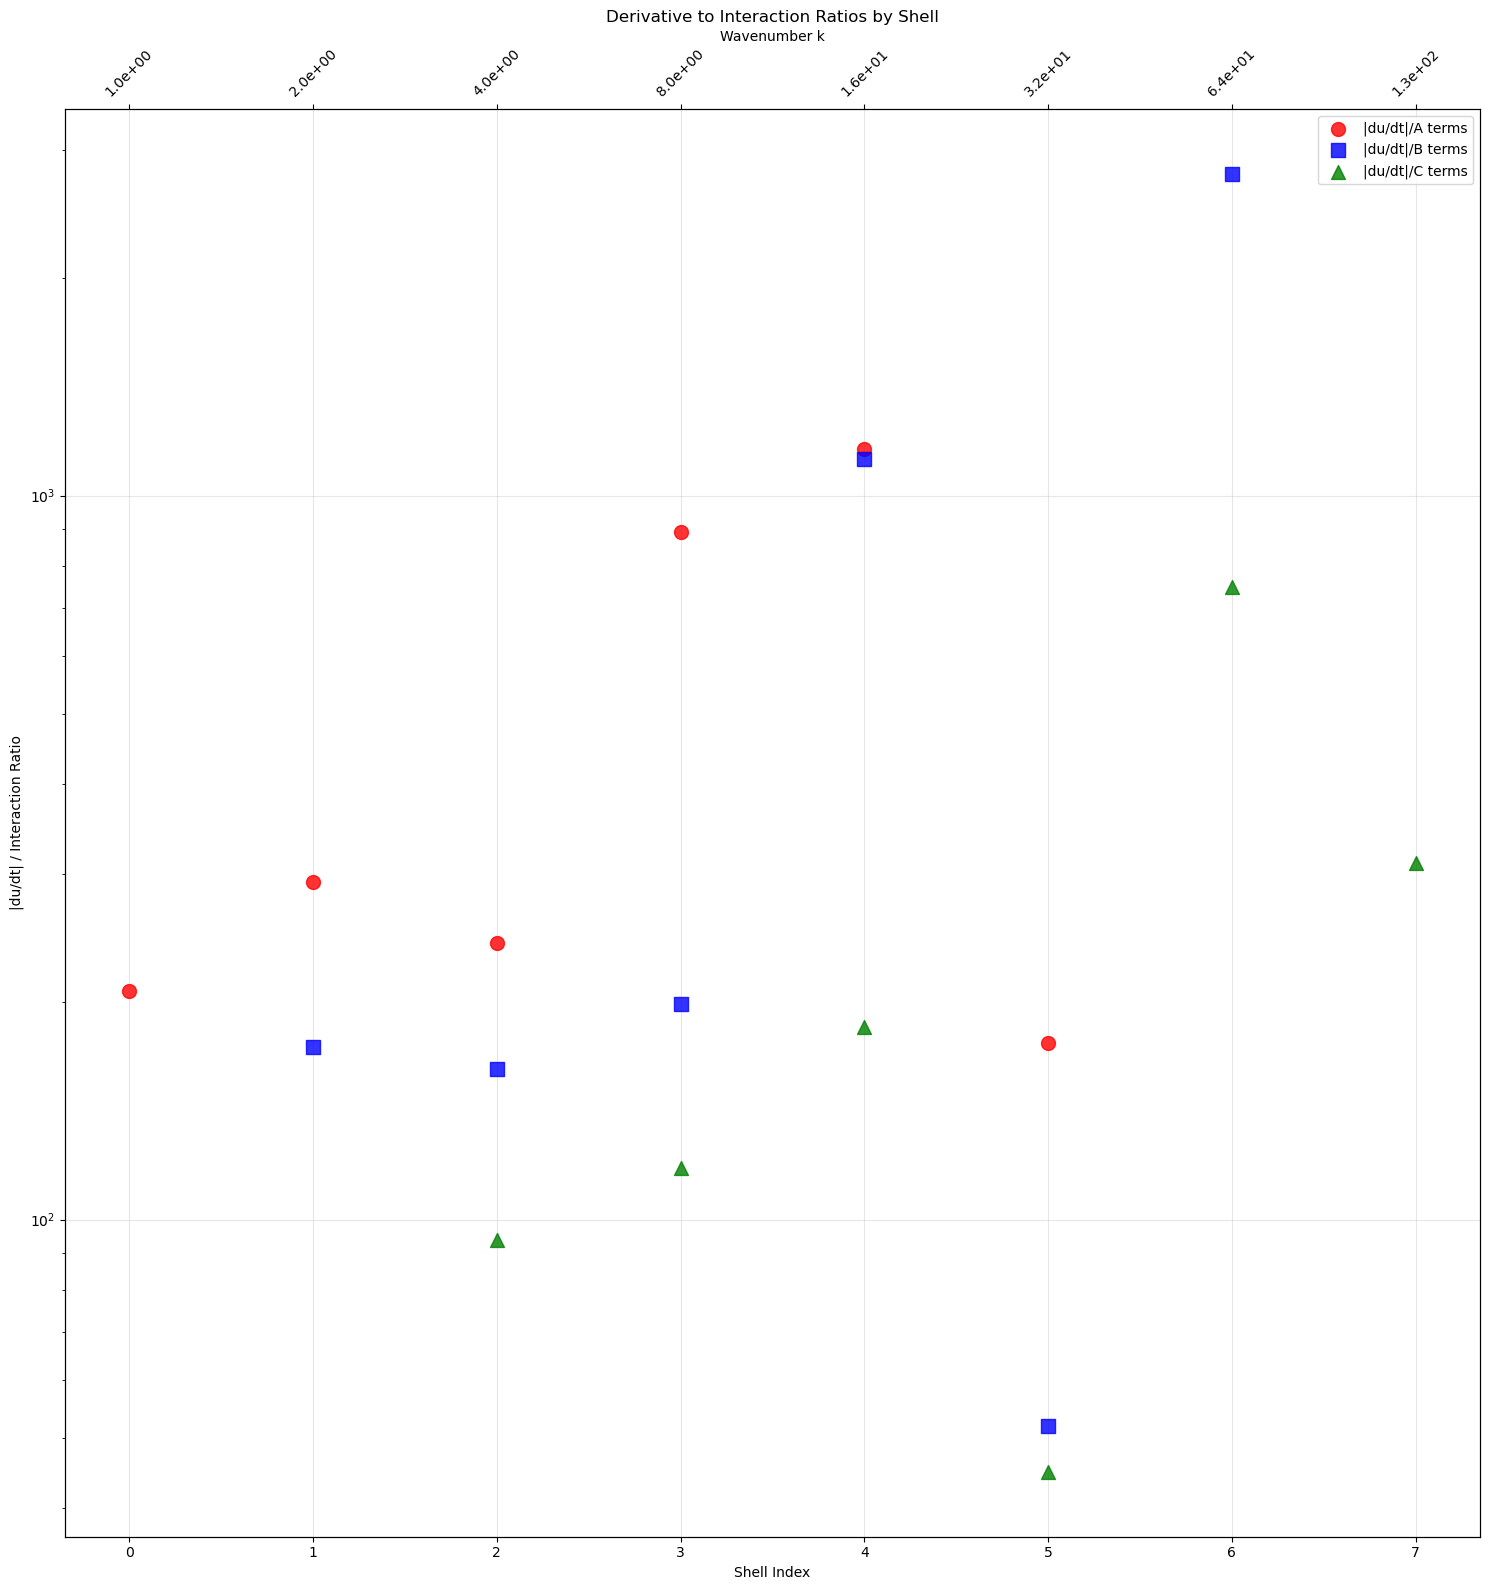

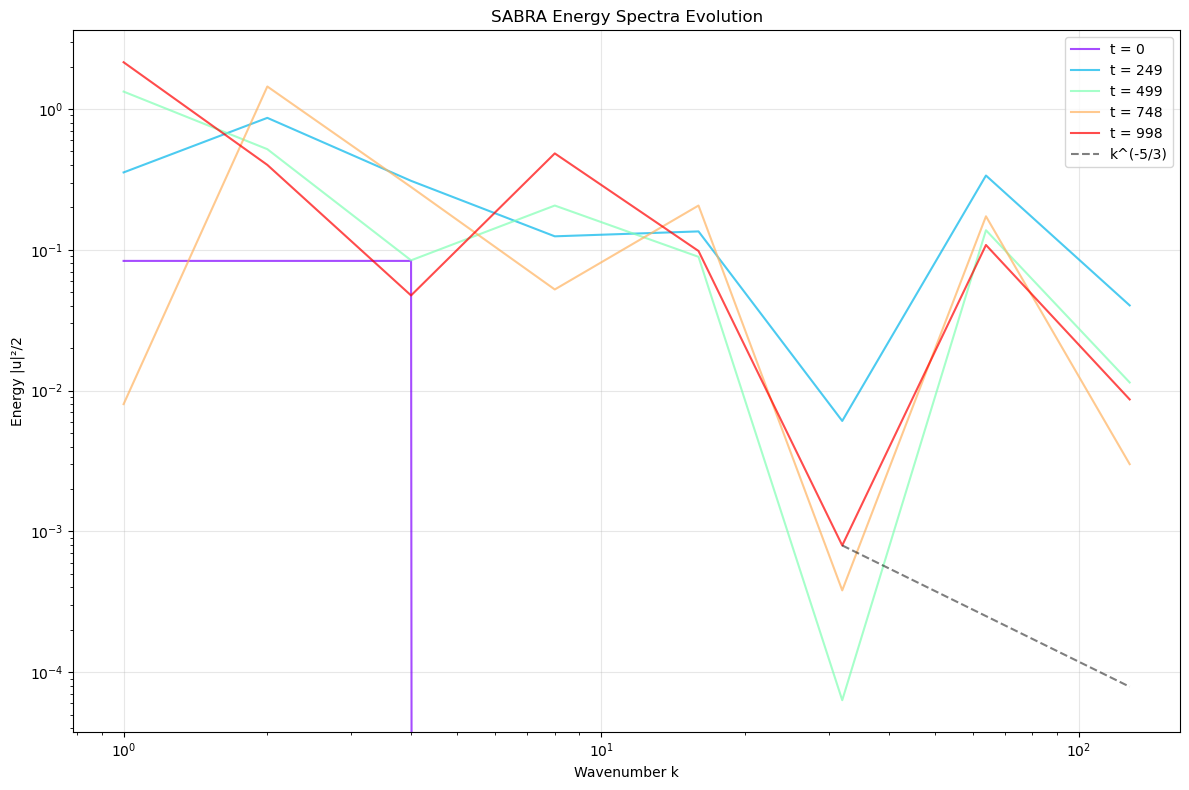

In [5]:

nn = 8
nu = 1e-4
k = 2 ** np.arange(nn)
dt = 0.01  # You'll need to set this based on your simulation

# Data loading parameters
spectra_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{nn}_LAM2_nu1e4/Spectra_complex"
forcing_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{nn}_LAM2_nu1e4/Forcing_complex"

# Time range for data loading
t_start = 1
t_end = 1000  # Adjust based on available data

# Load data (using your existing functions)
print("Loading spectra data...")
U = load_spectra_sequence(t_start, t_end, spectra_path)
print(f"Loaded spectra shape: {U.shape}")

#U=U[::-1]

# Plot first 10 shells
fig1 = plot_sabra_timeseries(U, dt, k, shell_indices=range(20), 
                            n_timesteps=10000, plot_magnitudes=True, plot_statistics=True,
                            variance_type='error_bars',derivative_magnitudes=False)

# Plot energy spectra evolution
fig2 = plot_sabra_spectra_evolution(U, k, n_snapshots=5)

# Compare specific problematic shells
#fig3 = plot_sabra_shell_comparison(U, dt, k, shell_indices=[5, 10, 15, 19], 
#                                   n_timesteps=1000, plot_dictionary_terms=True)

### OLS learning

#### OLS with only expected interactions

Dataset: sim_nn20_LAM_2_nu1e8
Loading spectra data from: /home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Spectra_complex
Loaded spectra shape: (10000, 20)
Loading forcing data from: /home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Forcing_complex
Loaded forcing shape: (10000, 20)
Parameters: nn=20, nu=1e-08, time range: 40000-50000

=== DEBUG for shell 0 ===
U shape: (10000, 20)
dt: 0.10000000000000002
include_i: True
subtract_dissipation: True
include_k: False
dUdt shape: (9999, 20)
dUdt[shell 0] magnitude range: 7.24e-03 to 6.28e+00
Dictionary shape: (9999, 1)
Dictionary terms: ['A*conj(u[1])*u[2]']
  A*conj(u[1])*u[2]: magnitude range 1.61e-03 to 1.51e+00

Target analysis:
Target magnitude range: 2.60e-03 to 6.52e+00
Forcing magnitude range: 6.19e-03 to 1.62e+00
Dissipation magnitude range: 1.07e-10 to 1.87e-08

Correlation analysis:
  A*conj(u[1])*u[2]: correlation = 0.971

Single-term regression tests:
  A*conj(u[1])*u[2]: R² = 0.9422, coeff = 3.95e+00

Full regression:
X shape: 

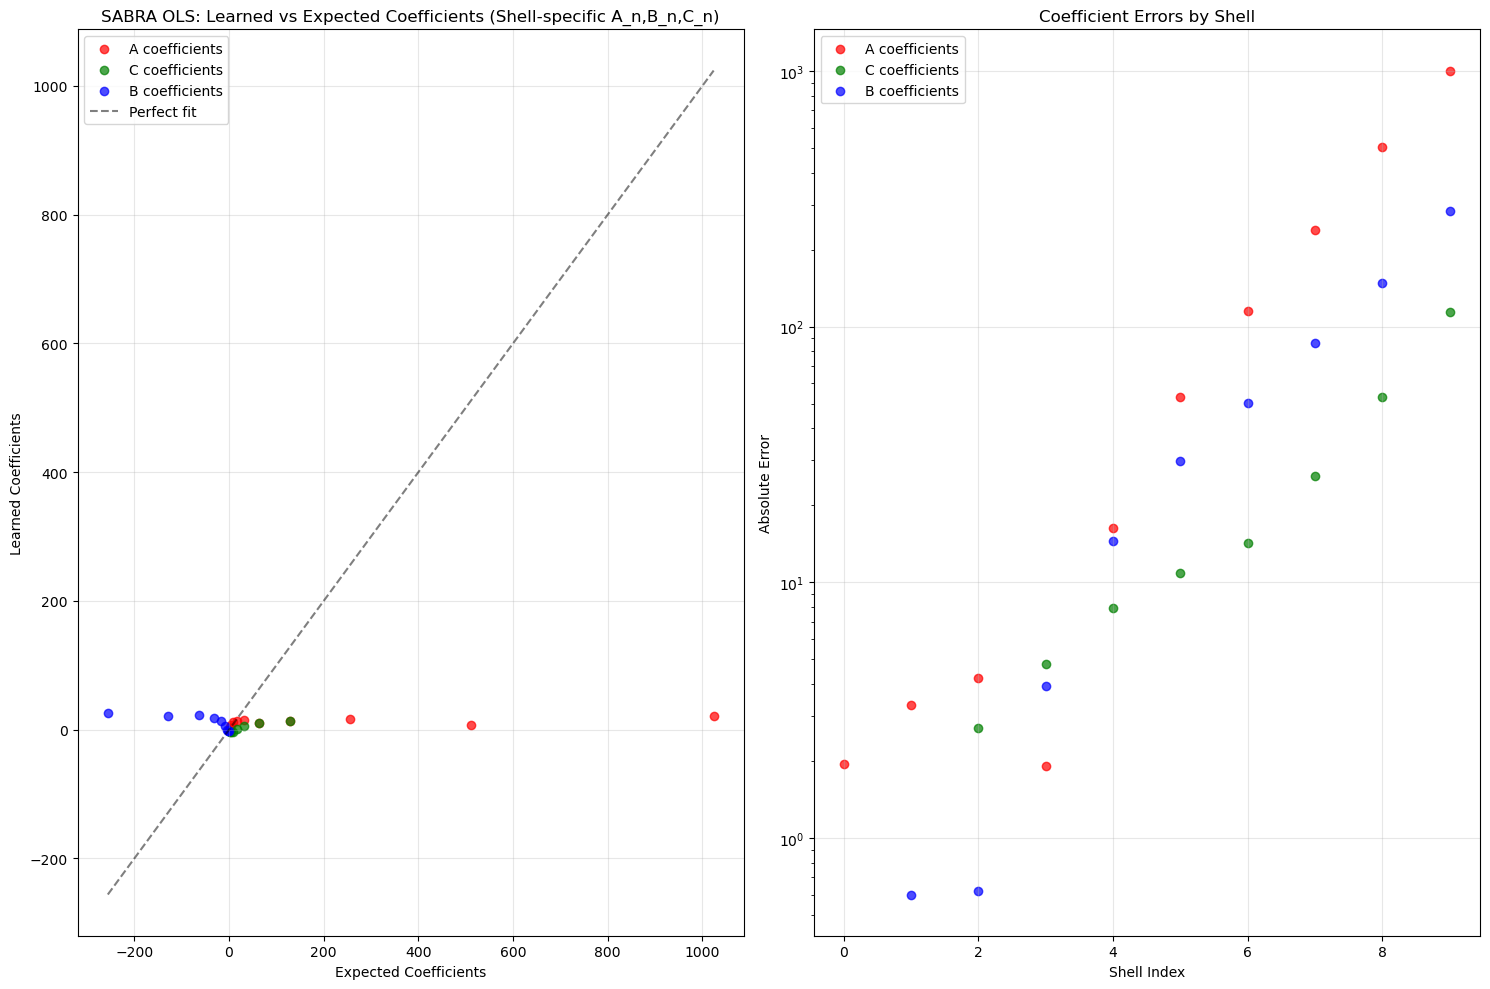

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV


def compute_expected_coefficients_withk(k, A=1.0, B=-0.5, C=-0.5, nu=None):
    """Fixed version of compute_expected_coefficients with correct signs."""
    nn = len(k)
    expected = {}
    
    for n in range(nn):
        coeffs = []
        labels = []
        
        # Shell 0: only A term
        if n == 0:
            if n + 2 < nn:
                coeffs.append(k[n+1] * A)
                labels.append('A_coeff')
        
        # Shell 1: A and B terms
        elif n == 1:
            if n + 2 < nn:
                coeffs.append(k[n+1] * A)
                labels.append('A_coeff')
            if n-1 >= 0 and n+1 < nn:
                coeffs.append(k[n] * B)
                labels.append('B_coeff')
        
        # Middle shells: A, B, C terms
        elif n >= 2 and n <= nn-3:
            if n + 2 < nn:
                coeffs.append(k[n+1] * A)
                labels.append('A_coeff')
            if n-1 >= 0 and n+1 < nn:
                coeffs.append(k[n] * B)
                labels.append('B_coeff')
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(-k[n-1] * C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Penultimate shell: B and C terms
        elif n == nn-2:
            if n-1 >= 0 and n+1 < nn:
                coeffs.append(k[n] * B)
                labels.append('B_coeff')
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(-k[n-1] * C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Last shell: only C term
        elif n == nn-1:
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(-k[n-1] * C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Add dissipation if requested
        if nu is not None:
            coeffs.append(nu * k[n]**2)
            labels.append('dissipation')
        
        expected[n] = {'coefficients': np.array(coeffs), 'labels': labels}
    
    return expected


def compute_expected_coefficients(k, A=1.0, B=-0.5, C=-0.5, nu=None):
    """Fixed version of compute_expected_coefficients with correct signs."""
    nn = len(k)
    expected = {}
    
    for n in range(nn):
        coeffs = []
        labels = []
        
        # Shell 0: only A term
        if n == 0:
            if n + 2 < nn:
                coeffs.append( A)
                labels.append('A_coeff')
        
        # Shell 1: A and B terms
        elif n == 1:
            if n + 2 < nn:
                coeffs.append( A)
                labels.append('A_coeff')
            if n-1 >= 0 and n+1 < nn:
                coeffs.append( B)
                labels.append('B_coeff')
        
        # Middle shells: A, B, C terms
        elif n >= 2 and n <= nn-3:
            if n + 2 < nn:
                coeffs.append( A)
                labels.append('A_coeff')
            if n-1 >= 0 and n+1 < nn:
                coeffs.append(B)
                labels.append('B_coeff')
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Penultimate shell: B and C terms
        elif n == nn-2:
            if n-1 >= 0 and n+1 < nn:
                coeffs.append( B)
                labels.append('B_coeff')
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Last shell: only C term
        elif n == nn-1:
            if n-2 >= 0 and n-1 >= 0:
                coeffs.append(C)  # FIXED: Added negative sign
                labels.append('C_coeff')
        
        # Add dissipation if requested
        if nu is not None:
            coeffs.append(nu * k[n]**2)
            labels.append('dissipation')
        
        expected[n] = {'coefficients': np.array(coeffs), 'labels': labels}
    
    return expected




def plot_sabra_results(results, k, A=1.0, B=-0.5, C=-0.5, nu=None, figsize=(15, 10), include_k=False):
    """Plot SABRA OLS results comparing learned vs expected coefficients.
    
    Args:
        results: dict from sabra_ols_range
        k: array[nn] - wavenumbers
        A, B, C: float - SABRA model parameters
        nu: float - viscosity
        figsize: tuple - figure size
        include_k: bool - if True, compare with global A,B,C (compute_expected_coefficients)
                          if False, compare with shell-specific A_n,B_n,C_n (compute_expected_coefficients_withk)
    """
    # Choose the appropriate expected coefficients function based on include_k
    if include_k:
        # Learning global A,B,C (include_k=True)
        expected = compute_expected_coefficients(k, A=A, B=B, C=C, nu=nu)
    else:
        # Learning shell-specific A_n,B_n,C_n (include_k=False)
        expected = compute_expected_coefficients_withk(k, A=A, B=B, C=C, nu=nu)
        
    shells = results['shells']
    
    # Collect all coefficient data
    learned_coeffs = []
    expected_coeffs = []
    coeff_types = []
    shell_indices = []
    errors = []
    
    for i, shell_idx in enumerate(shells):
        if len(results['coefficients'][i]) == 0:
            continue
            
        learned = results['coefficients'][i]
        expected_shell = expected[shell_idx]
        
        # Match coefficients by labels
        for j, label in enumerate(results['labels'][i]):
            if j < len(learned) and j < len(expected_shell['coefficients']):
                learned_coeffs.append(learned[j])
                expected_coeffs.append(expected_shell['coefficients'][j])
                
                # Determine coefficient type from label
                if 'A' in label:
                    coeff_types.append('A')
                elif 'B' in label:
                    coeff_types.append('B') 
                elif 'C' in label:
                    coeff_types.append('C')
                elif 'dissipation' in label or 'nu' in label:
                    coeff_types.append('Dissipation')
                else:
                    coeff_types.append('Unknown')
                
                shell_indices.append(shell_idx)
                errors.append(abs(learned[j] - expected_shell['coefficients'][j]))
    
    learned_coeffs = np.array(learned_coeffs)
    expected_coeffs = np.array(expected_coeffs)
    errors = np.array(errors)
    
    # Create plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Plot 1: Learned vs Expected
    colors = {'A': 'red', 'B': 'blue', 'C': 'green', 'Dissipation': 'purple', 'Unknown': 'gray'}
    
    for coeff_type in set(coeff_types):
        mask = np.array(coeff_types) == coeff_type
        if np.any(mask):
            ax1.scatter(expected_coeffs[mask], learned_coeffs[mask], 
                       c=colors[coeff_type], label=f'{coeff_type} coefficients', alpha=0.7)
    
    # Perfect fit line
    min_val = min(np.min(expected_coeffs), np.min(learned_coeffs))
    max_val = max(np.max(expected_coeffs), np.max(learned_coeffs))
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect fit')
    
    ax1.set_xlabel('Expected Coefficients')
    ax1.set_ylabel('Learned Coefficients')
    title_suffix = "Global A,B,C" if include_k else "Shell-specific A_n,B_n,C_n"
    ax1.set_title(f'SABRA OLS: Learned vs Expected Coefficients ({title_suffix})')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Errors by shell
    shell_unique = sorted(set(shell_indices))
    for coeff_type in set(coeff_types):
        mask = np.array(coeff_types) == coeff_type
        if np.any(mask):
            shells_type = np.array(shell_indices)[mask]
            errors_type = errors[mask]
            ax2.scatter(shells_type, errors_type, c=colors[coeff_type], 
                       label=f'{coeff_type} coefficients', alpha=0.7)
    
    ax2.set_xlabel('Shell Index')
    ax2.set_ylabel('Absolute Error')
    ax2.set_title('Coefficient Errors by Shell')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_yscale('log')
    
    plt.tight_layout()
    
    # Print summary statistics
    print(f"SABRA OLS Results Summary ({title_suffix}):")
    print(f"Mean absolute error: {np.mean(errors):.2e}")
    print(f"Max absolute error: {np.max(errors):.2e}")
    print(f"Mean R² score: {np.mean(results['r2_scores']):.4f}")
    
    for coeff_type in set(coeff_types):
        mask = np.array(coeff_types) == coeff_type
        if np.any(mask):
            type_errors = errors[mask]
            print(f"{coeff_type} coefficients - Mean error: {np.mean(type_errors):.2e}, "
                  f"Max error: {np.max(type_errors):.2e}")
    
    plt.show()




def build_sabra_dictionary(U, k, include_i=True, include_dissipation=False, nu=None, normalize_by_k=False, target_shell=None, include_k=False):
    """Build SABRA-specific dictionary for a single shell with only the correct interaction terms.
    
    Args:
        U: array[n_timesteps, nn] (complex) - velocity field
        k: array[nn] - wavenumbers  
        include_i: bool - whether to multiply by imaginary unit i
        include_dissipation: bool - whether to include dissipation term
        nu: float - viscosity (required if include_dissipation=True)
        normalize_by_k: bool - whether to normalize by k_n
        target_shell: int - shell index (0-based) to build dictionary for
        include_k: bool - if True, learn global A,B,C (include k factors in dictionary)
                          if False, learn shell-specific A_n,B_n,C_n (no k factors)
        
    Returns:
        Phi: array[n_timesteps, n_features] - dictionary matrix for target shell
        feature_labels: list - labels describing each feature
    """
    if target_shell is None:
        raise ValueError("target_shell must be specified")
        
    n_timesteps, nn = U.shape
    n = target_shell  # 0-based shell index
    
    features = []
    feature_labels = []
    factor = 1j if include_i else 1.0
    
    # Shell 0 (n=1 in math notation): only A term
    if n == 0:
        if n + 2 < nn:  # Check bounds
            # A term: k_{n+1} A u_{n+1}^* u_{n+2}
            if include_k:
                # Learn global A: include k factor in dictionary
                term = factor * k[n+1] * np.conj(U[:, n+1]) * U[:, n+2]
                feature_labels.append(f'k[{n+1}]*A*conj(u[{n+1}])*u[{n+2}]')
            else:
                # Learn A_n = A*k_{n+1}: no k factor in dictionary
                term = factor * np.conj(U[:, n+1]) * U[:, n+2]
                feature_labels.append(f'A*conj(u[{n+1}])*u[{n+2}]')
            features.append(term)
    
    # Shell 1 (n=2 in math notation): A and B terms  
    elif n == 1:
        # A term: k_{n+1} A u_{n+1}^* u_{n+2}
        if n + 2 < nn:
            if include_k:
                term = factor * k[n+1] * np.conj(U[:, n+1]) * U[:, n+2]
                feature_labels.append(f'k[{n+1}]*A*conj(u[{n+1}])*u[{n+2}]')
            else:
                term = factor * np.conj(U[:, n+1]) * U[:, n+2]
                feature_labels.append(f'A*conj(u[{n+1}])*u[{n+2}]')
            features.append(term)
        
        # B term: k_n B u_{n-1}^* u_{n+1}
        if n-1 >= 0 and n+1 < nn:
            if include_k:
                term = factor * k[n] * np.conj(U[:, n-1]) * U[:, n+1]
                feature_labels.append(f'k[{n}]*B*conj(u[{n-1}])*u[{n+1}]')
            else:
                term = factor * np.conj(U[:, n-1]) * U[:, n+1]
                feature_labels.append(f'B*conj(u[{n-1}])*u[{n+1}]')
            features.append(term)
    
    # Middle shells: A, B, and C terms
    elif n >= 2 and n <= nn-3:
        # A term: k_{n+1} A u_{n+1}^* u_{n+2}
        if n + 2 < nn:
            if include_k:
                term = factor * k[n+1] * np.conj(U[:, n+1]) * U[:, n+2]
                feature_labels.append(f'k[{n+1}]*A*conj(u[{n+1}])*u[{n+2}]')
            else:
                term = factor * np.conj(U[:, n+1]) * U[:, n+2]
                feature_labels.append(f'A*conj(u[{n+1}])*u[{n+2}]')
            features.append(term)
        
        # B term: k_n B u_{n-1}^* u_{n+1}
        if n-1 >= 0 and n+1 < nn:
            if include_k:
                term = factor * k[n] * np.conj(U[:, n-1]) * U[:, n+1]
                feature_labels.append(f'k[{n}]*B*conj(u[{n-1}])*u[{n+1}]')
            else:
                term = factor * np.conj(U[:, n-1]) * U[:, n+1]
                feature_labels.append(f'B*conj(u[{n-1}])*u[{n+1}]')
            features.append(term)
        
        # C term: -k_{n-1} C u_{n-2} u_{n-1} (note the minus sign)
        if n-2 >= 0 and n-1 >= 0:
            if include_k:
                term = -factor * k[n-1] * U[:, n-2] * U[:, n-1]
                feature_labels.append(f'-k[{n-1}]*C*u[{n-2}]*u[{n-1}]')
            else:
                term = -factor * U[:, n-2] * U[:, n-1]
                feature_labels.append(f'-C*u[{n-2}]*u[{n-1}]')
            features.append(term)
    
    # Penultimate shell (n=nn-1 in math notation): B and C terms
    elif n == nn-2:
        # B term: k_n B u_{n-1}^* u_{n+1}
        if n-1 >= 0 and n+1 < nn:
            if include_k:
                term = factor * k[n] * np.conj(U[:, n-1]) * U[:, n+1]
                feature_labels.append(f'k[{n}]*B*conj(u[{n-1}])*u[{n+1}]')
            else:
                term = factor * np.conj(U[:, n-1]) * U[:, n+1]
                feature_labels.append(f'B*conj(u[{n-1}])*u[{n+1}]')
            features.append(term)
        
        # C term: -k_{n-1} C u_{n-2} u_{n-1}
        if n-2 >= 0 and n-1 >= 0:
            if include_k:
                term = -factor * k[n-1] * U[:, n-2] * U[:, n-1]
                feature_labels.append(f'-k[{n-1}]*C*u[{n-2}]*u[{n-1}]')
            else:
                term = -factor * U[:, n-2] * U[:, n-1]
                feature_labels.append(f'-C*u[{n-2}]*u[{n-1}]')
            features.append(term)
    
    # Last shell (n=nn in math notation): only C term
    elif n == nn-1:
        # C term: -k_{n-1} C u_{n-2} u_{n-1}
        if n-2 >= 0 and n-1 >= 0:
            if include_k:
                term = -factor * k[n-1] * U[:, n-2] * U[:, n-1]
                feature_labels.append(f'-k[{n-1}]*C*u[{n-2}]*u[{n-1}]')
            else:
                term = -factor * U[:, n-2] * U[:, n-1]
                feature_labels.append(f'-C*u[{n-2}]*u[{n-1}]')
            features.append(term)
    
    # Add dissipation term if requested
    if include_dissipation:
        if nu is None:
            raise ValueError("nu must be provided when include_dissipation=True")
        
        if include_k:
            # Learning global A,B,C: include nu*k_n^2 factor in dictionary
            term = nu * k[n]**2 * U[:, n]
            feature_labels.append(f'nu*k[{n}]^2*u[{n}]')
        else:
            # Learning A_n,B_n,C_n: no nu*k_n^2 factor (coefficient will be nu*k_n^2)
            term = U[:, n]
            feature_labels.append(f'u[{n}]')
        features.append(term)
    
    # Stack features
    if not features:
        raise ValueError(f"No valid features for shell {n}")
    
    Phi = np.column_stack(features)
    
    # Apply normalization if requested
    if normalize_by_k:
        Phi = Phi / (k[n]**1)
    
    return Phi, feature_labels


def sabra_ols_single_shell_debug(U, dt, k, shell_idx, nu=None, forcing=None, include_i=True, 
                          subtract_dissipation=True, normalize_by_k=False, include_k=False, debug=True):
    """Debug version of SABRA OLS regression for a single shell.
    
    Args:
        U: array[n_timesteps, nn] (complex)
        dt: float - time step
        k: array[nn] - wavenumbers
        shell_idx: int - shell index (0-based)
        nu: float - viscosity
        forcing: array[n_timesteps, nn] (complex) or None
        include_i: bool - multiply dictionary by i
        subtract_dissipation: bool - if True, subtract dissipation from target
        normalize_by_k: bool - normalize equation by k_n
        include_k: bool - if True, learn global A,B,C; if False, learn A_n,B_n,C_n
        debug: bool - if True, print debug information
        
    Returns:
        coeffs: array - learned coefficients
        feature_labels: list - labels for coefficients
        r2_score: float - R² score
    """
    n_timesteps, nn = U.shape
    
    if debug:
        print(f"\n=== DEBUG for shell {shell_idx} ===")
        print(f"U shape: {U.shape}")
        print(f"dt: {dt}")
        print(f"include_i: {include_i}")
        print(f"subtract_dissipation: {subtract_dissipation}")
        print(f"include_k: {include_k}")
    
    # Compute derivatives
    dUdt = (U[1:] - U[:-1]) / dt  # Shape: [n_timesteps-1, nn]
    
    if debug:
        print(f"dUdt shape: {dUdt.shape}")
        print(f"dUdt[shell {shell_idx}] magnitude range: {np.abs(dUdt[:, shell_idx]).min():.2e} to {np.abs(dUdt[:, shell_idx]).max():.2e}")
    
    # Build SABRA dictionary for this shell
    include_dissipation = not subtract_dissipation
    Phi, feature_labels = build_sabra_dictionary(
        U[:-1], k, include_i=include_i, include_dissipation=include_dissipation,
        nu=nu, normalize_by_k=normalize_by_k, target_shell=shell_idx, include_k=include_k
    )
    
    if debug:
        print(f"Dictionary shape: {Phi.shape}")
        print(f"Dictionary terms: {feature_labels}")
        for i, label in enumerate(feature_labels):
            print(f"  {label}: magnitude range {np.abs(Phi[:, i]).min():.2e} to {np.abs(Phi[:, i]).max():.2e}")
    
    # Prepare target
    y_target = dUdt[:, shell_idx]
    
    # Add dissipation term if requested
    if subtract_dissipation and nu is not None:
        y_target = y_target + nu * k[shell_idx]**2 * U[:-1, shell_idx]
    
    # Subtract forcing if present
    if forcing is not None:
        y_target = y_target - forcing[:-1, shell_idx]
    
    # Apply normalization if requested
    if normalize_by_k:
        y_target = y_target / k[shell_idx]

    if debug:
        print(f"\nTarget analysis:")
        print(f"Target magnitude range: {np.abs(y_target).min():.2e} to {np.abs(y_target).max():.2e}")
        
        if forcing is not None:
            print(f"Forcing magnitude range: {np.abs(forcing[:-1, shell_idx]).min():.2e} to {np.abs(forcing[:-1, shell_idx]).max():.2e}")
        if nu is not None:
            dissipation = nu * k[shell_idx]**2 * U[:-1, shell_idx]
            print(f"Dissipation magnitude range: {np.abs(dissipation).min():.2e} to {np.abs(dissipation).max():.2e}")
    
    # Test correlations between dictionary and target
    if debug:
        print(f"\nCorrelation analysis:")
        for i, label in enumerate(feature_labels):
            dict_term = Phi[:, i]
            if not np.allclose(dict_term.real, 0):
                corr = np.abs(np.corrcoef(dict_term.real, y_target.real)[0,1])
                print(f"  {label}: correlation = {corr:.3f}")
    
    # Single term regression test
    if debug and Phi.shape[1] > 0:
        print(f"\nSingle-term regression tests:")
        for i, label in enumerate(feature_labels):
            # Stack real and imaginary parts for single term
            X_single = np.vstack([Phi[:, i:i+1].real, Phi[:, i:i+1].imag])
            y_single = np.concatenate([y_target.real, y_target.imag])
            
            if not np.allclose(X_single, 0):
                reg_single = RidgeCV(fit_intercept=False)
                reg_single.fit(X_single, y_single)
                r2_single = reg_single.score(X_single, y_single)
                print(f"  {label}: R² = {r2_single:.4f}, coeff = {reg_single.coef_[0]:.2e}")
    
    # Full regression
    # Stack real and imaginary parts
    X = np.vstack([Phi.real, Phi.imag])
    y = np.concatenate([y_target.real, y_target.imag])
    
    if debug:
        print(f"\nFull regression:")
        print(f"X shape: {X.shape}")
        print(f"y shape: {y.shape}")
        print(f"X magnitude range: {np.abs(X).min():.2e} to {np.abs(X).max():.2e}")
        print(f"y magnitude range: {np.abs(y).min():.2e} to {np.abs(y).max():.2e}")
        print(f"Condition number: {np.linalg.cond(X):.2e}")
    
    # Perform OLS regression
    reg = LinearRegression(fit_intercept=False)
    reg.fit(X, y)
    r2_score = reg.score(X, y)
    
    if debug:
        print(f"Final R² score: {r2_score:.4f}")
        print(f"Learned coefficients: {reg.coef_}")
        
        # Show residual analysis
        y_pred = reg.predict(X)
        residuals = y - y_pred
        print(f"Residual magnitude range: {np.abs(residuals).min():.2e} to {np.abs(residuals).max():.2e}")
        print(f"Residual vs prediction ratio: {np.abs(residuals).mean() / np.abs(y_pred).mean():.2e}")
    
    return reg.coef_, feature_labels, r2_score


def sabra_ols_range(U, dt, k, shell_range, nu=None, forcing=None, include_i=True,
                   subtract_dissipation=True, normalize_by_k=False, include_k=False):
    """Perform SABRA OLS regression on a range of shells.
    
    Args:
        U, dt, k, nu, forcing, include_i, subtract_dissipation, normalize_by_k: as above
        shell_range: tuple (start, end) or list of shell indices
        include_k: bool - if True, learn global A,B,C; if False, learn A_n,B_n,C_n
        
    Returns:
        results: dict with keys 'coefficients', 'labels', 'r2_scores', 'shells'
    """
    if isinstance(shell_range, tuple):
        shells = list(range(shell_range[0], shell_range[1]))
    else:
        shells = shell_range
    
    all_coeffs = []
    all_labels = []
    all_r2_scores = []
    
    for shell_idx in shells:
        try:
            coeffs, labels, r2 = sabra_ols_single_shell_debug(
                U, dt, k, shell_idx, nu=nu, forcing=forcing, include_i=include_i,
                subtract_dissipation=subtract_dissipation, normalize_by_k=normalize_by_k, include_k=include_k
            )
            all_coeffs.append(coeffs)
            all_labels.append(labels)
            all_r2_scores.append(r2)
        except Exception as e:
            print(f"Failed to fit shell {shell_idx}: {e}")
            all_coeffs.append(np.array([]))
            all_labels.append([])
            all_r2_scores.append(0.0)
    
    return {
        'coefficients': all_coeffs,
        'labels': all_labels, 
        'r2_scores': all_r2_scores,
        'shells': shells
    }


def build_feature_mapping(nn, use_all_interactions=False, include_dissipation=False):
    """Build mapping from feature indices to interaction/dissipation descriptions.
    
    Args:
        nn: int -- number of shells
        use_all_interactions: bool -- whether to include conjugate variants
        include_dissipation: bool -- whether to include dissipation terms
        
    Returns:
        dict: mapping from feature_idx to (shell_i, shell_j, interaction_type) or (shell_i, 'dissipation')
    """
    feature_to_interaction = {}
    feature_idx = 0
    
    # Nonlinear interaction terms
    for i in range(nn):
        for j in range(nn):
            feature_to_interaction[feature_idx] = (i, j, 'regular')
            feature_idx += 1
            
            if use_all_interactions:
                feature_to_interaction[feature_idx] = (i, j, 'j_conj')
                feature_idx += 1
                feature_to_interaction[feature_idx] = (i, j, 'i_conj')
                feature_idx += 1
                feature_to_interaction[feature_idx] = (i, j, 'both_conj')
                feature_idx += 1
    
    # Dissipation terms
    if include_dissipation:
        for i in range(nn):
            feature_to_interaction[feature_idx] = (i, 'dissipation')
            feature_idx += 1
    
    return feature_to_interaction

# Example usage function
def example_usage():
    """Example of how to use the SABRA OLS functions."""

    nn = 20
    nu = 1e-8
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    k = 2 ** np.arange(nn)
    eps=1
    beta= 0.01
    dt_sim = beta*np.sqrt(nu/eps)
    dt= dt_sim*100000
    
    # Data loading parameters
    spectra_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Spectra_complex"
    forcing_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Forcing_complex"
	#spectra_path=f"/home/vale/SABRA/params_bin/sim_nn{10}_LAM_2_nu1e8/Spectra_complex"
	#forcing_path=f"/home/vale/SABRA/params_bin/sim_nn{10}_LAM_2_nu1e8/Forcing_complex"
	#spectra_path=f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e8/Spectra_complex"
	#forcing_path=f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e8/Forcing_complex"
	#spectra_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e7/Spectra_complex"
	#forcing_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e7/Forcing_complex"
	#spectra_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{20}_LAM2_nu1e7/Spectra_complex"
	#forcing_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{20}_LAM2_nu1e7/Forcing_complex"


    # Time range for data loading
    t_start = 40000
    t_end = 50000  # Adjust based on available data
    include_k = False  # Set to True if you want to learn global A,B,C

    # Load data 
    sim_name = spectra_path.split('/')[-2]  # Gets the directory name containing the simulation
    print(f"Dataset: {sim_name}")
    print(f"Loading spectra data from: {spectra_path}")
    U = load_spectra_sequence(t_start, t_end, spectra_path)
    print(f"Loaded spectra shape: {U.shape}")

    print(f"Loading forcing data from: {forcing_path}")
    F = load_forcing_sequence(t_start, t_end, forcing_path)
    print(f"Loaded forcing shape: {F.shape}")

    print(f"Parameters: nn={nn}, nu={nu}, time range: {t_start}-{t_end}")
    
    # Example parameters
    shell_range = range(10)  # Analyze shells 1-9
    # 
    # # Run SABRA OLS
    results = sabra_ols_range(U, dt, k, shell_range, nu=nu, forcing=F,
                             include_i=True, subtract_dissipation=True,normalize_by_k=False, include_k=include_k)
    # 
    # # Plot results
    plot_sabra_results(results, k, A=1.0, B=-0.5, C=-0.5, nu=nu, include_k=include_k)



def analyze_interactions(W, nn, use_all_interactions=False, threshold=1e-5, expected_interactions=None, 
                        shell_idx=None, include_dissipation=False):
    """Analyze significant interactions in the learned model.
    
    Args:
        W: array[n_shells, n_features] or array[1, n_features] - Learned coefficients
        nn: int - Number of shells
        use_all_interactions: bool
        threshold: float
        expected_interactions: dict
        shell_idx: int or None - The shell being analyzed (0-based) or None for all shells
        include_dissipation: bool - Whether dissipation terms are included in the dictionary
    """
    significant = []
    types = ['regular', 'j_conj', 'i_conj', 'both_conj'] if use_all_interactions else ['regular']
    
    # Convert to 2D array if needed
    Wmat = W if W.ndim == 2 else W.reshape(1, -1)
    n_shells_learned = Wmat.shape[0]
    
    # Determine which shells to analyze
    if shell_idx is not None:
        target_shells = [shell_idx]
        shell_indices = [0]  # Index in Wmat
    else:
        target_shells = list(range(min(n_shells_learned, nn)))
        shell_indices = list(range(n_shells_learned))
    
    for shell_w_idx, target_shell in zip(shell_indices, target_shells):
        # Analyze interaction terms
        for i in range(nn):
            for j in range(nn):
                for t, type_name in enumerate(types):
                    idx = (i * nn + j) * (4 if use_all_interactions else 1) + t
                    if idx >= Wmat.shape[1]:
                        continue
                        
                    weight = Wmat[shell_w_idx, idx]
                    if abs(weight) <= threshold:
                        continue
                    
                    # Check if interaction is expected
                    key = (i, j, type_name)
                    expected_set = expected_interactions.get(target_shell, set()) if expected_interactions else set()
                    status = 'expected' if key in expected_set else 'unexpected'
                    
                    significant.append({
                        'target': target_shell + 1,  # Convert to 1-based indexing
                        'i': i + 1,
                        'j': j + 1,
                        'type': type_name,
                        'weight': weight,
                        'highlight': status == 'expected',
                        'status': status,
                        'term_type': 'interaction'
                    })
        
        # Analyze dissipation terms if included
        if include_dissipation:
            dissipation_start_idx = nn * nn * (4 if use_all_interactions else 1)
            for i in range(nn):
                idx = dissipation_start_idx + i
                if idx >= Wmat.shape[1]:
                    continue
                    
                weight = Wmat[shell_w_idx, idx]
                if abs(weight) <= threshold:
                    continue
                
                significant.append({
                    'target': target_shell + 1,
                    'i': i + 1,
                    'j': i + 1,  # Self-interaction
                    'type': 'dissipation',
                    'weight': weight,
                    'highlight': (i == target_shell),  # Highlight if dissipation comes from the target shell
                    'status': 'expected' if (i == target_shell) else 'unexpected',
                    'term_type': 'dissipation'
                })
    
    return significant




def debug_sabra_regression(U, dt, k, shell_idx, nu=None, forcing=None):
    """Debug version with detailed output."""
    
    print(f"\n=== DEBUG: Shell {shell_idx} ===")
    
    # Check data properties
    print(f"U shape: {U.shape}")
    print(f"U dtype: {U.dtype}")
    print(f"U magnitude range: {np.abs(U).min():.2e} to {np.abs(U).max():.2e}")
    print(f"dt: {dt}")
    
    # Compute derivatives
    dUdt = (U[1:] - U[:-1]) / dt
    print(f"dU/dt magnitude range: {np.abs(dUdt).min():.2e} to {np.abs(dUdt).max():.2e}")
    
    # Build dictionary
    Phi, labels = build_sabra_dictionary(U[:-1], k, include_i=True, 
                                        include_dissipation=False, target_shell=shell_idx)
    print(f"Dictionary shape: {Phi.shape}")
    print(f"Dictionary magnitude range: {np.abs(Phi).min():.2e} to {np.abs(Phi).max():.2e}")
    
    # Check target
    y_target = dUdt[:, shell_idx]
    if nu is not None:
        dissipation_term = nu * k[shell_idx]**2 * U[:-1, shell_idx]
        print(f"Dissipation term magnitude: {np.abs(dissipation_term).max():.2e}")
        y_target = y_target + dissipation_term
    
    if forcing is not None:
        forcing_term = forcing[:-1, shell_idx]
        print(f"Forcing term magnitude: {np.abs(forcing_term).max():.2e}")
        y_target = y_target - forcing_term
    
    print(f"Target magnitude range: {np.abs(y_target).min():.2e} to {np.abs(y_target).max():.2e}")
    
    # Check condition number
    X = np.vstack([Phi.real, Phi.imag])
    y = np.concatenate([y_target.real, y_target.imag])
    
    cond_num = np.linalg.cond(X.T @ X)
    print(f"Condition number: {cond_num:.2e}")
    
    # Simple least squares (no regularization)
    try:
        coeffs_simple = LinearRegression().fit(X, y).coef_
        print(f"Simple LS coefficients: {coeffs_simple}")
    except np.linalg.LinAlgError:
        print("Simple LS failed - singular matrix")
    
    return X, y, labels

def debug_example():
    """Run debugging version."""

    
    nn = 20
    nu = 1e-8
    k = 2 ** np.arange(nn)
    dt = 0.01  # You'll need to set this based on your simulation
    
    # Data loading parameters
    spectra_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Spectra_complex"
    forcing_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Forcing_complex"

    # Time range for data loading
    t_start = 1
    t_end = 50000  # Adjust based on available data
    
    # Load data (using your existing functions)
    print("Loading spectra data...")
    U = load_spectra_sequence(t_start, t_end, spectra_path)
    print(f"Loaded spectra shape: {U.shape}")
    
    print("Loading forcing data...")
    F = load_forcing_sequence(t_start, t_end, forcing_path)
    print(f"Loaded forcing shape: {F.shape}")
    
    # Assuming you have U, dt, k, nu, F loaded
    # Replace these with your actual data
    
    # First check data consistency
    
    # Debug a specific shell
    shell_to_debug = 8  # Choose a middle shell
    X, y, labels = debug_sabra_regression(U, dt, k, shell_to_debug, nu=nu, forcing=F)
    
    # Compare with fixed expected coefficients
    expected_fixed = compute_expected_coefficients(k, A=1.0, B=-0.5, C=-0.5, nu=nu)
    print(f"\nExpected coefficients for shell {shell_to_debug}:")
    print(expected_fixed[shell_to_debug])


if __name__ == "__main__":
    # Run the example usage
    #debug_example()
    example_usage() 

    # Uncomment to run debugging version
    # debug_example()

#### OLS from significant

Dataset: sim_nn20_LAM_2_nu1e8
Loading spectra data from: /home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Spectra_complex
Loaded spectra shape: (10000, 20)
Loading forcing data from: /home/vale/SABRA/params_bin/sim_nn20_LAM_2_nu1e8/Forcing_complex
Loaded forcing shape: (10000, 20)
Parameters: nn=20, nu=1e-08, time range: 40000-50000

=== Running OLS with ALL significant interactions ===

Expected labels to filter: {'u[12]*conj(u[10])', 'u[10]*u[9]', 'conj(u[10])*u[12]', 'u[9]*u[10]'}

Filtered results to contain only expected interactions
[['u[0]*conj(u[0])', 'conj(u[0])*conj(u[0])', 'u[0]*u[1]', 'u[0]*conj(u[1])', 'conj(u[0])*u[1]', 'conj(u[0])*u[2]', 'conj(u[0])*conj(u[2])', 'u[0]*u[3]', 'u[0]*conj(u[3])', 'u[0]*u[4]', 'u[0]*conj(u[4])', 'conj(u[0])*u[4]', 'conj(u[0])*conj(u[4])', 'u[0]*u[5]', 'u[0]*conj(u[5])', 'conj(u[0])*u[5]', 'conj(u[0])*conj(u[5])', 'conj(u[0])*u[6]', 'u[0]*u[7]', 'u[0]*conj(u[7])', 'conj(u[0])*u[7]', 'conj(u[0])*conj(u[7])', 'u[0]*u[8]', 'conj(u[0])*u[8]', 'co

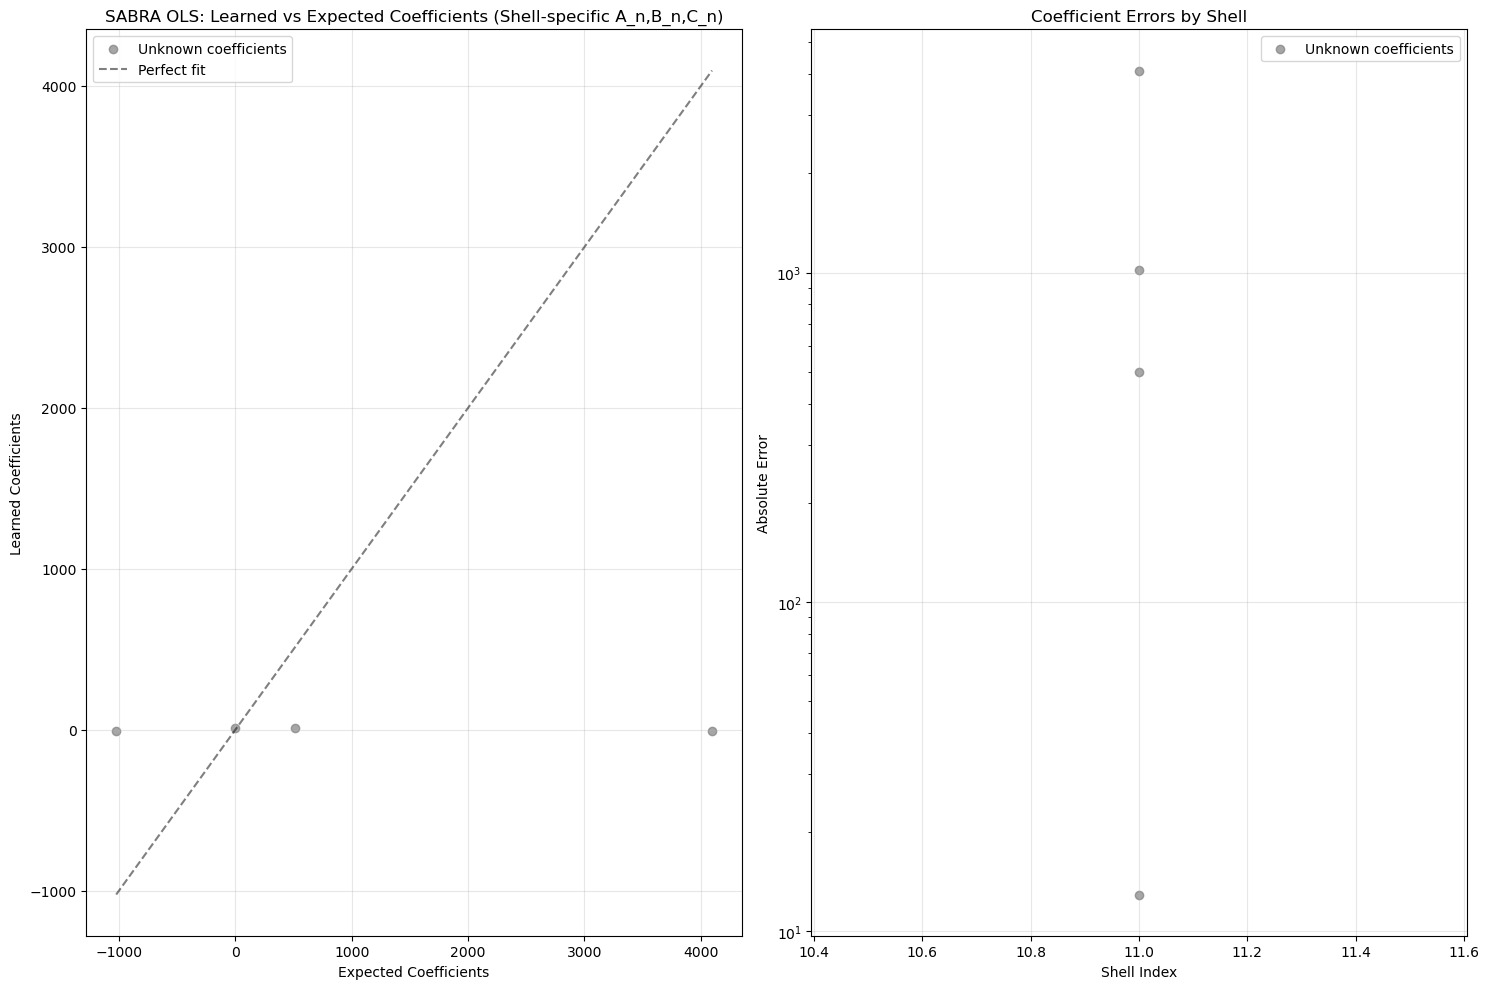

In [30]:
def build_sabra_dictionary_from_significant(U, k, significant, target_shell, include_i=True, 
                                           include_dissipation=False, nu=None, normalize_by_k=False, 
                                           include_k=False):
    """Build SABRA dictionary using only interactions from significant list.
    
    Args:
        U: array[n_timesteps, nn] (complex) - velocity field
        k: array[nn] - wavenumbers  
        significant: list of dicts from analyze_interactions
        target_shell: int - shell index (0-based) to build dictionary for
        include_i: bool - whether to multiply by imaginary unit i
        include_dissipation: bool - whether to include dissipation term
        nu: float - viscosity (required if include_dissipation=True)
        normalize_by_k: bool - whether to normalize by k_n
        include_k: bool - if True, include k factors in dictionary
        
    Returns:
        Phi: array[n_timesteps, n_features] - dictionary matrix for target shell
        feature_labels: list - labels describing each feature
    """
    n_timesteps, nn = U.shape
    n = target_shell  # 0-based shell index
    
    features = []
    feature_labels = []
    factor = 1j if include_i else 1.0
    
    # Filter significant interactions for this target shell (convert from 1-based to 0-based)
    shell_interactions = [s for s in significant if s['target'] == target_shell + 1]
    
    # Process each significant interaction
    for interaction in shell_interactions:
        i = interaction['i'] - 1  # Convert to 0-based
        j = interaction['j'] - 1  # Convert to 0-based
        int_type = interaction['type']
        
        # Skip if indices are out of bounds
        if i >= nn or j >= nn or i < 0 or j < 0:
            continue
            
        if int_type == 'dissipation':
            # Handle dissipation term
            if include_dissipation:
                if nu is None:
                    raise ValueError("nu must be provided when include_dissipation=True")
                
                if include_k:
                    term = nu * k[i]**2 * U[:, i]
                    feature_labels.append(f'nu*k[{i}]^2*u[{i}]')
                else:
                    term = U[:, i]
                    feature_labels.append(f'u[{i}]')
                features.append(term)
        else:
            # Build interaction term based on type
            if int_type == 'regular':
                term = U[:, i] * U[:, j]
                base_label = f'u[{i}]*u[{j}]'
            elif int_type == 'j_conj':
                term = U[:, i] * np.conj(U[:, j])
                base_label = f'u[{i}]*conj(u[{j}])'
            elif int_type == 'i_conj':
                term = np.conj(U[:, i]) * U[:, j]
                base_label = f'conj(u[{i}])*u[{j}]'
            elif int_type == 'both_conj':
                term = np.conj(U[:, i]) * np.conj(U[:, j])
                base_label = f'conj(u[{i}])*conj(u[{j}])'
            else:
                continue  # Skip unknown types
            
			
            # Apply factor and k if needed
            term = factor * term
            
            # Determine which k factor to use based on the interaction indices
            # Following SABRA convention: use k of the middle index for triadic interactions
            if include_k:
                # Use k[max(i,j)] as a reasonable default for arbitrary interactions
                # You may want to adjust this logic based on your specific needs
                k_idx = max(i, j)
                term = k[k_idx] * term
                feature_labels.append(f'k[{k_idx}]*{base_label}')
            else:
                feature_labels.append(base_label)
            
            features.append(term)
    
    # Stack features
    if not features:
        raise ValueError(f"No valid features for shell {n} from significant interactions")
    
    Phi = np.column_stack(features)
    
    # Apply normalization if requested
    if normalize_by_k:
        Phi = Phi / (k[n]**1)
    
    return Phi, feature_labels


def sabra_ols_single_shell_significant(U, dt, k, shell_idx, significant, nu=None, forcing=None, 
                                      include_i=True, subtract_dissipation=True, normalize_by_k=False, 
                                      include_k=False, debug=False):
    """SABRA OLS regression for a single shell using significant interactions.
    
    Args:
        U: array[n_timesteps, nn] (complex)
        dt: float - time step
        k: array[nn] - wavenumbers
        shell_idx: int - shell index (0-based)
        significant: list of dicts from analyze_interactions
        nu: float - viscosity
        forcing: array[n_timesteps, nn] (complex) or None
        include_i: bool - multiply dictionary by i
        subtract_dissipation: bool - if True, subtract dissipation from target
        normalize_by_k: bool - normalize equation by k_n
        include_k: bool - if True, include k factors
        debug: bool - if True, print debug information
        
    Returns:
        coeffs: array - learned coefficients
        feature_labels: list - labels for coefficients
        r2_score: float - R² score
    """
    from sklearn.linear_model import LinearRegression, RidgeCV
    
    n_timesteps, nn = U.shape
    
    if debug:
        print(f"\n=== DEBUG for shell {shell_idx} (using significant interactions) ===")
        print(f"Number of significant interactions for this shell: {len([s for s in significant if s['target'] == shell_idx + 1])}")
    
    # Compute derivatives
    dUdt = (U[1:] - U[:-1]) / dt
    
    # Build dictionary from significant interactions
    include_dissipation = not subtract_dissipation
    Phi, feature_labels = build_sabra_dictionary_from_significant(
        U[:-1], k, significant, target_shell=shell_idx, include_i=include_i, 
        include_dissipation=include_dissipation, nu=nu, normalize_by_k=normalize_by_k, 
        include_k=include_k
    )
    
    if debug:
        print(f"Dictionary shape: {Phi.shape}")
        print(f"Dictionary terms: {feature_labels}")
        for i, label in enumerate(feature_labels):
            print(f"  {label}: magnitude range {np.abs(Phi[:, i]).min():.2e} to {np.abs(Phi[:, i]).max():.2e}")
    
    # Prepare target
    y_target = dUdt[:, shell_idx]
    
    # Add dissipation term if requested
    if subtract_dissipation and nu is not None:
        y_target = y_target + nu * k[shell_idx]**2 * U[:-1, shell_idx]
    
    # Subtract forcing if present
    if forcing is not None:
        y_target = y_target - forcing[:-1, shell_idx]
    
    # Apply normalization if requested
    if normalize_by_k:
        y_target = y_target / k[shell_idx]
    
    # Stack real and imaginary parts
    X = np.vstack([Phi.real, Phi.imag])
    y = np.concatenate([y_target.real, y_target.imag])
    
    if debug:
        print(f"\nRegression details:")
        print(f"X shape: {X.shape}")
        print(f"y shape: {y.shape}")
        print(f"Condition number: {np.linalg.cond(X):.2e}")
    
    # Perform OLS regression
    reg = LinearRegression(fit_intercept=False)
    reg.fit(X, y)
    r2_score = reg.score(X, y)
    
    if debug:
        print(f"R² score: {r2_score:.4f}")
        print(f"Learned coefficients: {reg.coef_}")
    
    return reg.coef_, feature_labels, r2_score


def sabra_ols_range_significant(U, dt, k, shell_range, significant, nu=None, forcing=None, 
                               include_i=True, subtract_dissipation=True, normalize_by_k=False, 
                               include_k=False):
    """Perform SABRA OLS regression on a range of shells using significant interactions.
    
    Args:
        U, dt, k, nu, forcing, include_i, subtract_dissipation, normalize_by_k: as before
        shell_range: tuple (start, end) or list of shell indices
        significant: list of dicts from analyze_interactions
        include_k: bool - if True, include k factors
        
    Returns:
        results: dict with keys 'coefficients', 'labels', 'r2_scores', 'shells'
    """
    if isinstance(shell_range, tuple):
        shells = list(range(shell_range[0], shell_range[1]))
    else:
        shells = shell_range
    
    all_coeffs = []
    all_labels = []
    all_r2_scores = []
    
    for shell_idx in shells:
        # Check if there are any significant interactions for this shell
        shell_interactions = [s for s in significant if s['target'] == shell_idx + 1]
        if not shell_interactions:
            print(f"No significant interactions for shell {shell_idx}, skipping")
            all_coeffs.append(np.array([]))
            all_labels.append([])
            all_r2_scores.append(0.0)
            continue
            
        try:
            coeffs, labels, r2 = sabra_ols_single_shell_significant(
                U, dt, k, shell_idx, significant, nu=nu, forcing=forcing, include_i=include_i,
                subtract_dissipation=subtract_dissipation, normalize_by_k=normalize_by_k, 
                include_k=include_k
            )
            all_coeffs.append(coeffs)
            all_labels.append(labels)
            all_r2_scores.append(r2)
        except Exception as e:
            print(f"Failed to fit shell {shell_idx}: {e}")
            all_coeffs.append(np.array([]))
            all_labels.append([])
            all_r2_scores.append(0.0)
    
    return {
        'coefficients': all_coeffs,
        'labels': all_labels,
        'r2_scores': all_r2_scores,
        'shells': shells
    }

def example_usage_significant(significant):
    """Example of how to use the SABRA OLS functions with significant interactions."""

    nn = 20
    nu = 1e-8
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    k = 2 ** np.arange(nn)
    eps = 1
    beta = 0.01
    dt_sim = beta*np.sqrt(nu/eps)
    dt = dt_sim*100000
    
    # Data loading parameters
    spectra_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Spectra_complex"
    forcing_path = f"/home/vale/SABRA/params_bin/sim_nn{nn}_LAM_2_nu1e8/Forcing_complex"
    #spectra_path=f"/home/vale/SABRA/params_bin/sim_nn{10}_LAM_2_nu1e8/Spectra_complex"
    #forcing_path=f"/home/vale/SABRA/params_bin/sim_nn{10}_LAM_2_nu1e8/Forcing_complex"
    #spectra_path=f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e8/Spectra_complex"
    #forcing_path=f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e8/Forcing_complex"
    #spectra_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e7/Spectra_complex"
    #forcing_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{30}_golden_nu1e7/Forcing_complex"
    #spectra_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{20}_LAM2_nu1e7/Spectra_complex"
    #forcing_path = f"/home/vale/SABRA/simulations_concluded/sim_nn{20}_LAM2_nu1e7/Forcing_complex"

    # Time range for data loading
    t_start = 40000
    t_end = 50000  # Adjust based on available data
    include_k = False  # Set to True if you want to learn global A,B,C

    # Load data 
    sim_name = spectra_path.split('/')[-2]  # Gets the directory name containing the simulation
    print(f"Dataset: {sim_name}")
    print(f"Loading spectra data from: {spectra_path}")
    U = load_spectra_sequence(t_start, t_end, spectra_path)
    print(f"Loaded spectra shape: {U.shape}")

    print(f"Loading forcing data from: {forcing_path}")
    F = load_forcing_sequence(t_start, t_end, forcing_path)
    print(f"Loaded forcing shape: {F.shape}")

    print(f"Parameters: nn={nn}, nu={nu}, time range: {t_start}-{t_end}")
    
    # Example parameters
    shell_range = [11]  # Analyze shells 1-9
    
    # Run SABRA OLS with ALL significant interactions
    print("\n=== Running OLS with ALL significant interactions ===")
    results_complete = sabra_ols_range_significant(U, dt, k, shell_range, significant, 
                                                  nu=nu, forcing=F, include_i=True, 
                                                  subtract_dissipation=True, normalize_by_k=False, 
                                                  include_k=include_k)
    
    # Create expected feature labels for filtering
    expected_labels = set()
    for interaction in significant:
        if interaction['status'] == 'expected':
            i = interaction['i'] - 1  # Convert to 0-based
            j = interaction['j'] - 1  # Convert to 0-based
            int_type = interaction['type']
            
            # Build expected label based on type (same logic as in build_sabra_dictionary_from_significant)
            if int_type == 'regular':
                base_label = f'u[{i}]*u[{j}]'
            elif int_type == 'j_conj':
                base_label = f'u[{i}]*conj(u[{j}])'
            elif int_type == 'i_conj':
                base_label = f'conj(u[{i}])*u[{j}]'
            elif int_type == 'both_conj':
                base_label = f'conj(u[{i}])*conj(u[{j}])'
            elif int_type == 'dissipation':
                base_label = f'u[{i}]'
            else:
                continue
                
            expected_labels.add(base_label)
    
    print(f"\nExpected labels to filter: {expected_labels}")
    
    # Filter results to keep only expected interactions
    results_expected = {
        'coefficients': [],
        'labels': [],
        'r2_scores': results_complete['r2_scores'].copy(),  # Keep same R2 scores
        'shells': results_complete['shells'].copy()
    }
    
    for coeffs, labels in zip(results_complete['coefficients'], results_complete['labels']):
        if len(coeffs) == 0 or len(labels) == 0:
            results_expected['coefficients'].append(np.array([]))
            results_expected['labels'].append([])
            continue
            
        # Find indices of expected interactions
        expected_indices = [i for i, label in enumerate(labels) if label in expected_labels]
        
        # Filter coefficients and labels
        if expected_indices:
            filtered_coeffs = coeffs[expected_indices]
            filtered_labels = [labels[i] for i in expected_indices]
        else:
            filtered_coeffs = np.array([])
            filtered_labels = []
            
        results_expected['coefficients'].append(filtered_coeffs)
        results_expected['labels'].append(filtered_labels)
    
    print(f"\nFiltered results to contain only expected interactions")
    print(results_complete['labels'])
    
    # Plot results using expected interactions only
    plot_sabra_results(results_expected, k, A=1.0, B=-0.5, C=-0.5, nu=nu, include_k=include_k)
    
    return results_complete, results_expected

if __name__ == "__main__":
    # Run the example usage
    #debug_example()
    results_complete,results_expected=example_usage_significant(significant)

    # Uncomment to run debugging version
    # debug_example()

In [31]:
results_expected

{'coefficients': [array([-7.53773435, -7.53773435, 12.98485152, 12.98485152])],
 'labels': [['u[9]*u[10]',
   'u[10]*u[9]',
   'conj(u[10])*u[12]',
   'u[12]*conj(u[10])']],
 'r2_scores': [0.1594719965840482],
 'shells': [11]}